# Lead Scoring - Logistic Regression

__Problem Statement__
   *  Data - You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

__Goals of the Case Study__
   * There are quite a few goals for this case study.
   *  Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   * There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 
   * These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations. 

# Steps invoved in this notebook

1. Import Python Libraries for data analysis and ML 
2. Local user defined functions
3. Sourcing the Data
4. Visualising and Exploring the data
5. Inspect and Clean the Data
6. Outlier Detection
7. Impute Missing values
8. Preparing the data for modelling(train-test split, rescaling etc)
9. Create Dummy Variables
10. Scaling of the Data
11. Analysing Correlation
12. Model I using RFE
13. Model II using PCA
14. Model evaluation, Comparisions and Conclusions and final summary

# Import Python Functions 

In [190]:
# Local classes and Local flags

# Local Classes
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
# Debug flag for investigative purpose
DEBUG = 0

# Default random_state
rndm_stat = 42

In [191]:
# Python libraries for Data processing and analysis
import time as time
strt = time.time()
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.options.mode.use_inf_as_na = True
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob
from matplotlib.pyplot import figure
import warnings
import math
import itertools
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
from math import sqrt
import re

# ML common Libraries
import statsmodels
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler,OrdinalEncoder,LabelEncoder


# Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix


# ML Feature Engineering
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA as IPCA


# Sourcing and inspecting the data

In [192]:
# Reading the data
df = pd.read_csv(r'C:\My Folders\OneDrive\Surface\Sadguru\Lakshmi\Study\IIIB_PGDS\ML1\Logistic_Regression_CaseStudy\Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [193]:
# Analysing the Data and meta data
print(color.BOLD+color.PURPLE + 'Inspect and Explore the Dataset' + color.END)
print("\n#####################  DataFrame Head  ######################")
print(df.head(3))
print("\n#####################  DataFrame Tail  ######################")
print(df.tail(3))
print("\n#####################  DataFrame Info  ######################")
print(df.info())
print("\n####################  DataFrame Columns  ####################")
print(list(df.columns))
print("\n####################  DataFrame Shape  ####################")
print("No of Rows",df.shape[0])
print("No of Columns",df.shape[1])

Inspect and Explore the Dataset

#####################  DataFrame Head  ######################
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0    

In [194]:
# Analyzing the Categorical and Numerical variables of Application Data
print(color.BOLD+"Categorical and Numerical Variables"+ color.END)
display(df.dtypes.value_counts())
print(color.BOLD+"Numerical Integer Variables"+ color.END)
display(df.select_dtypes(include='int64').dtypes)
print(color.BOLD+"Numerical Float Variables"+ color.END)
display(df.select_dtypes(include='float64').dtypes)
print(color.BOLD+"Categorical Variables"+ color.END)
display(df.select_dtypes(include=object).dtypes)

Categorical and Numerical Variables


object     30
float64     4
int64       3
dtype: int64

Numerical Integer Variables


Lead Number                    int64
Converted                      int64
Total Time Spent on Website    int64
dtype: object

Numerical Float Variables


TotalVisits                    float64
Page Views Per Visit           float64
Asymmetrique Activity Score    float64
Asymmetrique Profile Score     float64
dtype: object

Categorical Variables


Prospect ID                                      object
Lead Origin                                      object
Lead Source                                      object
Do Not Email                                     object
Do Not Call                                      object
Last Activity                                    object
Country                                          object
Specialization                                   object
How did you hear about X Education               object
What is your current occupation                  object
What matters most to you in choosing a course    object
Search                                           object
Magazine                                         object
Newspaper Article                                object
X Education Forums                               object
Newspaper                                        object
Digital Advertisement                            object
Through Recommendations                         

# EDA - Visualizing the data

## Removing the spaces in the column names

In [195]:
# There are spaces in the column names, we are replacing them with _ for better handling.
df.columns = df.columns.map(lambda x : re.sub(r"\W","_",x))

## Univariavte Analysis - Numerical Variables

In [196]:
# update the list of categorical and numerical columns
num_cols = list(df.select_dtypes(include=np.number).columns)
cat_cols = list(df.select_dtypes(exclude=np.number).columns)
cat_cols.remove("Prospect_ID")

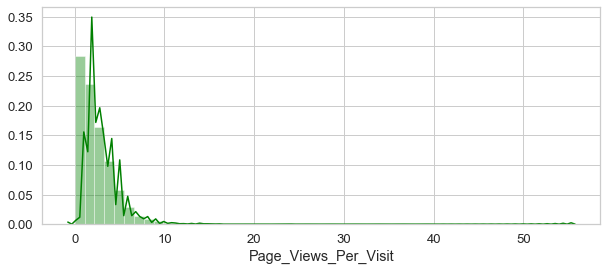

In [197]:
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1.2)
sns.distplot(df['Page_Views_Per_Visit'],bins=50,color="green")
plt.show()

Observation - The Distribution is heavily right skewed with a mode of approx 2, min of 0 and max of around 55

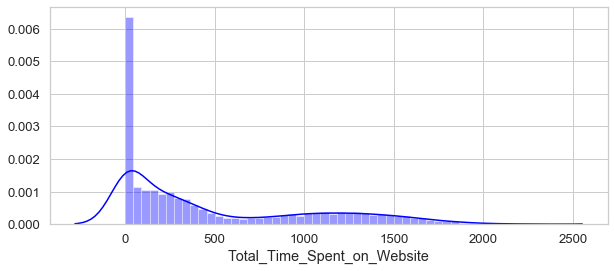

In [198]:
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1.2)
sns.distplot(df['Total_Time_Spent_on_Website'],bins=50,color="blue")
plt.show()

Observation - The Distribution is heavily right skewed with a mode and min of approx 2 and max of over 2500 mintues

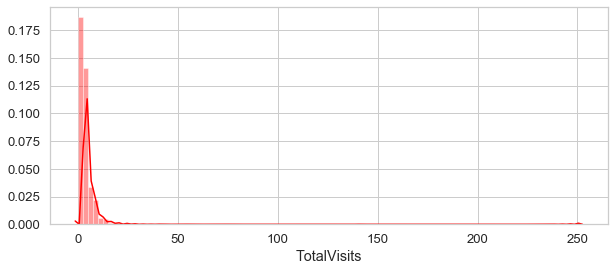

In [199]:
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1.2)
sns.distplot(df['TotalVisits'],bins=100,color="red")
plt.show()

Observation - The Distribution is heavily right skewed with most of the values falling in range 0 to 20 but few as extreme as 250

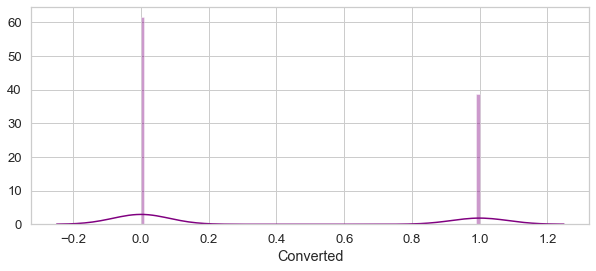

In [200]:
plt.figure(1,figsize=(10,4))
sns.set(style="whitegrid",font_scale=1.2)
sns.distplot(df['Converted'],bins=100,color="purple")
plt.show()

Observation - The Distribution is peaked at 0 and 1, showing over 60% of Non-Conversions and lesser than 40% Conversions

## Segmented Univariate Analysis

Segmented Univariate Analysis of variable Lead_Origin with respect to Conversion


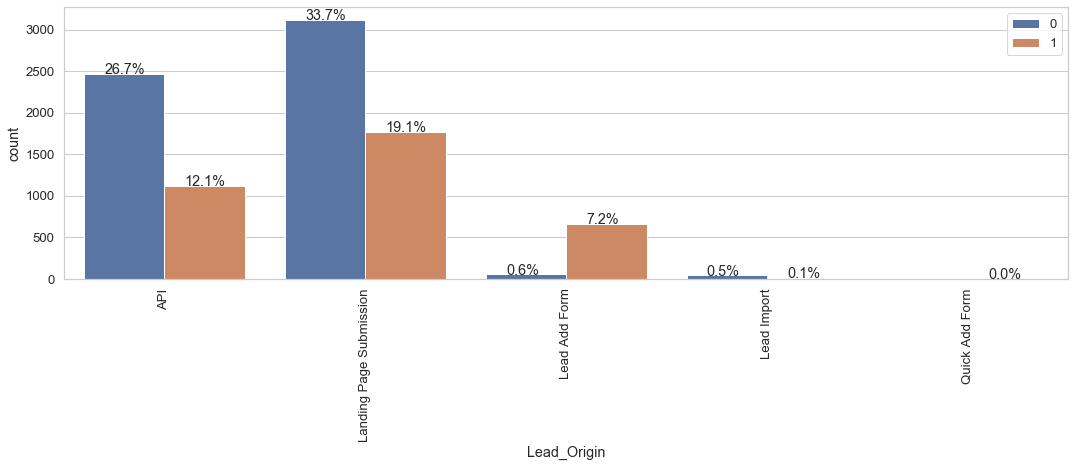

Segmented Univariate Analysis of variable Lead_Source with respect to Conversion


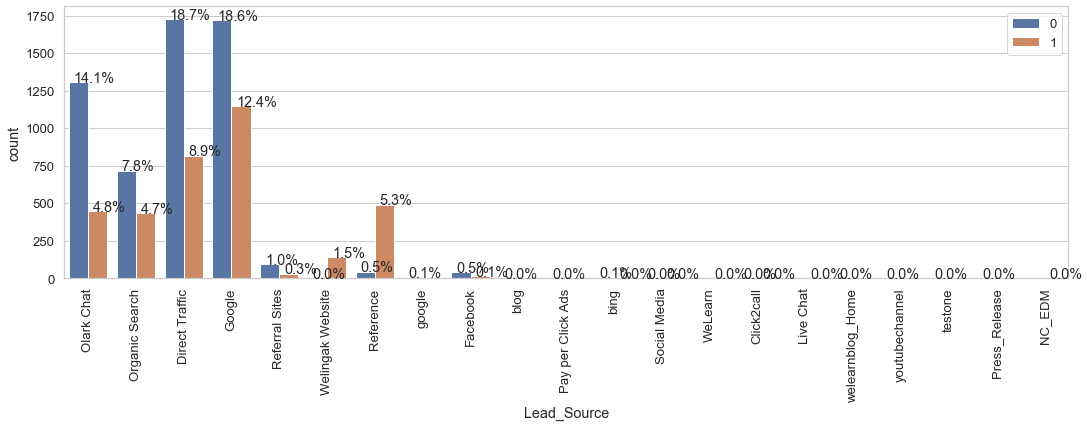

Segmented Univariate Analysis of variable Do_Not_Email with respect to Conversion


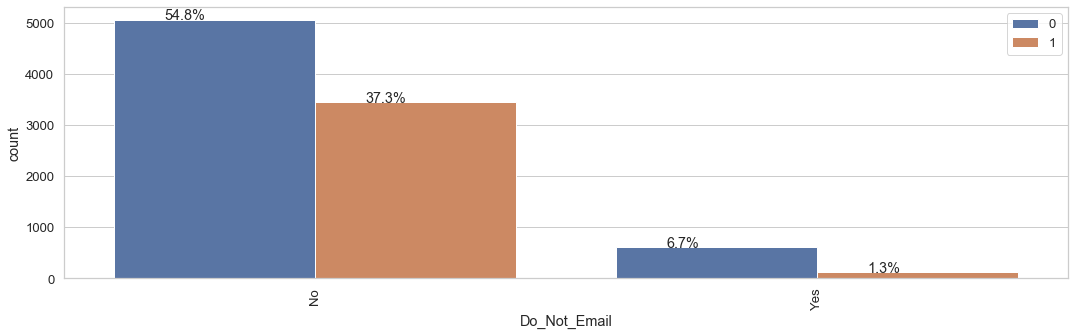

Segmented Univariate Analysis of variable Do_Not_Call with respect to Conversion


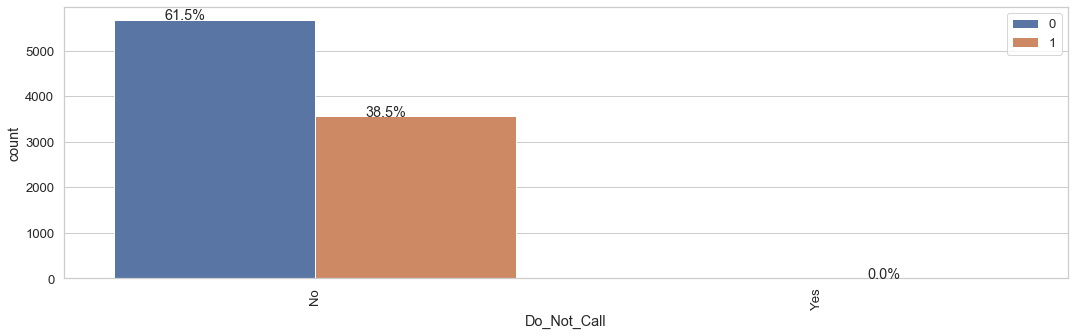

Segmented Univariate Analysis of variable Last_Activity with respect to Conversion


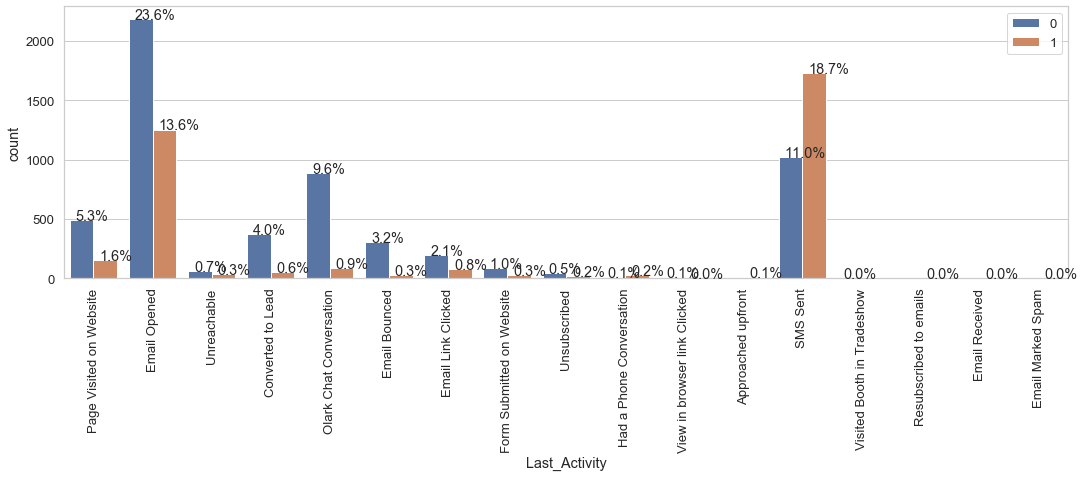

Segmented Univariate Analysis of variable Country with respect to Conversion


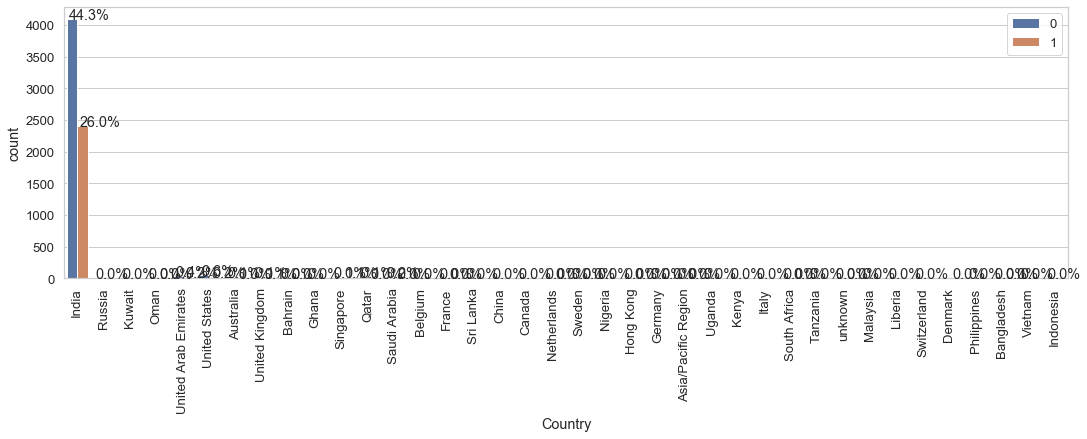

Segmented Univariate Analysis of variable Specialization with respect to Conversion


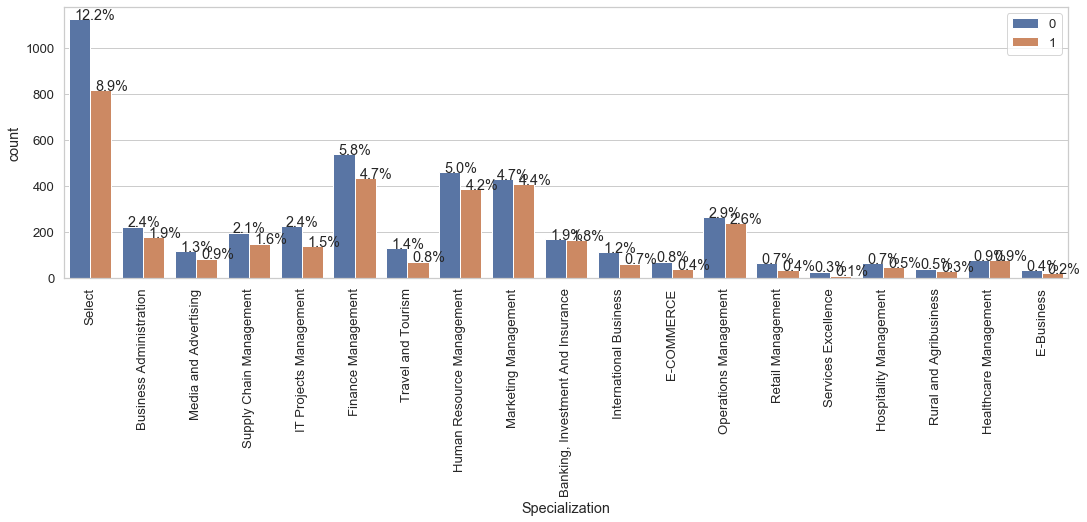

Segmented Univariate Analysis of variable How_did_you_hear_about_X_Education with respect to Conversion


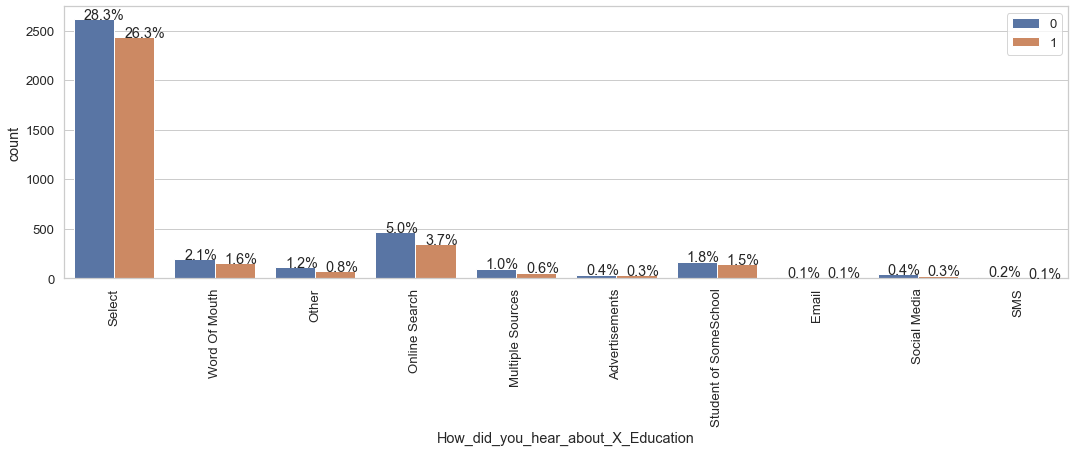

Segmented Univariate Analysis of variable What_is_your_current_occupation with respect to Conversion


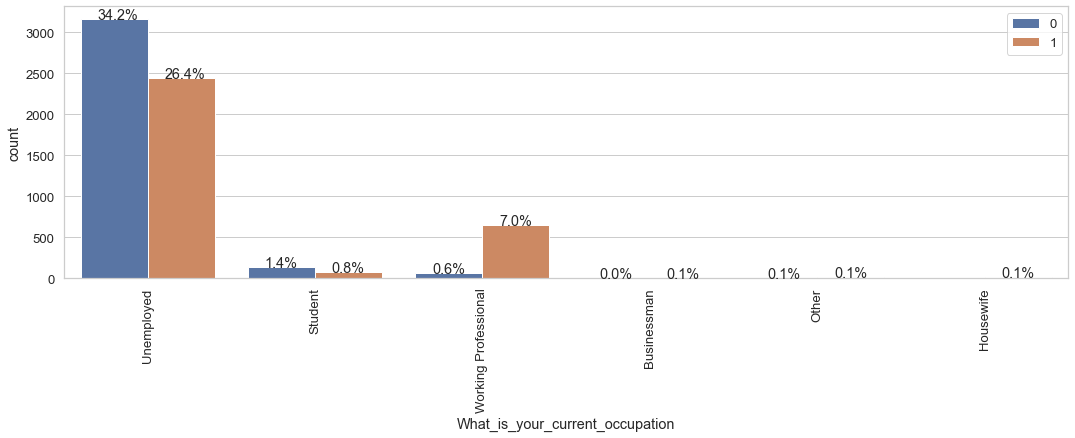

Segmented Univariate Analysis of variable What_matters_most_to_you_in_choosing_a_course with respect to Conversion


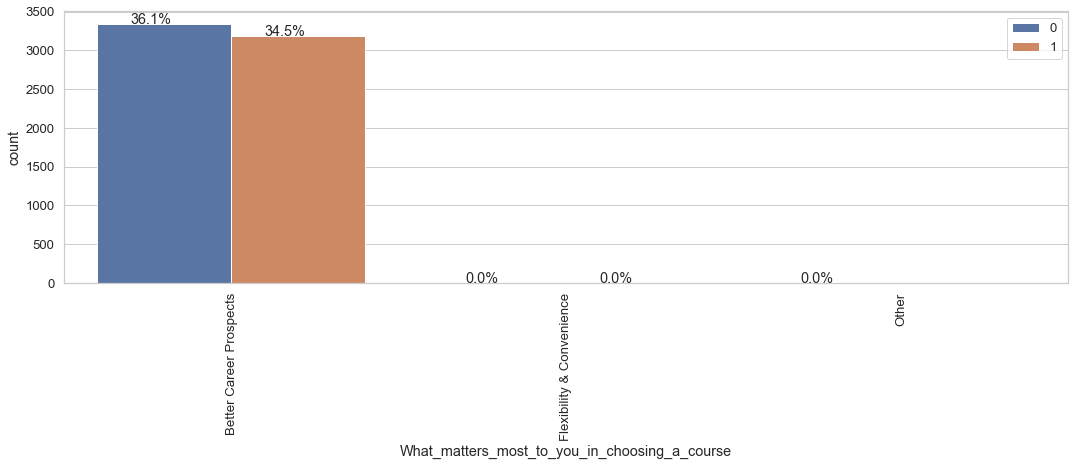

Segmented Univariate Analysis of variable Search with respect to Conversion


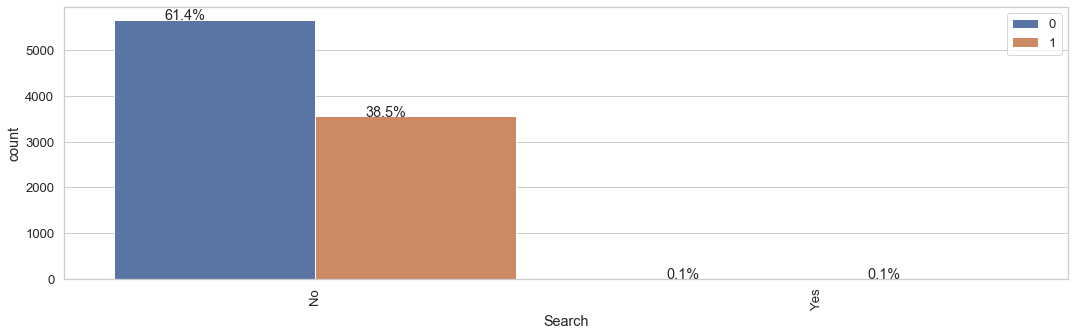

Segmented Univariate Analysis of variable Magazine with respect to Conversion


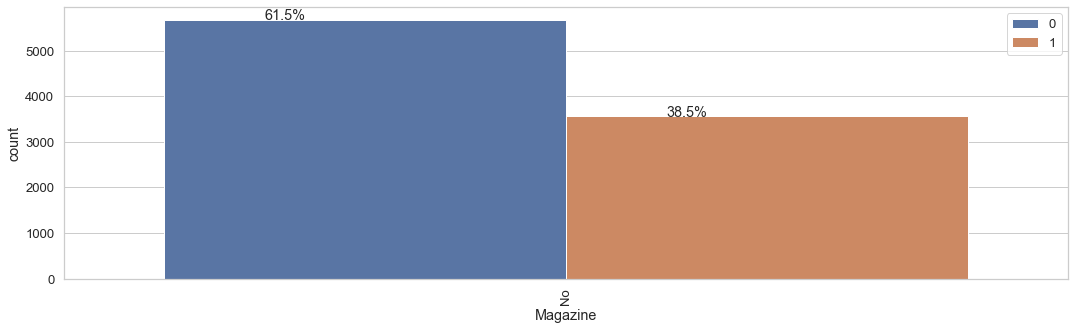

Segmented Univariate Analysis of variable Newspaper_Article with respect to Conversion


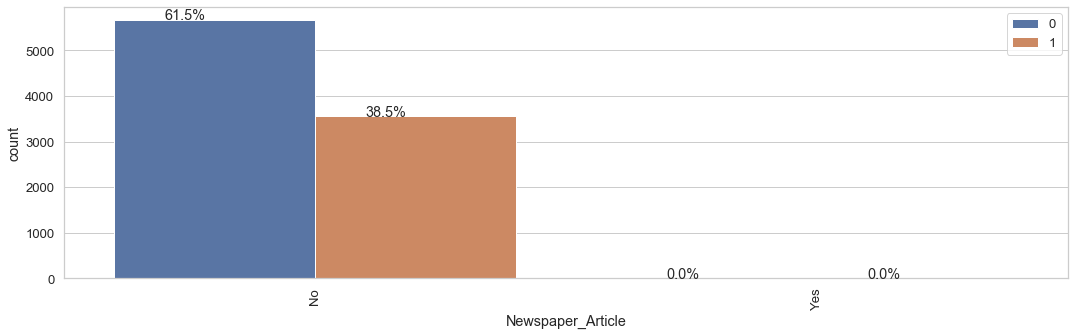

Segmented Univariate Analysis of variable X_Education_Forums with respect to Conversion


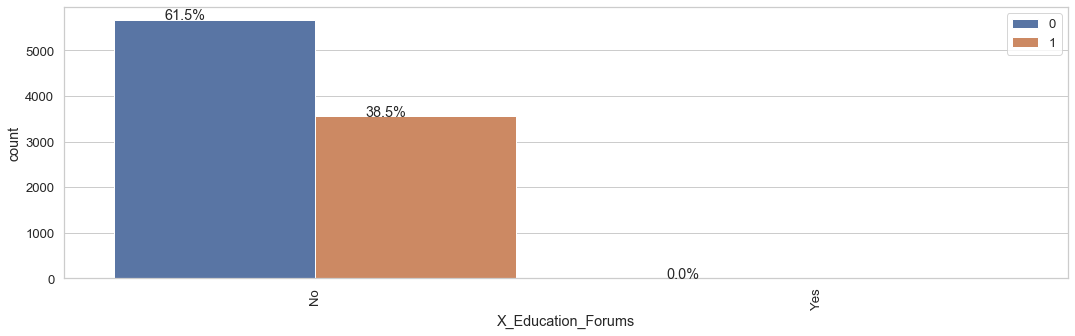

Segmented Univariate Analysis of variable Newspaper with respect to Conversion


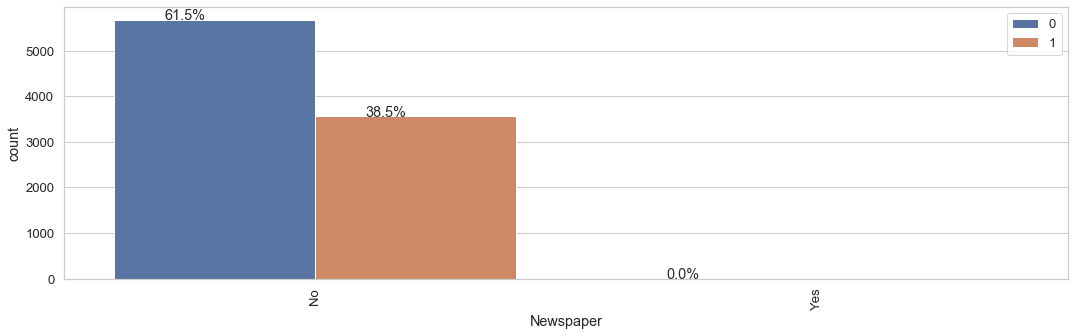

Segmented Univariate Analysis of variable Digital_Advertisement with respect to Conversion


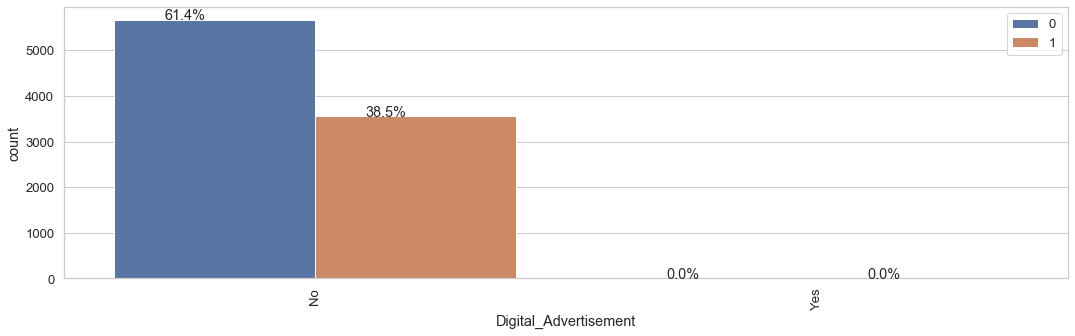

Segmented Univariate Analysis of variable Through_Recommendations with respect to Conversion


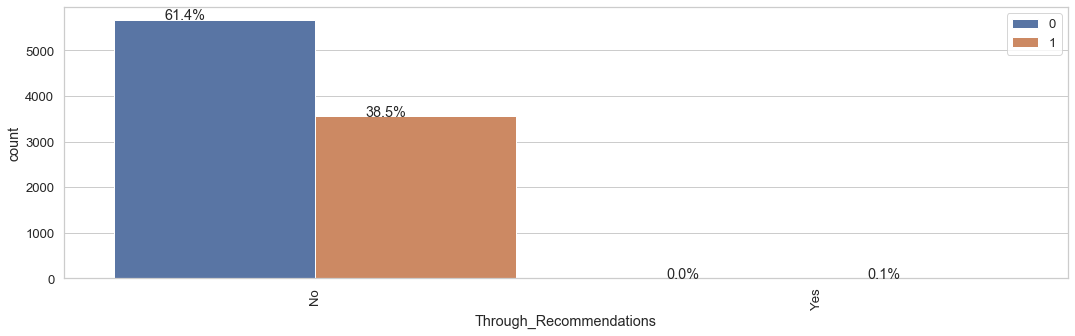

Segmented Univariate Analysis of variable Receive_More_Updates_About_Our_Courses with respect to Conversion


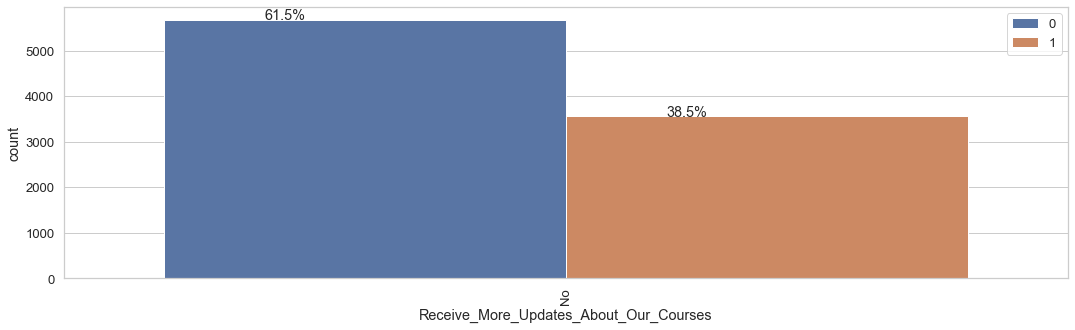

Segmented Univariate Analysis of variable Tags with respect to Conversion


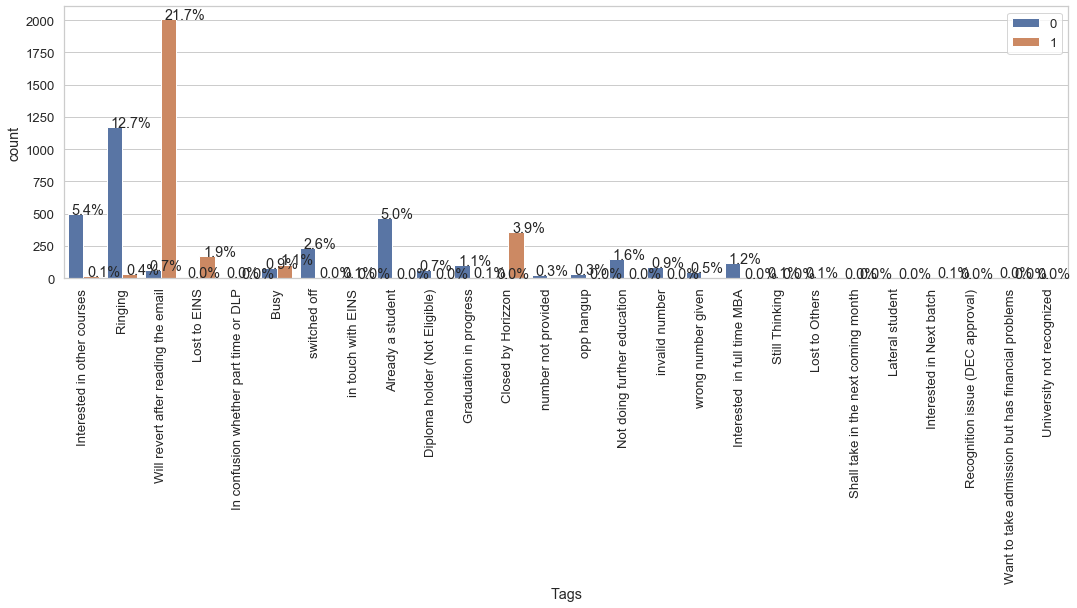

Segmented Univariate Analysis of variable Lead_Quality with respect to Conversion


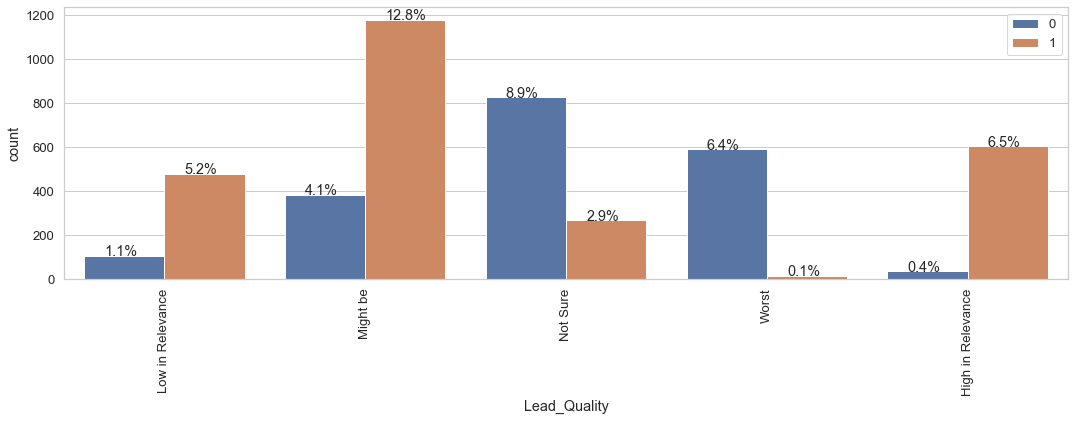

Segmented Univariate Analysis of variable Update_me_on_Supply_Chain_Content with respect to Conversion


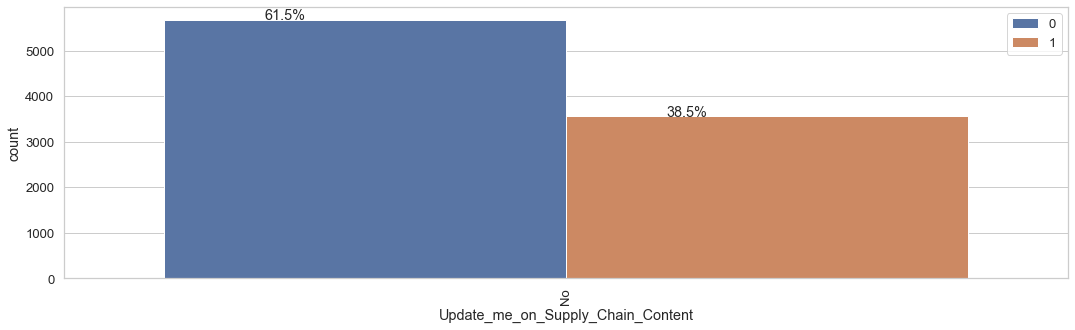

Segmented Univariate Analysis of variable Get_updates_on_DM_Content with respect to Conversion


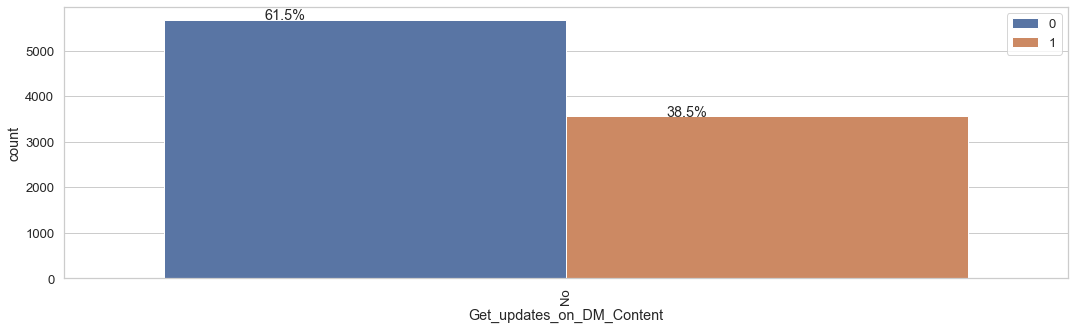

Segmented Univariate Analysis of variable Lead_Profile with respect to Conversion


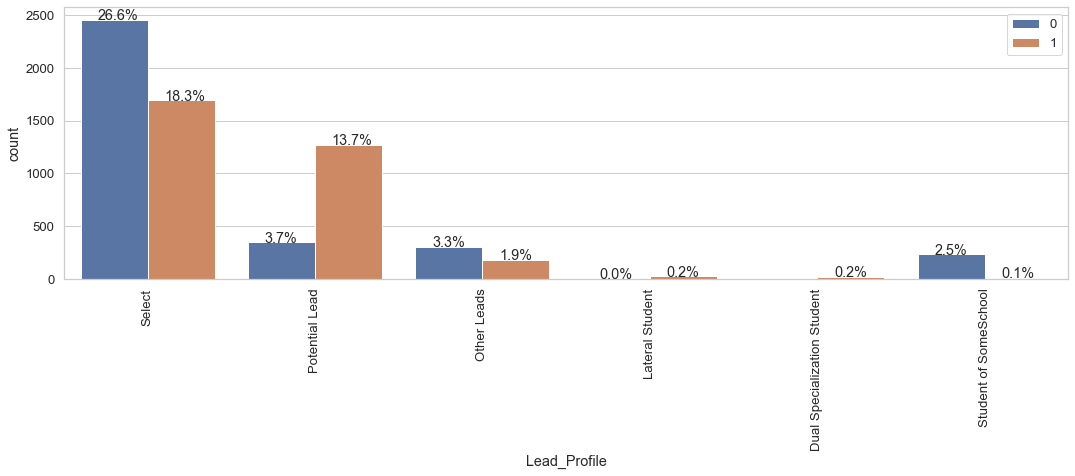

Segmented Univariate Analysis of variable City with respect to Conversion


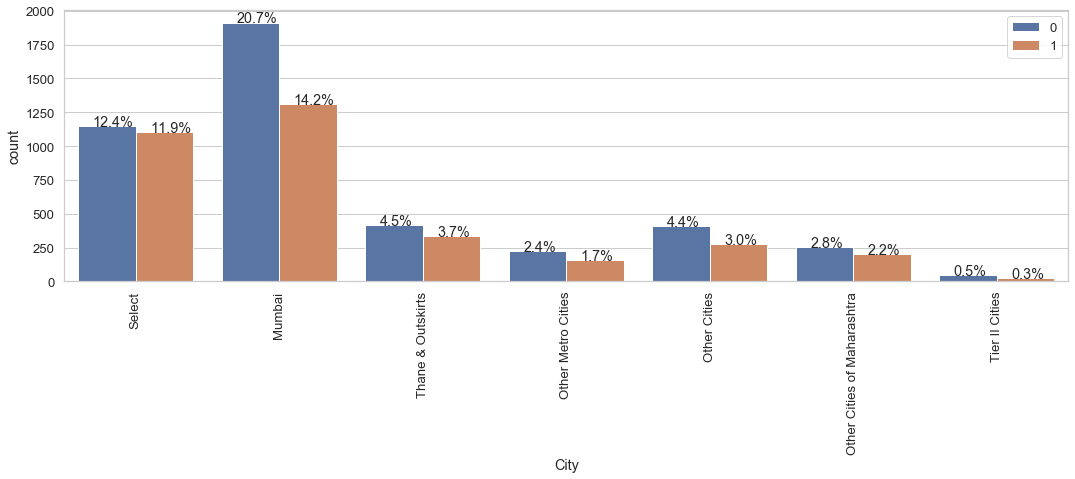

Segmented Univariate Analysis of variable Asymmetrique_Activity_Index with respect to Conversion


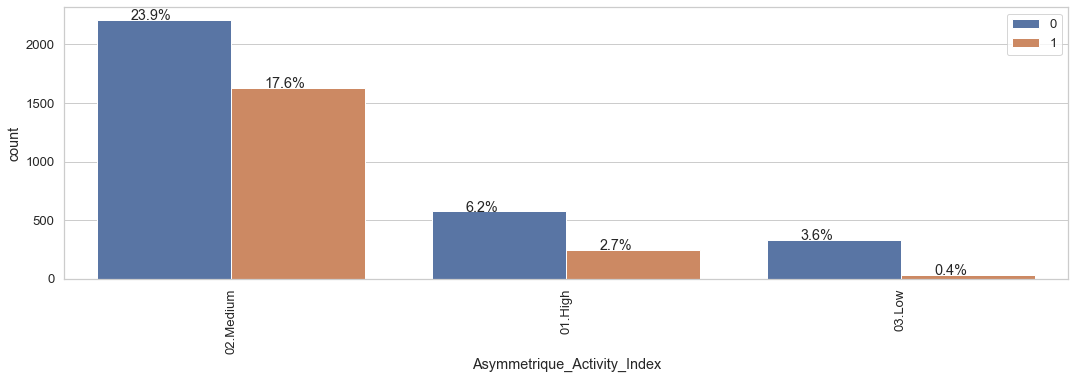

Segmented Univariate Analysis of variable Asymmetrique_Profile_Index with respect to Conversion


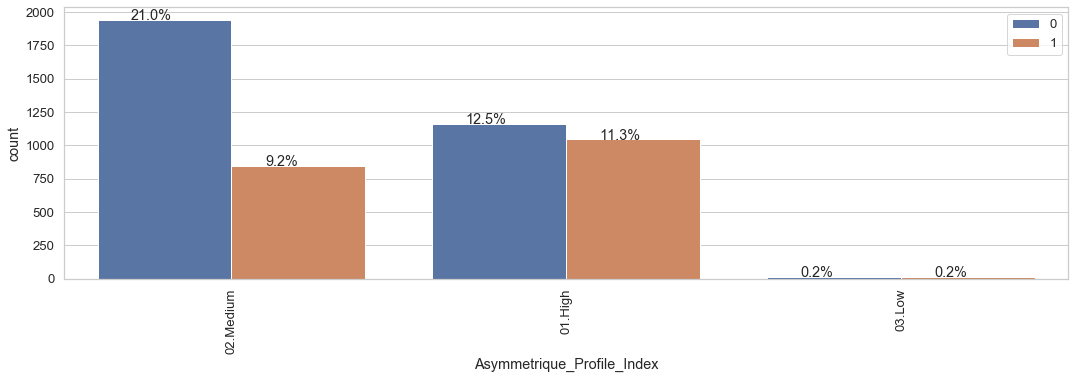

Segmented Univariate Analysis of variable I_agree_to_pay_the_amount_through_cheque with respect to Conversion


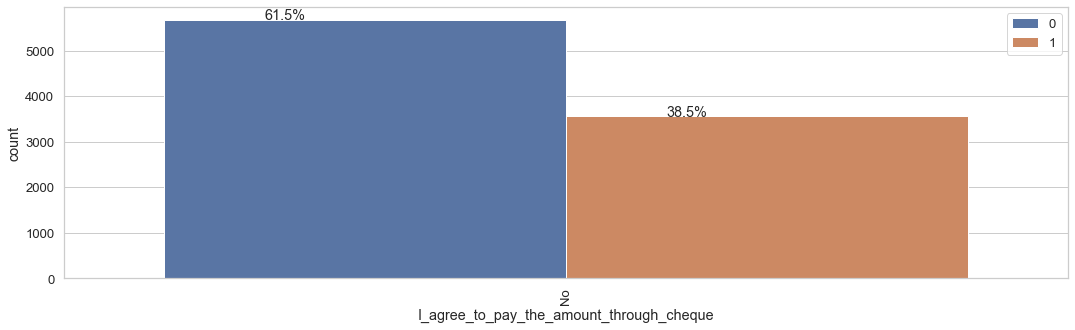

Segmented Univariate Analysis of variable A_free_copy_of_Mastering_The_Interview with respect to Conversion


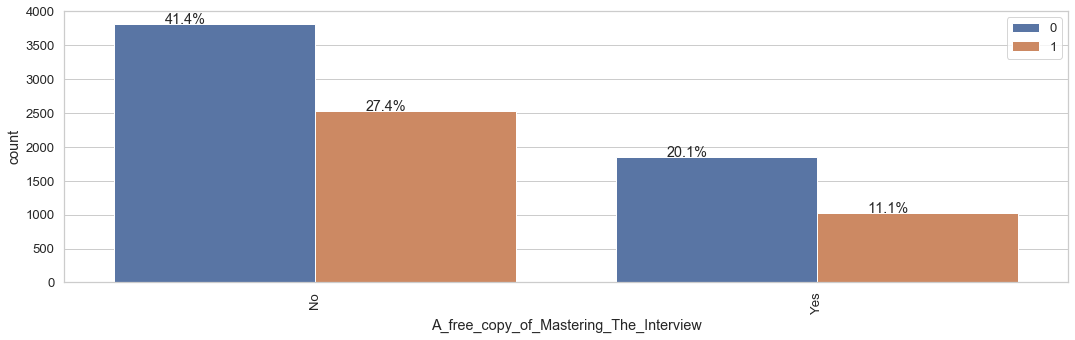

Segmented Univariate Analysis of variable Last_Notable_Activity with respect to Conversion


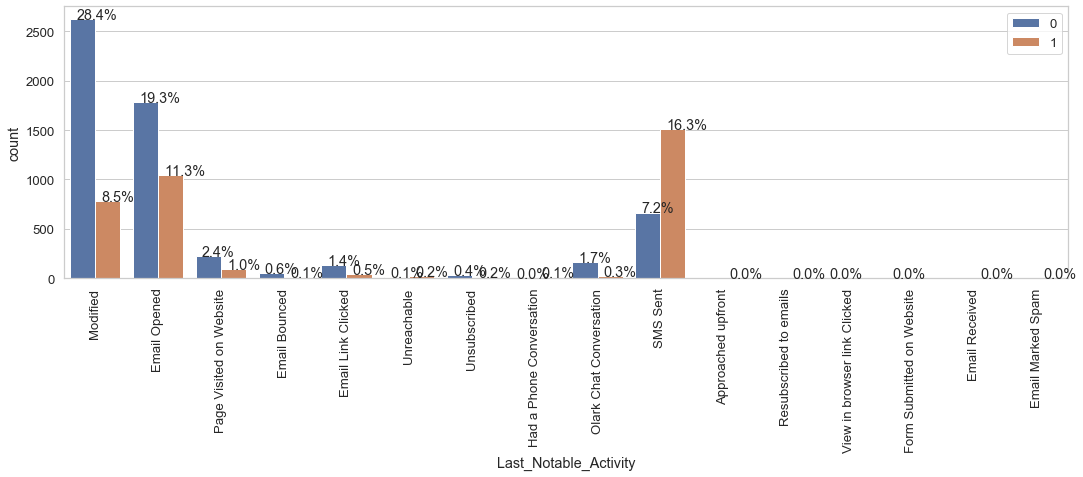

In [201]:
#Plotting the Target Segmented plot for each of the Categorical columns
for each in cat_cols:
    print(color.BOLD+color.GREEN+"Segmented Univariate Analysis of variable {} with respect to Conversion".format(each))
    figure(num=None, figsize=(18, 5), facecolor='w', edgecolor='k')
    ax = sns.countplot(x=each,hue ='Converted',data=df)
    plt.xticks(rotation='vertical')
    total = len(df)
    for p in ax.patches: 
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))        
    plt.legend(loc=1)
    plt.show()

Observations:

- 1) When the Lead_Origin is Lead Add form, the conversion rate is the highest.
- 2) When the Lead_Source is Welingak Website or Reference, the conversion rate is the highest.
- 3) Most of the leads opted for Do_not_email as No, while as very few as Yes.
- 4) Almost all the leads opted for Do_not_call as No, thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 5) Last_Activity as 'SMS Sent' seems to have the maximum conversion rate.
- 6) Almost for all the records expect few, the country is India, thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 7) Specialization shows a similar trend of Conversion across all the levels.
- 8) The feature 'How_did_you_hear_about_X_Education' comprises of mostly unfilled/Select values thereby, not much information could be drawn from it.
- 9) The Feature 'What_is_your_current_occupation' seems to show reverse trend between the 'Unemployed' and the 'Working Professionals' where the conversion rate is good for 'Working Professionals' unlike 'Unemployed'
- 10) The column 'What_matters_most_to_you_in_choosing_a_course' has almost all the records showing for 'Better Career Prospects' thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 11) The column Search also has most of the records showing for 'No' thereby this feature seems not much significant for our classifiation task as there is no variance in the values.
- 12) The column 'Magazine' has all the records showing 'No' thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 13) The column 'Newspaper_Article' has most of the records showing 'No' thereby this feature seems not much significant for our classifiation task as there is no variance in the values.
- 14) The column 'X_Education_Forums' has most of the records showing 'No' thereby this feature seems not much significant for our classifiation task as there is no variance in the values.
- 15) The column 'Newspaper' has most of the records showing 'No' thereby this feature seems not much significant for our classifiation task as there is no variance in the values.
- 16) The column 'Digital_Advertisement' has most of the records showing 'No' thereby this feature seems not much significant for our classifiation task as there is no variance in the values.
- 17) The column 'Through_Recommendations' has most of the records showing 'No' thereby this feature seems not much significant for our classifiation task as there is no variance in the values.
- 18) The column 'Receive_More_Updates_About_Our_Courses' has all the records showing 'No' thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 19) The Column 'Tags' shows a very good Conversion rate for 'We will revert after reading the email' and a bad Conversion rate for 'Ringing'.
- 20) Lead Quality as 'Might be/High in Relevance/Low in Relevance' show a good trend in conversion while the 'Not Sure/Worst' show bad conversion rates.
- 21) The column 'Update_me_on_Supply_Chain_Content' has all the records showing 'No' thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 22) The column 'Get_updates_on_DM_Content' has all the records showing 'No' thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 23) Lead_Profile has most of the values as Select(unknown), thereby not much information can be drawn out of it.
- 24) City shows a similar trend in Conversion rate for all levels. Most of the cities in the data are Mumbai.
- 25) The columns 'I_agree_to_pay_the_amount_through_cheque' has all the records showing 'No' thereby this feature seems useless for our classifiation task as there is no variance in the values.
- 26) The column 'A_free_copy_of_Mastering_The_Interview' shows a similar trend in conversion for both Yes and No. The Nos are little more than the Yeses.
- 27) The feature 'Last_Notable_Activity' shows a positive conversion trend for 'SMS Sent' and a negative conversion trend for 'Modified' and 'Email Opened'

## Bivariate Analysis

Bivariate Analysis of variable Converted and Lead_Origin


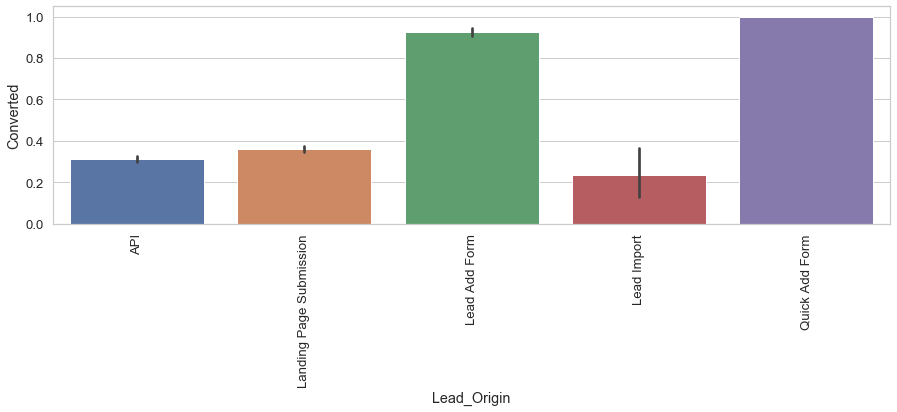

Bivariate Analysis of variable Converted and Lead_Source


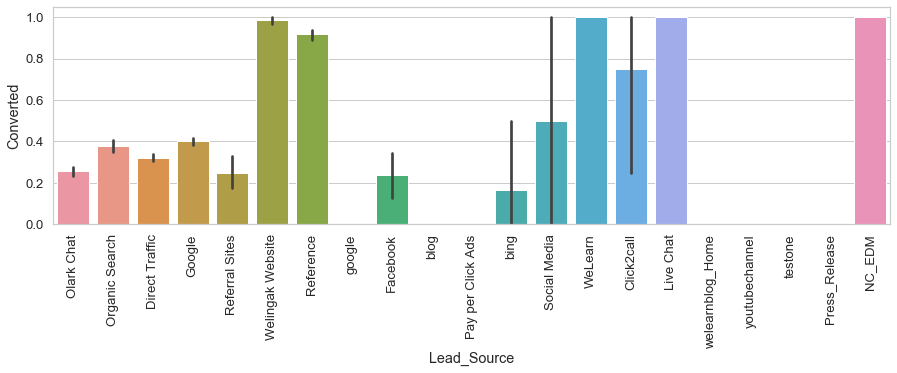

Bivariate Analysis of variable Converted and Do_Not_Email


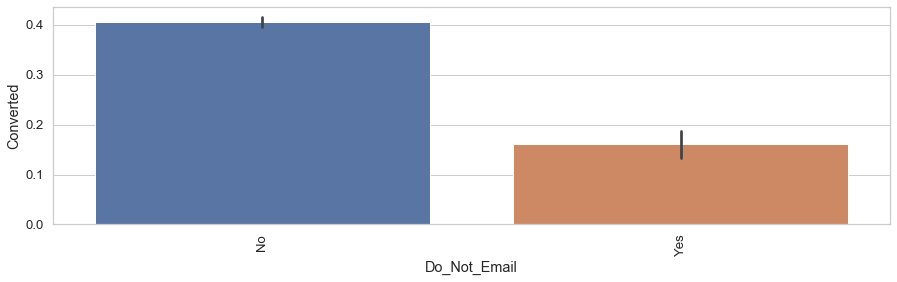

Bivariate Analysis of variable Converted and Do_Not_Call


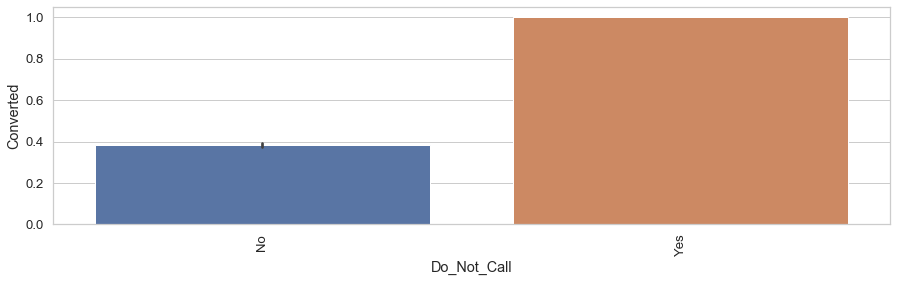

Bivariate Analysis of variable Converted and Last_Activity


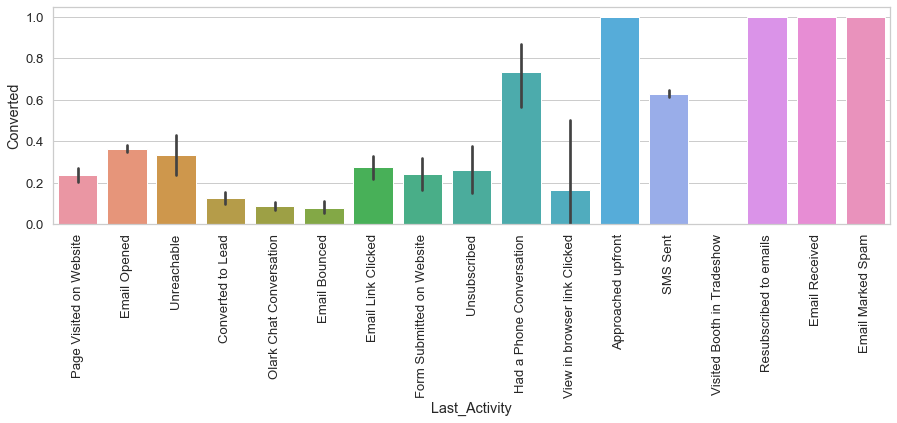

Bivariate Analysis of variable Converted and Country


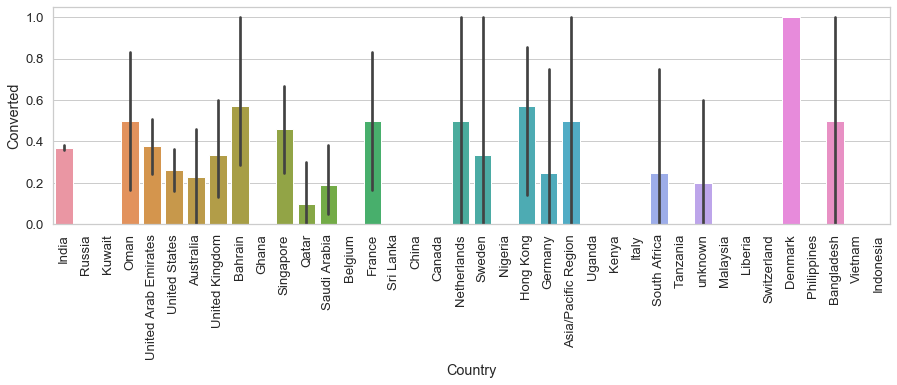

Bivariate Analysis of variable Converted and Specialization


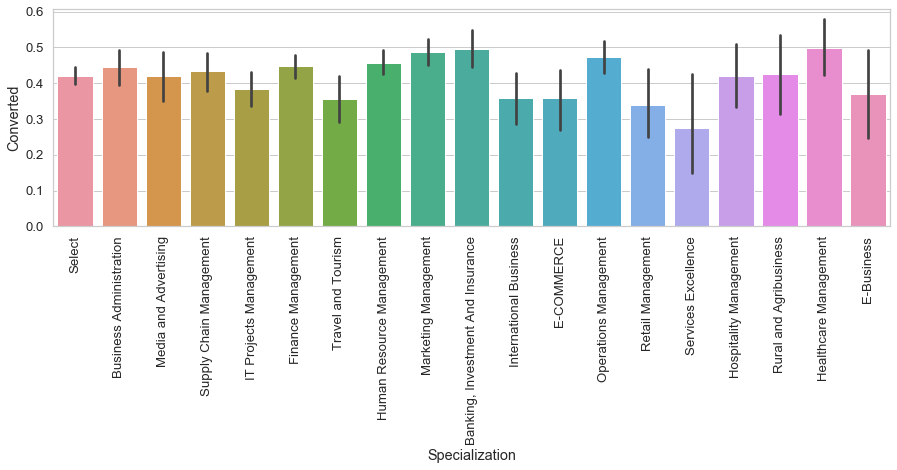

Bivariate Analysis of variable Converted and How_did_you_hear_about_X_Education


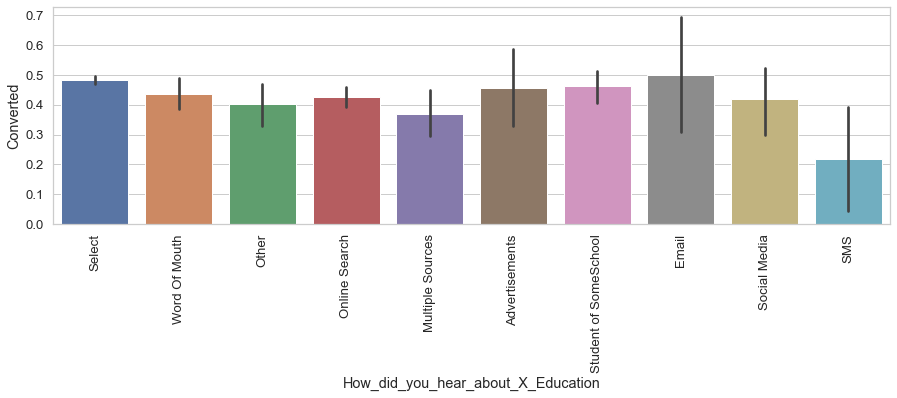

Bivariate Analysis of variable Converted and What_is_your_current_occupation


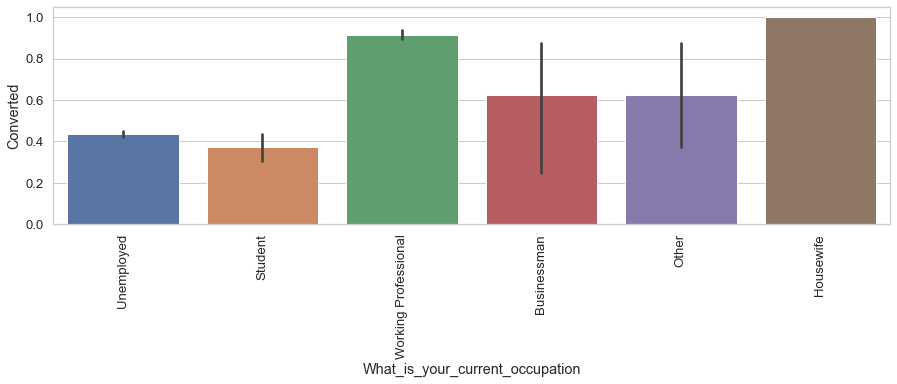

Bivariate Analysis of variable Converted and What_matters_most_to_you_in_choosing_a_course


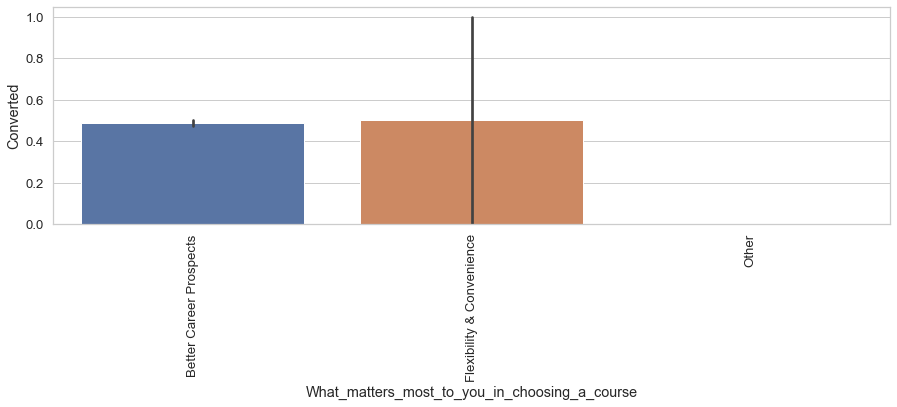

Bivariate Analysis of variable Converted and Search


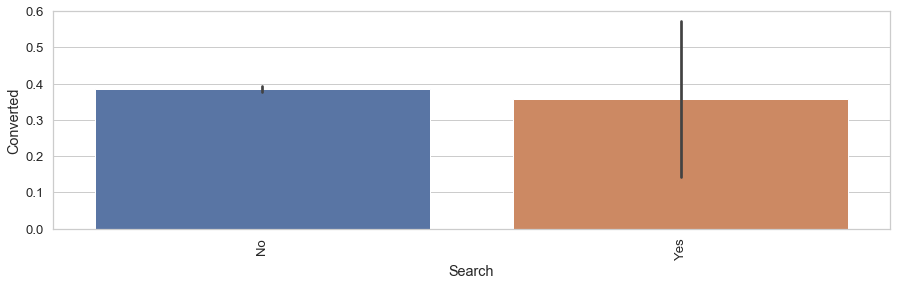

Bivariate Analysis of variable Converted and Magazine


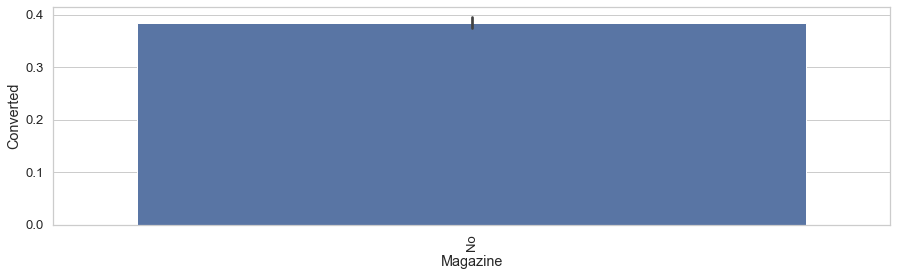

Bivariate Analysis of variable Converted and Newspaper_Article


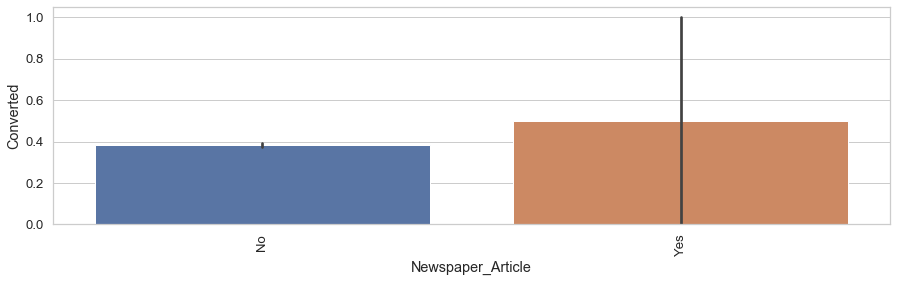

Bivariate Analysis of variable Converted and X_Education_Forums


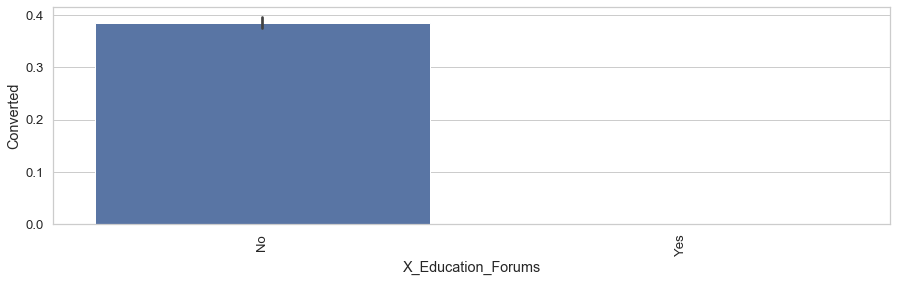

Bivariate Analysis of variable Converted and Newspaper


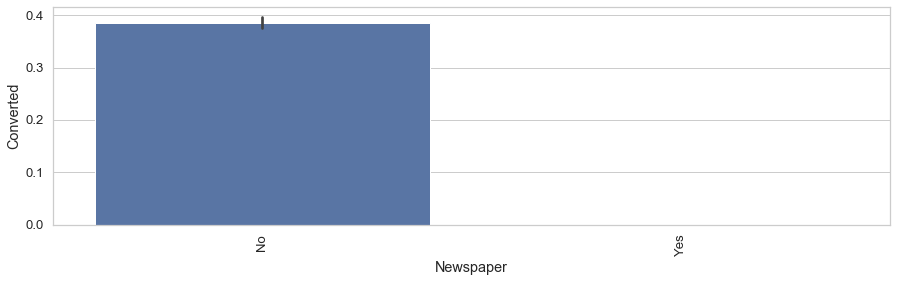

Bivariate Analysis of variable Converted and Digital_Advertisement


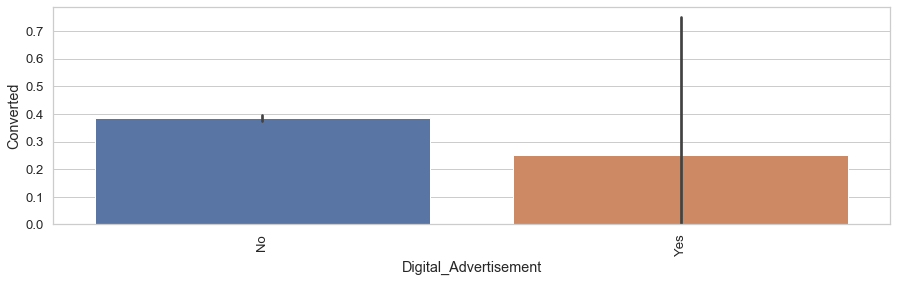

Bivariate Analysis of variable Converted and Through_Recommendations


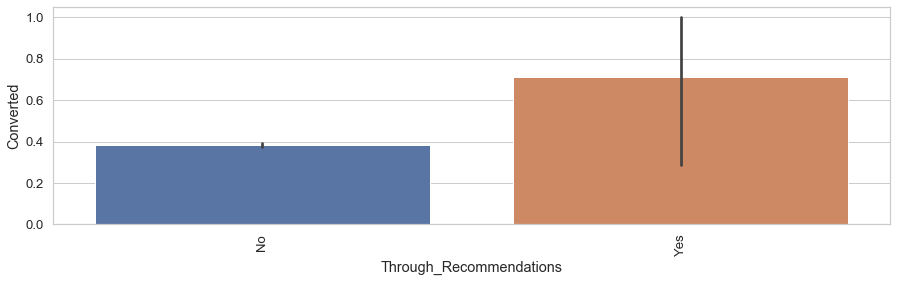

Bivariate Analysis of variable Converted and Receive_More_Updates_About_Our_Courses


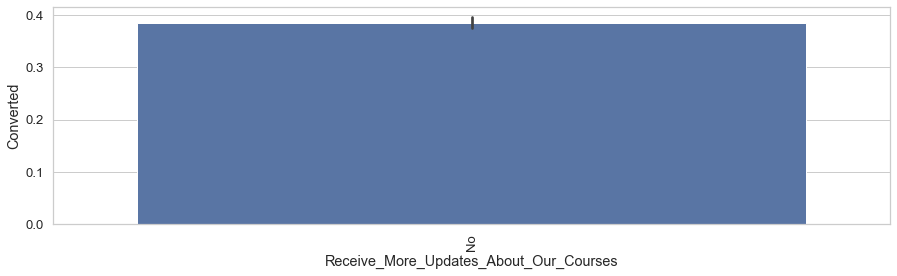

Bivariate Analysis of variable Converted and Tags


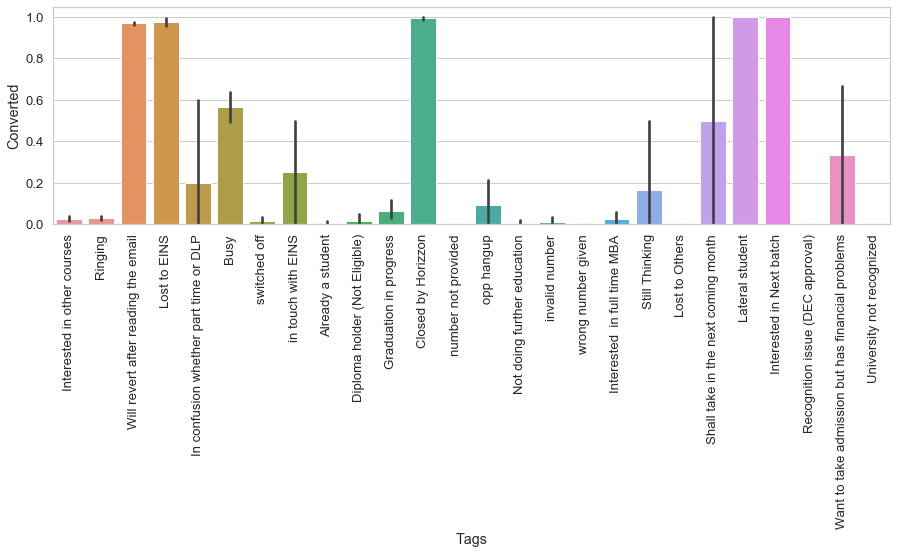

Bivariate Analysis of variable Converted and Lead_Quality


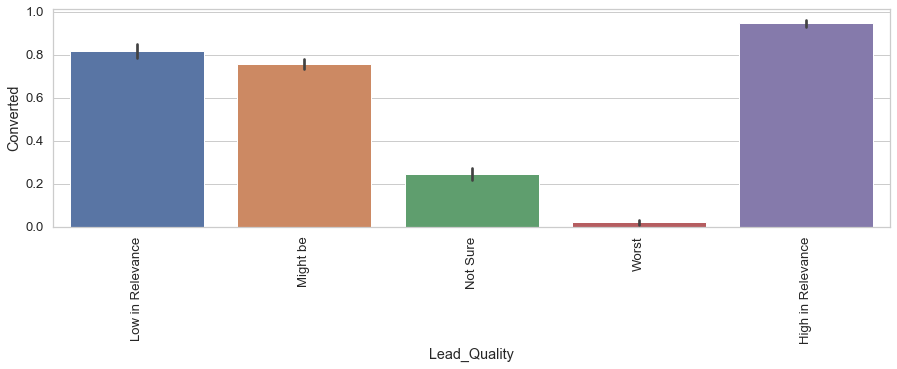

Bivariate Analysis of variable Converted and Update_me_on_Supply_Chain_Content


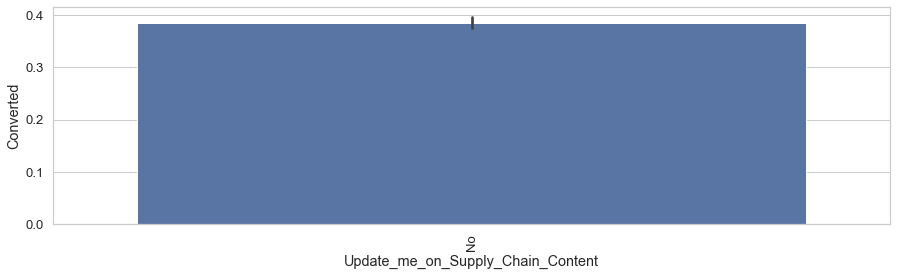

Bivariate Analysis of variable Converted and Get_updates_on_DM_Content


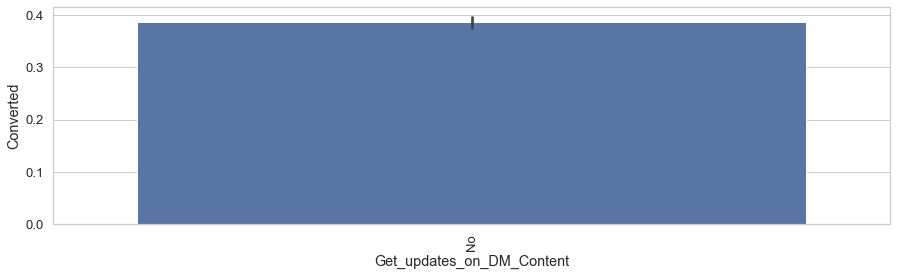

Bivariate Analysis of variable Converted and Lead_Profile


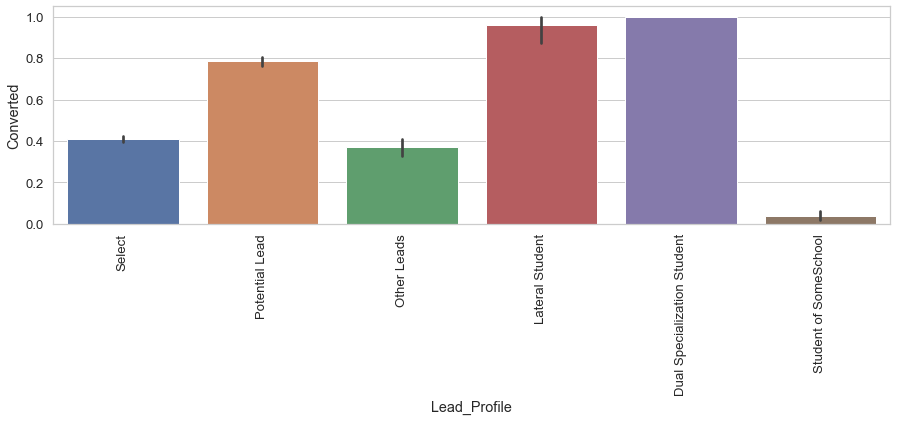

Bivariate Analysis of variable Converted and City


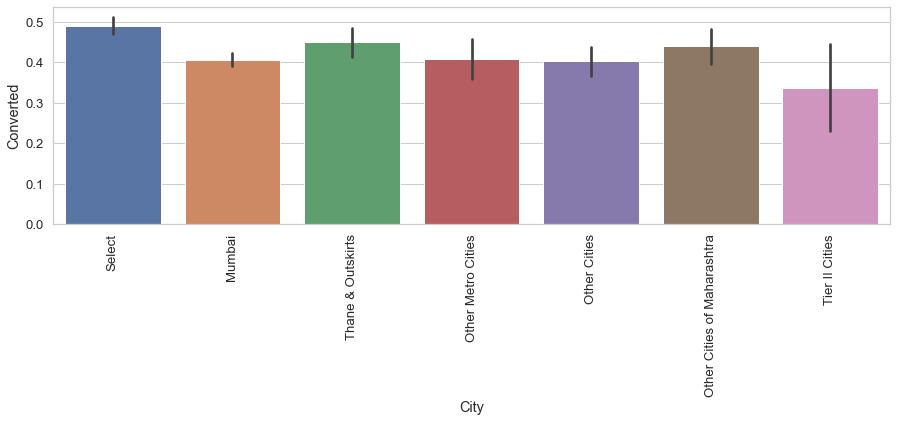

Bivariate Analysis of variable Converted and Asymmetrique_Activity_Index


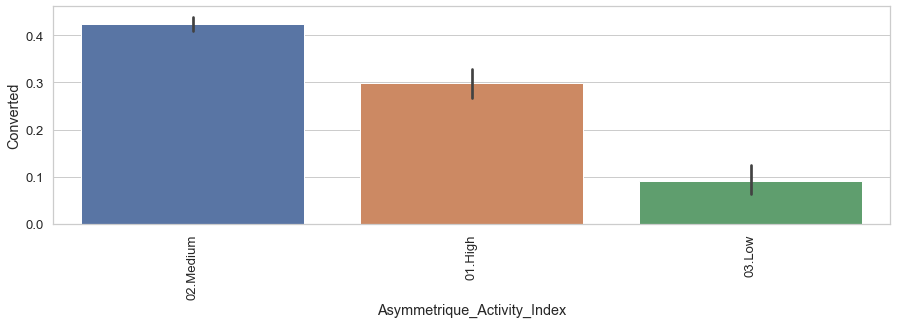

Bivariate Analysis of variable Converted and Asymmetrique_Profile_Index


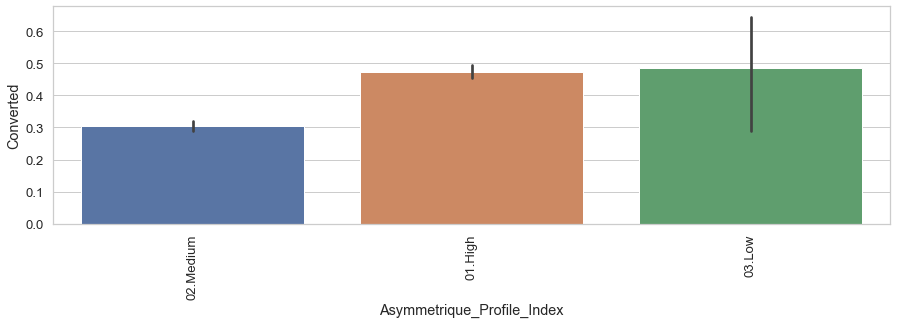

Bivariate Analysis of variable Converted and I_agree_to_pay_the_amount_through_cheque


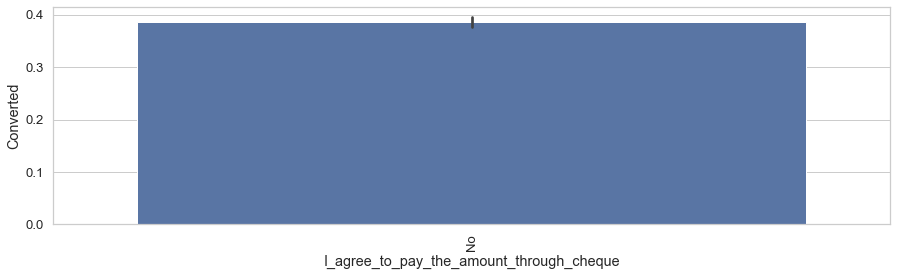

Bivariate Analysis of variable Converted and A_free_copy_of_Mastering_The_Interview


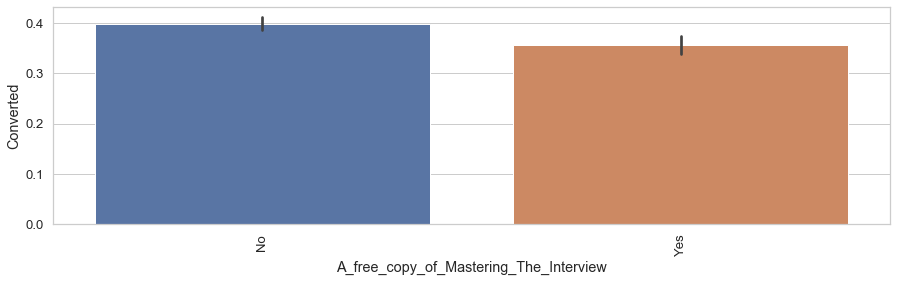

Bivariate Analysis of variable Converted and Last_Notable_Activity


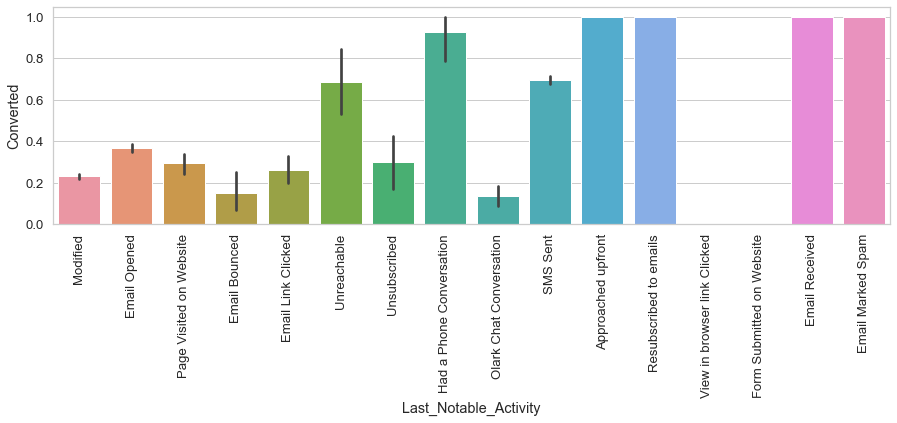

In [202]:
# Showing the mean trends of all categorical features with respect to Conversion
for each in cat_cols:
    print(color.BOLD+color.GREEN+"Bivariate Analysis of variable Converted and {}".format(each))
    figure(num=None, figsize=(15, 4), facecolor='w', edgecolor='k')
    sns.barplot(df[each],df['Converted'])
    plt.xticks(rotation='vertical')
    plt.show()

Observations: 
- 1) Lead_Origin as 'Quick Add form' followed by Lead Add form, has the conversion rate.
- 2) Lead_Source as NC_EDM/Live CHat/WeLearn followed by Welingak Website and Reference have the highest conversion rate
- 3) Last_Activity as 'Email Marked Spam','Email Received','Resubscribed to emails', 'Approached Upfront' followed by 'Had a Phone COnversation' and 'SMS Sent' seems to have the maximum conversion rate.
- 4) Specialization shows a very similar rate of Conversion across all the levels. Hence it seems that for any value of Specialization, the conversion is unimpacted. Therefore this column is not significant for the classfication.
- 5) The Feature 'What_is_your_current_occupation' seems to show high Conversion for 'Housewife' followed by 'Working Professionals' and low conversion for 'Student' and 'Unemployed'
- 6) The column 'Through_Recommendations' has most of the records showing 'No' and very few as Yes but the conversion rate is good for the Yeses.
- 7) The Column 'Tags' shows almost close to 100% conversion for Lateral Student/Interested in Next Batch/Closed by Horizzon/Lost to EINS and We will revert after reading the email.
- 8) City shows a similar trend in Conversion rate for all levels. Hence it seems that for any City, the conversion is unimpacted. Therefore this column is not significant for the classfication.
- 9) The column 'A_free_copy_of_Mastering_The_Interview' shows a similar trend in conversion for both Yes and No. The conversion is mostly unimpacted. Therefore this column is not significant for the classfication.
- 10) The feature 'Last_Notable_Activity' shows very High Conversion (almost 100%) for Email Markes Spam/Email Received/Resubscribe to emails/Approached upfront followed by 'Had a Phone Conversation'.

# Cleaning the Data

## Inspecting the data pre-clean up

### % of Lead Conversion

In [203]:
100*(sum(df['Converted'] == 1)/len(df['Converted']))

38.53896103896104

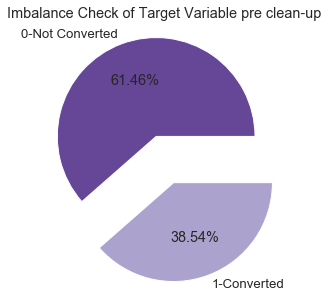

In [204]:
# plot Lead conversion variable Non conversion
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2,palette='PuOr_r')
explode = (0.5,0.0)
labels = '0-Not Converted', '1-Converted'
plt.pie(df['Converted'].value_counts(),autopct='%1.2f%%',explode=explode,labels=labels)
plt.title("Imbalance Check of Target Variable pre clean-up")
plt.axis('equal')
plt.show()

__Inferences__
1. The available data is distributed 62% for not converted records and 39% converted records

## Create a list of Numerical and Categorical columns

In [205]:
#  a list of numerical and categorical variables for future analysis
num_cols = list(df.select_dtypes(include=np.number).columns)
cat_cols = list(df.select_dtypes(exclude=np.number).columns)
cat_cols.remove("Prospect_ID")
print(color.BOLD+"List of Numerical Columns -"+color.END,num_cols)
print(color.BOLD+"List of Categorical Columns -"+color.END,cat_cols)

List of Numerical Columns - ['Lead_Number', 'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']
List of Categorical Columns - ['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation', 'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality', 'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content', 'Lead_Profile', 'City', 'Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index', 'I_agree_to_pay_the_amount_through_cheque', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity']


## Analyze Categorical Columns of the df


In [206]:
# Inspect the categorical variables in df
df[cat_cols].head()

Lead_Origin     Lead_Source Do_Not_Email Do_Not_Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

             Last_Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How_did_you_hear_about_X_Education What_is_your_current_occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What_matters_most_to_you_in_choosing_a_course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper_Article X_Education_Forums Newspaper Digital_Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through_Recommendations Receive_More_Updates_About_Our_Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead_Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update_me_on_Supply_Chain_Content Get_updates_on_DM_Content    Lead_Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City Asymmetrique_Activity_Index Asymmetrique_Profile_Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

  I_agree_to_pay_the_amount_through_cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                               

### Value Counts of Categorical Columns

In [207]:
# Value counts across the categorical column
for each in cat_cols:
    print(color.BOLD+color.DARKCYAN+"Value Counts of ",each+color.END)
    print(df[each].value_counts(dropna=False))
    print(color.BOLD+"*"*50+color.END)

Value Counts of  Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64
**************************************************
Value Counts of  Lead_Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
Name: Lead_Source, dtype: int64
**************************************************
Value Counts of  Do_Not_Email
No     8506
Ye

In [208]:
# Transform the data based on observations
# Google and google are same, bing is part of Organic Searc. Google is organic search aswell but due to many uses google, we 
# kept it as separate field. Facebook should be part of Social Media
df.Lead_Source = df.Lead_Source.apply(lambda x : "Google" if (x == "google") else x)
df.Lead_Source = df.Lead_Source.apply(lambda x : "Organic Search" if (x == "bing") else x)
df.Lead_Source = df.Lead_Source.apply(lambda x : "Social Media" if (x == "Facebook") else x)

In [209]:
# Explore Lead_Source after the transforming the names
print(df.Lead_Source.value_counts(dropna=False))

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1160
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           57
NaN                    36
Click2call              4
Press_Release           2
Live Chat               2
welearnblog_Home        1
youtubechannel          1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead_Source, dtype: int64


Inferences:

* Do_Not_Call do not have much variance in the column data and hence, we choose to drop this column.
* Magazine has only one unique variable No irrespective of the coversion factor and this might not be good idea to retain this column.
* Newspaper_Article do not have much variance in the column data and hence, we choose to drop this column.
* X_Education_Forums do not have much variance in the column data and hence, we choose to drop this column.
* Newspaper do not have much variance in the column data and hence, we choose to drop this column.
* Digital_Advertisement do not have much variance in the column data and hence, we choose to drop this column.
* Through_Recommendations do not have much variance in the column data and hence, we choose to drop this column.
* Receive_More_Updates_About_Our_Courses has only one unique variable No irrespective of the coversion factor and this might not be good idea to retain this column.
* Update_me_on_Supply_Chain_Content has only one unique variable No irrespective of the coversion factor and this might not be good idea to retain this column.
* Get_updates_on_DM_Content has only one unique variable No irrespective of the coversion factor and this might not be good idea to retain this column.
* I_agree_to_pay_the_amount_through_cheque has only one unique variable No irrespective of the coversion factor and this might not be good idea to retain this column.

## Analysing Null values

In [210]:
# Inspect the nulls across the df
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

Lead_Quality                                     4767
Asymmetrique_Profile_Score                       4218
Asymmetrique_Profile_Index                       4218
Asymmetrique_Activity_Index                      4218
Asymmetrique_Activity_Score                      4218
Tags                                             3353
What_matters_most_to_you_in_choosing_a_course    2709
Lead_Profile                                     2709
What_is_your_current_occupation                  2690
Country                                          2461
How_did_you_hear_about_X_Education               2207
Specialization                                   1438
City                                             1420
Page_Views_Per_Visit                              137
TotalVisits                                       137
Last_Activity                                     103
Lead_Source                                        36
dtype: int64

In [211]:
# Percentage of Null columns across each Columns
(round(100*(df.isnull().sum()/len(df)),2)[100*(df.isnull().sum()/len(df))>0]).sort_values(ascending=False)

Lead_Quality                                     51.59
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Index                      45.65
Asymmetrique_Activity_Score                      45.65
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
Lead_Profile                                     29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
How_did_you_hear_about_X_Education               23.89
Specialization                                   15.56
City                                             15.37
Page_Views_Per_Visit                              1.48
TotalVisits                                       1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
dtype: float64

In [212]:
# As its in the Problem Statement, we consider SELECT in categorical variables as null.
# print number of columns having either Nulls or both SELECT and Nulls across the categorical columns
(round(100*((df.isnull().sum()+(df=='Select').sum())/len(df)),2)[100*(df.isnull().sum()/len(df))>0]).sort_values(ascending=False)

How_did_you_hear_about_X_Education               78.46
Lead_Profile                                     74.19
Lead_Quality                                     51.59
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Index                      45.65
Asymmetrique_Activity_Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
Page_Views_Per_Visit                              1.48
TotalVisits                                       1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
dtype: float64

In [213]:
#Replacing the Select with NANs
df = df.replace("Select",np.nan)

In [214]:
# Percentage of Null columns across each Columns
(round(100*(df.isnull().sum()/len(df)),2)[100*(df.isnull().sum()/len(df))>0]).sort_values(ascending=False)

How_did_you_hear_about_X_Education               78.46
Lead_Profile                                     74.19
Lead_Quality                                     51.59
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Index                      45.65
Asymmetrique_Activity_Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
Page_Views_Per_Visit                              1.48
TotalVisits                                       1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
dtype: float64

* __Observation:__
  1. There are lot of missing data in the given dataset
  2. It would not make any sense to impute columns having nulls of 75% and hence it makes sense to drop them.
  3. Before deriving imputation strategy, lets explore the columns

## Data Cleaning

In [215]:
#Dropping Duplicate rows if any
df.drop_duplicates(keep='first', inplace=True)
df.shape

(9240, 37)

### Dropping rows and columns with inconsistent or too little information

In [216]:
#Dropping a row where Lead Origin = 'Quick Add Form'. We just have 1 such record in the entire data
df = df[df['Lead_Origin'] != 'Quick Add Form']
df.shape

(9239, 37)

In [217]:
#Dropping 4 inconsitent rows where ['Total_Time_Spent_on_Website']==0 but ['TotalVisits']!=0]. This looks inconsitent.
dff=df[df['Total_Time_Spent_on_Website']==0]
idx = dff[dff['TotalVisits']!=0].index.tolist()
df.drop(idx,inplace=True)
df.shape

(9235, 37)

In [218]:
#Dropping 1 row where ['Tags']=='Diploma holder (Not Eligible)' but still Converted is True. This is an inconsistent data.
dff=df[df['Tags']=='Diploma holder (Not Eligible)']
idx = dff[dff['Converted']==1].index.tolist()
df.drop(idx,inplace=True)
df.shape

(9234, 37)

In [219]:
#Listing the countries against which City is based in India. This is an inconsistent behaviour.
df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")][(df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]['Country']!='India') & (~df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]['Country'].isnull())]['Country'].head(10)

87                   Kuwait
103                    Oman
243           United States
425          United Kingdom
445               Australia
502               Singapore
517           United States
676          United Kingdom
693           United States
794    United Arab Emirates
Name: Country, dtype: object

In [220]:
#Dropping Country as 'unknown'. There are 4 records against which the Countries are 'unknown'
idx = df[df['Country']=='unknown'].index.tolist()
df.drop(idx,inplace=True)
df.shape

(9229, 37)

In [221]:
#Removing inconsistent records where city belongs to India but country is non Indian but not blank
dff = df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]
print(len(dff[(dff['Country']!='India') & (~dff['Country'].isnull())]['Country']))
idx = df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")][(df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]['Country']!='India') & (~df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]['Country'].isnull())]['Country'].index.tolist()
df.drop(idx,inplace=True)
idx = df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")][(df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]['Country']!='India') & (~df[(df['City']=="Thane & Outskirts") | (df['City']=="Other Cities of Maharashtra")| (df['City']=="Mumbai")]['Country'].isnull())]['Country'].index.tolist()
df.shape

137


(9092, 37)

# Outlier Detection

In [222]:
# Percentage of Null columns across each Columns
(round(100*(df.isnull().sum()/len(df)),2)[100*(df.isnull().sum()/len(df))>0]).sort_values(ascending=False)

How_did_you_hear_about_X_Education               78.40
Lead_Profile                                     74.23
Lead_Quality                                     51.70
Asymmetrique_Profile_Score                       45.74
Asymmetrique_Profile_Index                       45.74
Asymmetrique_Activity_Index                      45.74
Asymmetrique_Activity_Score                      45.74
City                                             40.29
Specialization                                   37.08
Tags                                             36.36
What_matters_most_to_you_in_choosing_a_course    29.30
What_is_your_current_occupation                  29.09
Country                                          27.06
Page_Views_Per_Visit                              1.50
TotalVisits                                       1.50
Last_Activity                                     1.13
Lead_Source                                       0.38
dtype: float64

In [223]:
# Function to plot 2 or more box plots
# m_box_plt takes a df, dimensions of subplot (no of rows and columns) and variable list of columns
# to plot multiple boxplots
def m_box_plt(l_df,n_r,n_c,*args):
    j=1
    fig_h = n_r * 4
    plt.figure(1,figsize=(13,fig_h))
    # set palette 
    palette = itertools.cycle(sns.color_palette())
    sns.set(style="whitegrid",font_scale=1,palette='rainbow')
    for i in args:
        plt.subplot(n_r,n_c,j)
        sns.boxplot(l_df[i],orient="v")
        #sns.swarmplot(l_df[i],color=".25",orient="v")
        plt.title('Central Tendency of {}'.format(i),fontsize=12)
        j+=1
    plt.show()

In [224]:
# Create a list with quantiles
q_li = [0.01,0.05,0.25,0.75,0.95,0.99]

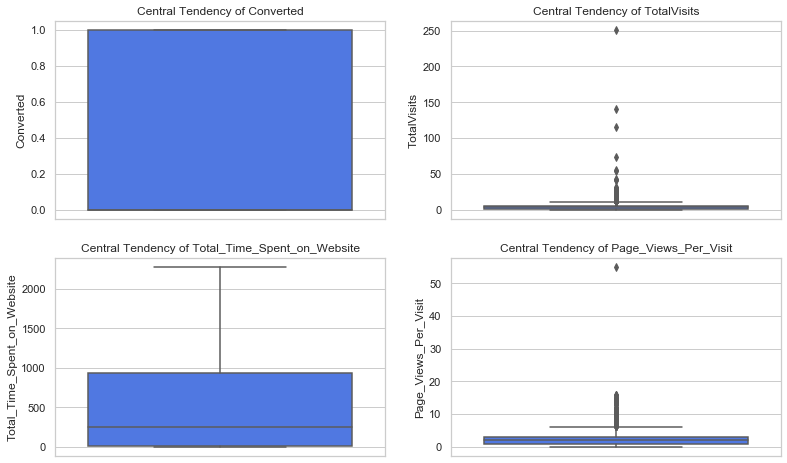

In [225]:
# m_box_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots box plots
# Part-1
m_box_plt(df,2,2,*list(num_cols[1:5]))

In [226]:
# Inspect the columns more in detail for outliers
df[num_cols[1:5]].describe(q_li)

Converted  TotalVisits  Total_Time_Spent_on_Website  \
count  9092.000000  8956.000000                  9092.000000   
mean      0.387374     3.428540                   485.644633   
std       0.487177     4.868652                   547.321070   
min       0.000000     0.000000                     0.000000   
1%        0.000000     0.000000                     0.000000   
5%        0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                     9.000000   
50%       0.000000     3.000000                   247.000000   
75%       1.000000     5.000000                   932.250000   
95%       1.000000    10.000000                  1559.900000   
99%       1.000000    17.000000                  1839.090000   
max       1.000000   251.000000                  2272.000000   

       Page_Views_Per_Visit  
count           8956.000000  
mean               2.351886  
std                2.157557  
min                0.000000  
1%                 0.000000  
5%                 0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

In [227]:
#Since the 99% and max value of Page Visit is not closer, we would look deeper post 99%
df.TotalVisits.describe([0.9925,0.9950,0.9975,0.9990,0.9995,0.9997])

count     8956.000000
mean         3.428540
std          4.868652
min          0.000000
50%          3.000000
99.25%      18.000000
99.5%       20.225000
99.75%      25.000000
99.9%       32.405000
99.95%      54.522500
99.97%      86.853500
max        251.000000
Name: TotalVisits, dtype: float64

In [228]:
#Since we do not see the variation rising much, the bar plot shows the variation rising drastically above 100.
# Therefore we choose to drop values beyond 100
df = df[(df.TotalVisits < 100) | df.TotalVisits.isnull()]

In [229]:
#Since there does not seem a sudden rise till 99% therefore, we would inspect further to find any sudden spike
df.Total_Time_Spent_on_Website.describe([0.9925,0.9950,0.9975,0.9990,0.9995,0.9997])

count     9089.000000
mean       485.695896
std        547.375978
min          0.000000
50%        247.000000
99.25%    1870.200000
99.5%     1932.560000
99.75%    1995.000000
99.9%     2111.912000
99.95%    2153.680000
99.97%    2212.198400
max       2272.000000
Name: Total_Time_Spent_on_Website, dtype: float64

In [230]:
# There is no sudden spike in the data, therefore we arbitrary choice of cut-off at 2000
df = df[(df.Total_Time_Spent_on_Website < 2000) | (df.Total_Time_Spent_on_Website.isnull())]

In [231]:
df.Page_Views_Per_Visit.describe([0.9925,0.9950,0.9975,0.9990,0.9995,0.9997])

count     8933.000000
mean         2.348904
std          2.157097
min          0.000000
50%          2.000000
99.25%      10.000000
99.5%       11.000000
99.75%      13.000000
99.9%       14.034000
99.95%      15.000000
99.97%      16.000000
max         55.000000
Name: Page_Views_Per_Visit, dtype: float64

In [232]:
#Again the values are increasing progressively, we do not see any sudden abrupt rise
#As per the bar plot we can see an outlier beyondd 50
df = df[(df.Page_Views_Per_Visit < 50) | (df.Page_Views_Per_Visit.isnull())]

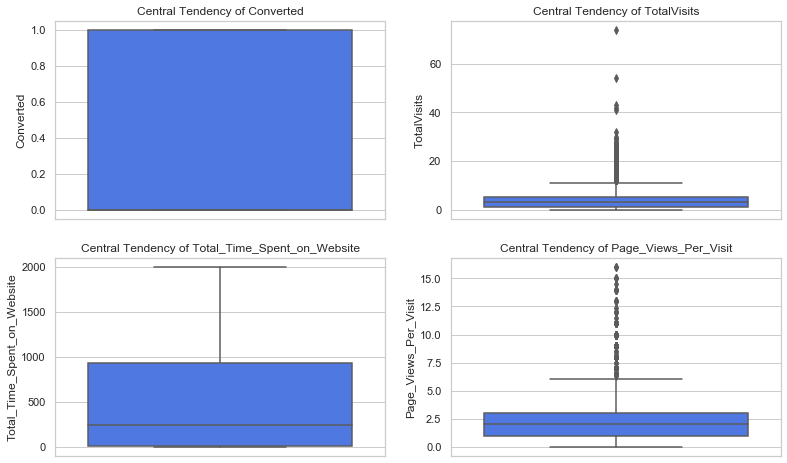

In [233]:
# m_box_plt is local function which takes a df, rows, columns of subplot and name of columns as an argument and 
# plots box plots
# Part-1
m_box_plt(df,2,2,*list(num_cols[1:5]))

# Treating Missing Values

In [234]:
# Percentage of Null columns across each Columns
(round(100*(df.isnull().sum()/len(df)),2)[100*(df.isnull().sum()/len(df))>0]).sort_values(ascending=False)

How_did_you_hear_about_X_Education               78.42
Lead_Profile                                     74.24
Lead_Quality                                     51.74
Asymmetrique_Profile_Score                       45.73
Asymmetrique_Profile_Index                       45.73
Asymmetrique_Activity_Index                      45.73
Asymmetrique_Activity_Score                      45.73
City                                             40.33
Specialization                                   37.15
Tags                                             36.36
What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.12
Country                                          27.12
Page_Views_Per_Visit                              1.49
TotalVisits                                       1.49
Last_Activity                                     1.12
Lead_Source                                       0.39
dtype: float64

### Imputing Lead Source

In [235]:
#counting Nulls
df['Lead_Source'].isna().sum()

35

In [236]:
# Taking Value Counts of Lead Source for each of the value of Lead Origin. 
Lead_Origin = ['API','Landing Page Submission','Lead Add Form','Lead Import','Quick Add Form']
for each in Lead_Origin:
    print(each)
    print(df[df['Lead_Origin']==each]['Lead_Source'].value_counts())
    print('*'*50)

API
Olark Chat        1751
Google            1147
Organic Search     454
Direct Traffic     109
Referral Sites      98
Social Media         1
Name: Lead_Source, dtype: int64
**************************************************
Landing Page Submission
Direct Traffic       2325
Google               1691
Organic Search        683
Referral Sites         26
Press_Release           2
blog                    1
welearnblog_Home        1
youtubechannel          1
testone                 1
Social Media            1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
Name: Lead_Source, dtype: int64
**************************************************
Lead Add Form
Reference           532
Welingak Website    142
Click2call            4
Olark Chat            2
Live Chat             2
Google                1
Name: Lead_Source, dtype: int64
**************************************************
Lead Import
Social Media    54
Name: Lead_Source, dtype: int64
**************************

In [237]:
# Checking sum of nulls for Lead Source against each value of Lead Origin
Lead_Origin = ['API','Landing Page Submission','Lead Add Form','Lead Import']
for each in Lead_Origin:
    print(each)
    print(df[df['Lead_Origin']==each]['Lead_Source'].isna().sum())
    print('*'*50)

API
0
**************************************************
Landing Page Submission
1
**************************************************
Lead Add Form
33
**************************************************
Lead Import
1
**************************************************


API


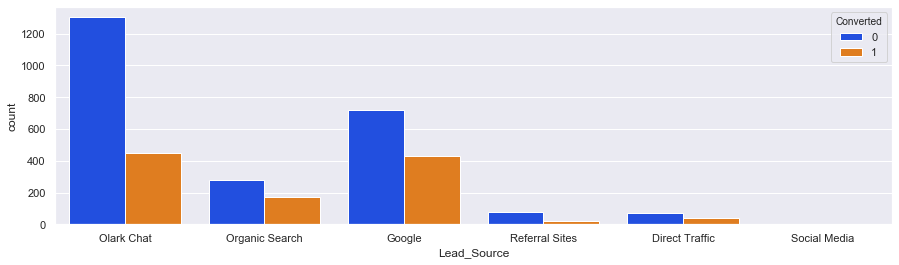

Landing Page Submission


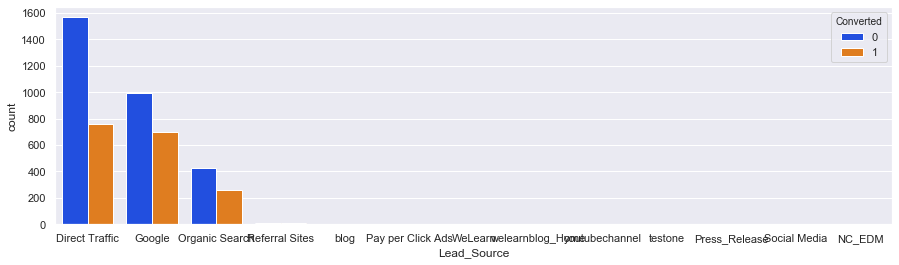

Lead Add Form


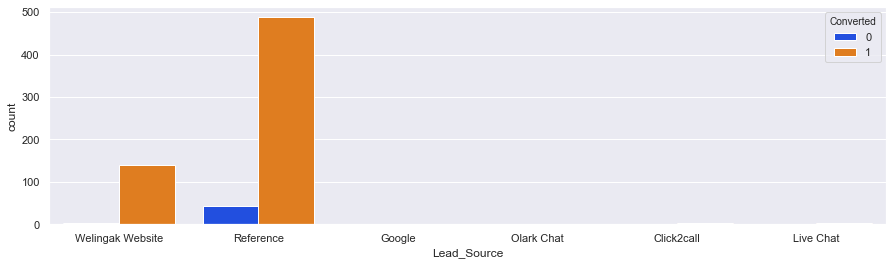

Lead Import


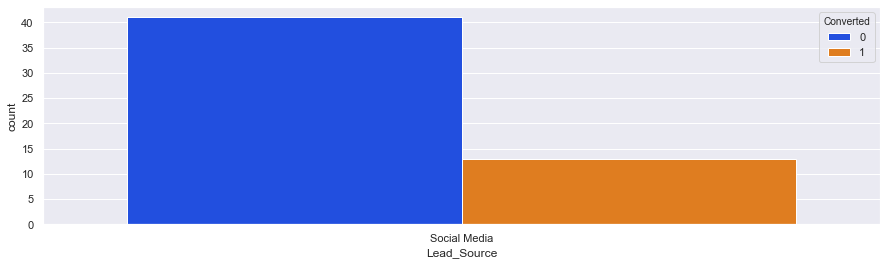

In [238]:
# Doing a segmented countplot of each value of Lead Origin
Lead_Origin = ['API','Landing Page Submission','Lead Add Form','Lead Import']
sns.set(font_scale=1,palette='bright')
for each in Lead_Origin:
    print(each)
    figure(num=None, figsize=(15, 4), facecolor='w', edgecolor='k')
    sns.countplot(df[df['Lead_Origin']==each]['Lead_Source'],hue ='Converted',data=df)
    plt.show()

In [239]:
# Imputing the segmented modes
idx = df[df['Lead_Origin']=='Lead Import'][df[df['Lead_Origin']=='Lead Import']['Lead_Source'].isnull()].index.tolist()
for each in idx:
    df['Lead_Source'][each] = 'Social Media'

idx = df[df['Lead_Origin']=='Lead Add Form'][df[df['Lead_Origin']=='Lead Add Form']['Lead_Source'].isnull()].index.tolist()
for each in idx:
    df['Lead_Source'][each] = 'Reference'
    
idx = df[df['Lead_Origin']=='Landing Page Submission'][df[df['Lead_Origin']=='Landing Page Submission']['Lead_Source'].isnull()].index.tolist()
for each in idx:
    df['Lead_Source'][each] = 'Direct Traffic'

df['Lead_Source'].isna().sum()

0

### Imputing Last Activity

In [240]:
# Counting Nulls
df['Last_Activity'].isna().sum()

102

In [241]:
df['Last_Activity'].value_counts()

Email Opened                    3373
SMS Sent                        2696
Olark Chat Conversation          969
Page Visited on Website          618
Converted to Lead                418
Email Bounced                    315
Email Link Clicked               263
Form Submitted on Website        112
Unreachable                       91
Unsubscribed                      60
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  1
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

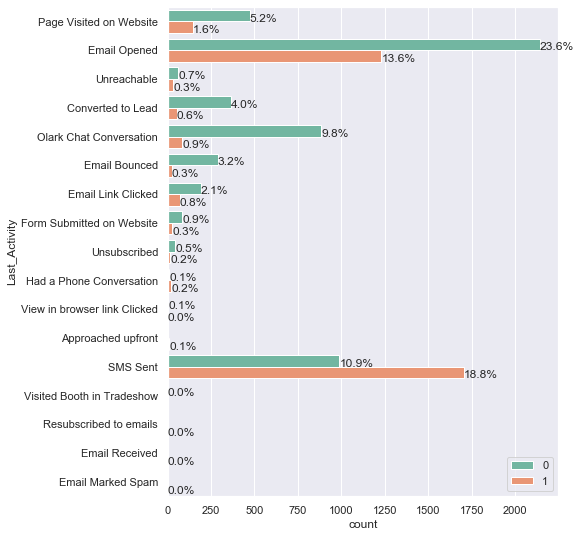

In [242]:
# Visualize the conversion rate
plt.figure(1,figsize=(7,9))
sns.set(font_scale=1,palette='Set2')
ax = sns.countplot(y=df["Last_Activity"],hue=df.Converted,data=df)
total = len(df["Last_Activity"])
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y)) 
plt.legend(loc=4) 
plt.show()

In [243]:
dff = df[df["Last_Activity"].isnull()]
dff['Converted'].value_counts()

1    80
0    22
Name: Converted, dtype: int64

In [244]:
#Counting Value Counts of Last Activity when Lead Origin is Lead Add Form
dff = df[df["Lead_Origin"]=="Lead Add Form"]
dff['Last_Activity'].value_counts()

SMS Sent                     332
Email Opened                 215
Email Link Clicked            23
Page Visited on Website       19
Email Bounced                 12
Unreachable                    6
Had a Phone Conversation       6
Olark Chat Conversation        5
Approached upfront             4
Form Submitted on Website      4
Unsubscribed                   3
Email Marked Spam              1
Name: Last_Activity, dtype: int64

In [245]:
#Counting Value Counts of Last Activity when Lead Origin is Lead Import
dff = df[df["Lead_Origin"]=="Lead Import"]
dff['Last_Activity'].value_counts()

Email Opened     25
SMS Sent         12
Email Bounced     2
Name: Last_Activity, dtype: int64

In [246]:
# Imputing with Segmented Mode
dff = df[df["Lead_Origin"]=="Lead Add Form"]
idx = dff[dff['Last_Activity'].isnull()].index.tolist()
for each in idx:
    df['Last_Activity'][each] = 'SMS Sent'

dff = df[df["Lead_Origin"]=="Lead Import"]
idx = dff[dff['Last_Activity'].isnull()].index.tolist()
for each in idx:
    df['Last_Activity'][each] = 'Email Opened'

In [247]:
# Inspect if there are any nulls
print(df['Last_Activity'].isna().sum())

0


### Page Views Per Visit

In [248]:
# Inspect the column for missing values
df['Page_Views_Per_Visit'] = round(df['Page_Views_Per_Visit'],0)
df['Page_Views_Per_Visit'].value_counts(dropna=False)

2.0     2512
0.0     2189
3.0     1293
4.0     1053
1.0      760
5.0      513
6.0      274
NaN      135
7.0      133
8.0       88
9.0       45
10.0      24
11.0      18
14.0      10
12.0       7
13.0       6
15.0       4
16.0       3
Name: Page_Views_Per_Visit, dtype: int64

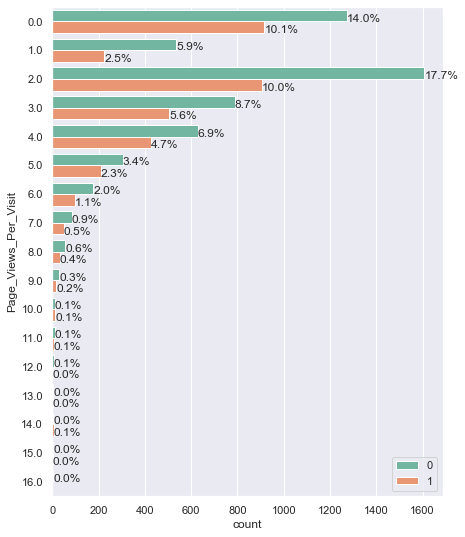

In [249]:
# Visualize the conversion rate
plt.figure(1,figsize=(7,9))
sns.set(font_scale=1,palette='Set2')
ax = sns.countplot(y=df["Page_Views_Per_Visit"],hue=df.Converted,data=df)
total = len(df["Page_Views_Per_Visit"])
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y)) 
plt.legend(loc=4) 
plt.show()

In [250]:
dff = df[df['Page_Views_Per_Visit'].isnull()]
dff['Lead_Origin'].value_counts()

Lead Add Form    109
Lead Import       24
API                2
Name: Lead_Origin, dtype: int64

In [251]:
dff['Converted'].value_counts()

1    98
0    37
Name: Converted, dtype: int64

In [252]:
#Finding the mean/median value for 'Page_Views_Per_Visit' when ['Lead_Origin']=='Lead Add Form' 
#and ['Total_Time_Spent_on_Website']!=0
df[df['Lead_Origin']=='Lead Add Form'][df['Total_Time_Spent_on_Website']!=0]['Page_Views_Per_Visit'].describe()

count    50.000000
mean      1.720000
std       1.229568
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       7.000000
Name: Page_Views_Per_Visit, dtype: float64

In [253]:
# The mean is 1.7 pages, which can be rounded off as 2. Anyway the difference between median and Q3 is not much
# Hence imputing with 2
dff = df[df['Lead_Origin']=='Lead Add Form'][df['Total_Time_Spent_on_Website']!=0]
idx = df[df['Page_Views_Per_Visit'].isnull()].index.tolist()
for each in idx:
    df['Page_Views_Per_Visit'][each] = 2
print(df['Page_Views_Per_Visit'].isnull().sum())

0


### Total Visits

In [254]:
# Inspect the column for missing values
df['TotalVisits'].value_counts(dropna=False)

0.0     2189
2.0     1638
3.0     1273
4.0     1098
5.0      765
6.0      451
1.0      384
7.0      302
8.0      219
9.0      161
NaN      135
10.0     111
11.0      84
13.0      48
12.0      44
14.0      36
16.0      20
15.0      18
17.0      15
18.0      14
20.0      12
19.0       9
21.0       6
23.0       6
25.0       5
24.0       4
27.0       4
22.0       3
28.0       2
29.0       2
26.0       2
42.0       1
32.0       1
43.0       1
54.0       1
30.0       1
74.0       1
41.0       1
Name: TotalVisits, dtype: int64

In [255]:
dff = df[df['TotalVisits'].isnull()]
dff['Lead_Origin'].value_counts()

Lead Add Form    109
Lead Import       24
API                2
Name: Lead_Origin, dtype: int64

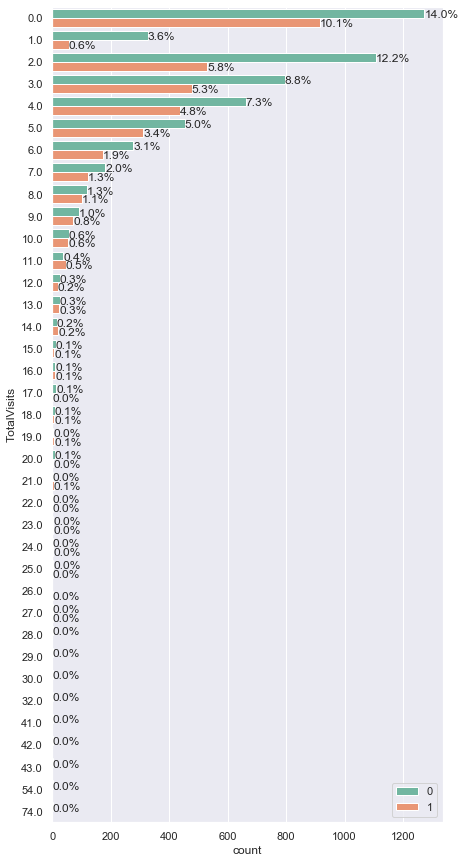

In [256]:
# Visualize the conversion rate
plt.figure(1,figsize=(7,15))
sns.set(font_scale=1,palette='Set2')
ax = sns.countplot(y=df["TotalVisits"],hue=df.Converted,data=df)
total = len(df["TotalVisits"])
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y)) 
plt.legend(loc=4) 
plt.show()


In [257]:
dff['Converted'].value_counts()

1    98
0    37
Name: Converted, dtype: int64

In [258]:
#Finding the mean/median value for 'TotalVisits' when ['Lead_Origin']=='Lead Add Form' 
#and ['Total_Time_Spent_on_Website']!=0
df[df['Lead_Origin']=='Lead Add Form'][df['Total_Time_Spent_on_Website']!=0]['TotalVisits'].describe()

count    50.000000
mean      3.500000
std       4.777712
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      27.000000
Name: TotalVisits, dtype: float64

In [259]:
# The mean is 3.5 pages, which can be rounded off as 3. As the median is 2.
# Hence imputing with 3
idx = df[df['TotalVisits'].isnull()].index.tolist()
for each in idx:
    df['TotalVisits'][each] = 3
print(df['TotalVisits'].isnull().sum())

0


### Imputing Tags

In [260]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3297
Will revert after reading the email                  2038
Ringing                                              1180
Interested in other courses                           506
Already a student                                     453
Closed by Horizzon                                    352
switched off                                          231
Busy                                                  184
Lost to EINS                                          174
Not doing further education                           140
Interested  in full time MBA                          117
Graduation in progress                                110
invalid number                                         76
Diploma holder (Not Eligible)                          61
wrong number given                                     44
opp hangup                                             33
number not provided                                    25
in touch with 

In [261]:
# Inspect the null values
df['Tags'].isnull().sum()

3297

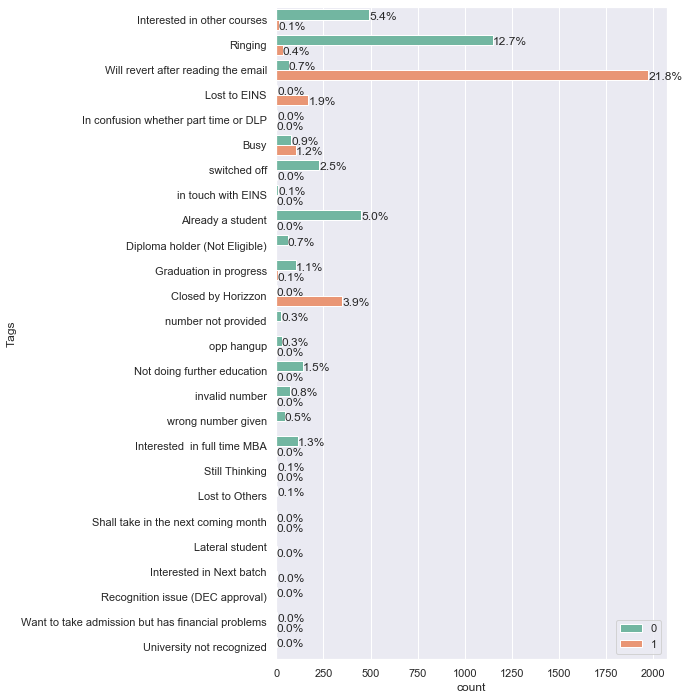

In [262]:
# Visualize the conversion rate
plt.figure(1,figsize=(7,12))
sns.set(font_scale=1,palette='Set2')
ax = sns.countplot(y=df["Tags"],hue=df.Converted,data=df)
total = len(df["Tags"])
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y)) 
plt.legend(loc=4) 
plt.show()

In [263]:
print(df[df['Converted']==0]['Tags'].value_counts()[:5])
print()
print(df[df['Converted']==1]['Tags'].value_counts()[:5])

Ringing                        1147
Interested in other courses     494
Already a student               450
switched off                    227
Not doing further education     139
Name: Tags, dtype: int64

Will revert after reading the email    1973
Closed by Horizzon                      350
Lost to EINS                            170
Busy                                    105
Ringing                                  33
Name: Tags, dtype: int64


In [264]:
# The mode for COnverted as 0 is 'Ringing' while for 1 is 'Will revert after reading the email'. Imputing the same.
dff = df[df['Converted']==0]
idx = dff[dff['Tags'].isnull()]['Tags'].index.tolist()
for each in idx:
    df['Tags'][each]= 'Ringing'
    
dff = df[df['Converted']==1]
idx = dff[dff['Tags'].isnull()]['Tags'].index.tolist()
for each in idx:
    df['Tags'][each]= 'Will revert after reading the email'
df['Tags'].isnull().sum()

0

### Imputing Specialization

In [265]:
df['Specialization'].isnull().sum()

3368

In [266]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3368
Finance Management                    952
Human Resource Management             823
Marketing Management                  817
Operations Management                 486
Business Administration               392
IT Projects Management                353
Banking, Investment And Insurance     334
Supply Chain Management               333
Media and Advertising                 201
Travel and Tourism                    197
International Business                171
Healthcare Management                 155
Hospitality Management                113
E-COMMERCE                            108
Retail Management                      98
Rural and Agribusiness                 72
E-Business                             55
Services Excellence                    39
Name: Specialization, dtype: int64

In [267]:
df[~df.Specialization.isnull()].Converted.value_counts()

0    3158
1    2541
Name: Converted, dtype: int64

In [268]:
df[df.Specialization.isnull()].Converted.value_counts()

0    2402
1     966
Name: Converted, dtype: int64

In [269]:
df.groupby("Converted")["Specialization"].value_counts(dropna=False)

Converted  Specialization                   
0          NaN                                  2402
           Finance Management                    525
           Human Resource Management             440
           Marketing Management                  415
           Operations Management                 256
           Business Administration               218
           IT Projects Management                216
           Supply Chain Management               187
           Banking, Investment And Insurance     168
           Travel and Tourism                    126
           Media and Advertising                 116
           International Business                110
           Healthcare Management                  77
           E-COMMERCE                             70
           Hospitality Management                 66
           Retail Management                      64
           Rural and Agribusiness                 41
           E-Business                             35
 

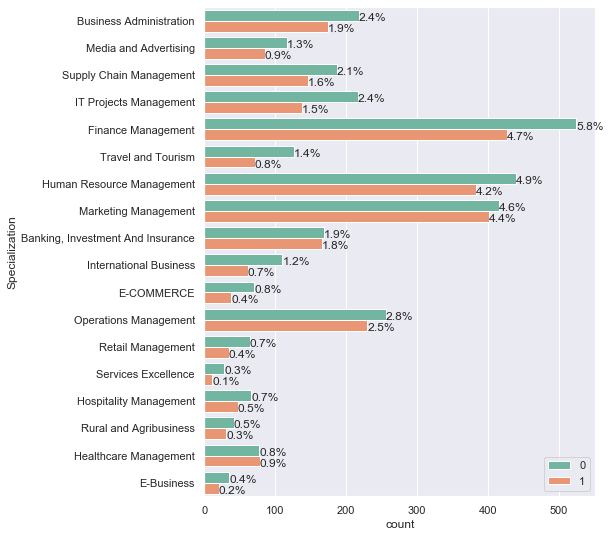

In [270]:
plt.figure(1,figsize=(7,9))
sns.set(font_scale=1,palette='Set2')
ax = sns.countplot(y=df["Specialization"],hue=df.Converted,data=df)
total = len(df["Specialization"])
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y)) 
plt.legend(loc=4) 
plt.show()

In [271]:
df["Specialization"] = df.Specialization.fillna("Not_Available")
df.Specialization.value_counts(dropna=False)

Not_Available                        3368
Finance Management                    952
Human Resource Management             823
Marketing Management                  817
Operations Management                 486
Business Administration               392
IT Projects Management                353
Banking, Investment And Insurance     334
Supply Chain Management               333
Media and Advertising                 201
Travel and Tourism                    197
International Business                171
Healthcare Management                 155
Hospitality Management                113
E-COMMERCE                            108
Retail Management                      98
Rural and Agribusiness                 72
E-Business                             55
Services Excellence                    39
Name: Specialization, dtype: int64

In [272]:
df['Specialization'].isnull().sum()

0

### Imputing What_is_your_current_occupation

In [273]:
df['What_is_your_current_occupation'].isnull().sum()

2640

In [274]:
df['What_is_your_current_occupation'].value_counts(dropna=False)

Unemployed              5493
NaN                     2640
Working Professional     692
Student                  209
Other                     16
Housewife                  9
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [275]:
df[~df.What_is_your_current_occupation.isnull()].Converted.value_counts()

0    3282
1    3145
Name: Converted, dtype: int64

In [276]:
df[df.What_is_your_current_occupation.isnull()].Converted.value_counts()

0    2278
1     362
Name: Converted, dtype: int64

In [277]:
df.groupby("Converted")["What_is_your_current_occupation"].value_counts(dropna=False)

Converted  What_is_your_current_occupation
0          Unemployed                         3084
           NaN                                2278
           Student                             131
           Working Professional                 58
           Other                                 6
           Businessman                           3
1          Unemployed                         2409
           Working Professional                634
           NaN                                 362
           Student                              78
           Other                                10
           Housewife                             9
           Businessman                           5
Name: What_is_your_current_occupation, dtype: int64

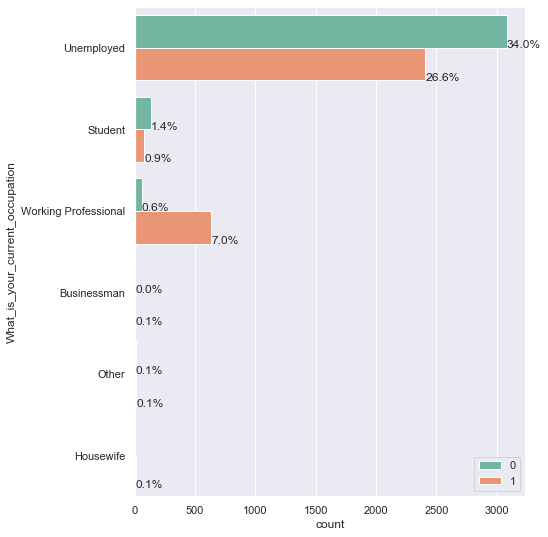

In [278]:

plt.figure(1,figsize=(7,9))
sns.set(font_scale=1,palette='Set2')
ax = sns.countplot(y=df["What_is_your_current_occupation"],hue=df.Converted,data=df)
total = len(df["What_is_your_current_occupation"])
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y)) 
plt.legend(loc=4) 
plt.show()


In [279]:
df["What_is_your_current_occupation"] = df.What_is_your_current_occupation.fillna("Unemployed")
df.What_is_your_current_occupation.value_counts(dropna=False)

Unemployed              8133
Working Professional     692
Student                  209
Other                     16
Housewife                  9
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [280]:
df['What_is_your_current_occupation'].isnull().sum()

0

## Removing Columns

In [281]:
(round(100*((df.isnull().sum()+(df=='Select').sum())/len(df)),2)[100*(df.isnull().sum()/len(df))>0]).sort_values(ascending=False)

How_did_you_hear_about_X_Education               78.42
Lead_Profile                                     74.24
Lead_Quality                                     51.74
Asymmetrique_Profile_Score                       45.73
Asymmetrique_Activity_Score                      45.73
Asymmetrique_Profile_Index                       45.73
Asymmetrique_Activity_Index                      45.73
City                                             40.33
What_matters_most_to_you_in_choosing_a_course    29.32
Country                                          27.12
dtype: float64

- We are dropping all the columns that have more than 40% nulls.
- Other than that we are dropping all the columns for which there is no or very low variance in data values. We have already identified such columns post EDA - Vizualisation of our plots.
- We are also dropping the columns for which we do not see any major impact on the Conversion. For example City, Specialization etc as identified above post EDA. 

In [282]:
# Create a list of columns to be dropped
drop_col = ['Prospect_ID','Do_Not_Call','What_matters_most_to_you_in_choosing_a_course','Magazine','Newspaper_Article','X_Education_Forums',
'Newspaper','Digital_Advertisement','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content',
'Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','How_did_you_hear_about_X_Education','Lead_Profile',
'Lead_Quality','Asymmetrique_Profile_Index','Asymmetrique_Activity_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score',
'City','A_free_copy_of_Mastering_The_Interview','Country','Specialization']

In [283]:
# Drop the columns
df.drop(drop_col,axis = 1, inplace = True)
df.shape

(9067, 14)

## Post Clean up

In [284]:
# explore the head of the DF
df.head(3)

Lead_Number              Lead_Origin     Lead_Source Do_Not_Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   

   Converted  TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.0   
2          1          2.0                         1532                   2.0   

             Last_Activity What_is_your_current_occupation Search  \
0  Page Visited on Website                      Unemployed     No   
1             Email Opened                      Unemployed     No   
2             Email Opened                         Student     No   

  Through_Recommendations                                 Tags  \
0                      No          Interested in other courses   
1                      No                              Ringing   
2                      No  Will revert after reading the email   

  Last_Notable_Activity  
0              Modified  
1          Email Opened  
2          Email Opened

### % of Lead Conversion

In [285]:
100*(sum(df['Converted'] == 1)/len(df['Converted']))

38.678725046873275

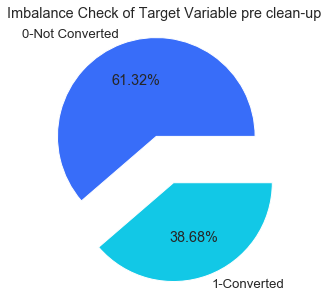

In [286]:
# plot Lead conversion variable Non conversion
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2,palette='rainbow')
explode = (0.5,0.0)
labels = '0-Not Converted', '1-Converted'
plt.pie(df['Converted'].value_counts(),autopct='%1.2f%%',explode=explode,labels=labels)
plt.title("Imbalance Check of Target Variable pre clean-up")
plt.axis('equal')
plt.show()

__Inferences__
1. The available data is distributed 62% for not converted records and 39% converted records

In [287]:
# Check if there are any nulls across the DF
df.isnull().sum()

Lead_Number                        0
Lead_Origin                        0
Lead_Source                        0
Do_Not_Email                       0
Converted                          0
TotalVisits                        0
Total_Time_Spent_on_Website        0
Page_Views_Per_Visit               0
Last_Activity                      0
What_is_your_current_occupation    0
Search                             0
Through_Recommendations            0
Tags                               0
Last_Notable_Activity              0
dtype: int64

In [288]:
df_ = df

# Creating Dummy variables

In [289]:
# Binary encoding of the columns
df['Search']=df['Search'].map({"Yes":1,"No":0})
df['Through_Recommendations']=df['Through_Recommendations'].map({"Yes":1,"No":0})

In [290]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_cols = ['Lead_Origin','Lead_Source','Do_Not_Email','Last_Activity','What_is_your_current_occupation','Tags','Last_Notable_Activity']
for each in dummy_cols:
    dummy1 = pd.get_dummies(df[each], drop_first=True,prefix=each)
    df = df.drop(each, 1)
    df = pd.concat([df, dummy1], axis=1)

In [291]:
# Inspect the DF
print(df.shape)
display(df.head())

(9067, 89)


Lead_Number  Converted  TotalVisits  Total_Time_Spent_on_Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page_Views_Per_Visit  Search  Through_Recommendations  \
0                   0.0       0                        0   
1                   2.0       0                        0   
2                   2.0       0                        0   
3                   1.0       0                        0   
4                   1.0       0                        0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Direct Traffic  Lead_Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           1                   0   
3                        0                           1                   0   
4                        0                           0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead_Source_Referral Sites  Lead_Source_Social Media  Lead_Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_blog  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Lead_Source_welearnblog_Home  Lead_Source_youtubechannel  Do_Not_Email_Yes  \
0                             0                           0                 0   
1                             0                           0                 0   
2            

# Train-Test-Split

In [292]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X1 = df.drop(['Converted'], axis=1)
X.head()

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
0       660737          0.0                            0   
1       660728          5.0                          674   
2       660727          2.0                         1532   
3       660719          1.0                          305   
4       660681          2.0                         1428   

   Page_Views_Per_Visit  Search  Through_Recommendations  \
0                   0.0       0                        0   
1                   2.0       0                        0   
2                   2.0       0                        0   
3                   1.0       0                        0   
4                   1.0       0                        0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Direct Traffic  Lead_Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           1                   0   
3                        0                           1                   0   
4                        0                           0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead_Source_Referral Sites  Lead_Source_Social Media  Lead_Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_blog  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Lead_Source_welearnblog_Home  Lead_Source_youtubechannel  Do_Not_Email_Yes  \
0                             0                           0                 0   
1                             0                           0                 0   
2                             0                           0                 0  

In [293]:
# Putting response variable to y
y = df['Converted']
y1 = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [294]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7, test_size=0.3, random_state=100)

In [295]:
# Removing Lead Number from both Train and test data sets and storing them separately
Lead_Number_Train = X_train['Lead_Number'].tolist()
Lead_Number_Test = X_test['Lead_Number'].tolist()
Lead_Number_Train_1 = X1_train['Lead_Number'].tolist()
Lead_Number_Test_1 = X1_test['Lead_Number'].tolist()
X_train.drop(['Lead_Number'],1,inplace = True)
X_test.drop(['Lead_Number'],1,inplace = True)
X1_train.drop(['Lead_Number'],1,inplace = True)
X1_test.drop('Lead_Number',1,inplace = True)

# Feature Scaling - Data Standardization

In [296]:
# Scaling the data using Standardscaler()
scaler = StandardScaler()

# Fit and Transform Train data
X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])
X1_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X1_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X1_train.head()

TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
2140    -0.938685                    -0.890440             -1.136732       0   
7001    -0.938685                    -0.890440             -1.136732       0   
6850     1.577722                     0.100890              3.234913       0   
4017    -0.379483                     1.655810             -0.650993       0   
7392     2.696126                    -0.112062              0.806221       0   

      Through_Recommendations  Lead_Origin_Landing Page Submission  \
2140                        0                                    0   
7001                        0                                    0   
6850                        0                                    1   
4017                        0                                    0   
7392                        0                                    0   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
2140                          1                        0   
7001                          0                        0   
6850                          0                        0   
4017                          0                        0   
7392                          0                        0   

      Lead_Source_Direct Traffic  Lead_Source_Google  Lead_Source_Live Chat  \
2140                           0                   0                      0   
7001                           0                   0                      0   
6850                           0                   0                      0   
4017                           0                   1                      0   
7392                           0                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
2140                   0                       0                           0   
7001                   0                       1                           0   
6850                   0                       0                           1   
4017                   0                       0                           0   
7392                   0                       0                           1   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
2140                              0                          0   
7001                              0                          0   
6850                              0                          0   
4017                              0                          0   
7392                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
2140                      1                           0   
7001                      0                           0   
6850                      0                           0   
4017                      0                           0   
7392                      0                           0   

      Lead_Source_Social Media  Lead_Source_WeLearn  \
2140                         0                    0   
7001                         0                    0   
6850                         0                    0   
4017                         0                    0   
7392                         0                    0   

      Lead_Source_Welingak Website  Lead_Source_blog  Lead_Source_testone  \
2140                             0                 0                    0   
7001                             0                 0                    0   
6850                             0                 0                    0   
4017                             0                 0                    0   
7392                             0                 0                    0   

      Lead_Source_welearnblog_Home  Lead_Source_youtubechannel  \
2140                             0                           0   
7001                             0                           0   
6850                             0         

In [297]:
#  Transform test data
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])
X1_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X1_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

# Analysing Correlation

## Correlation in the entire data

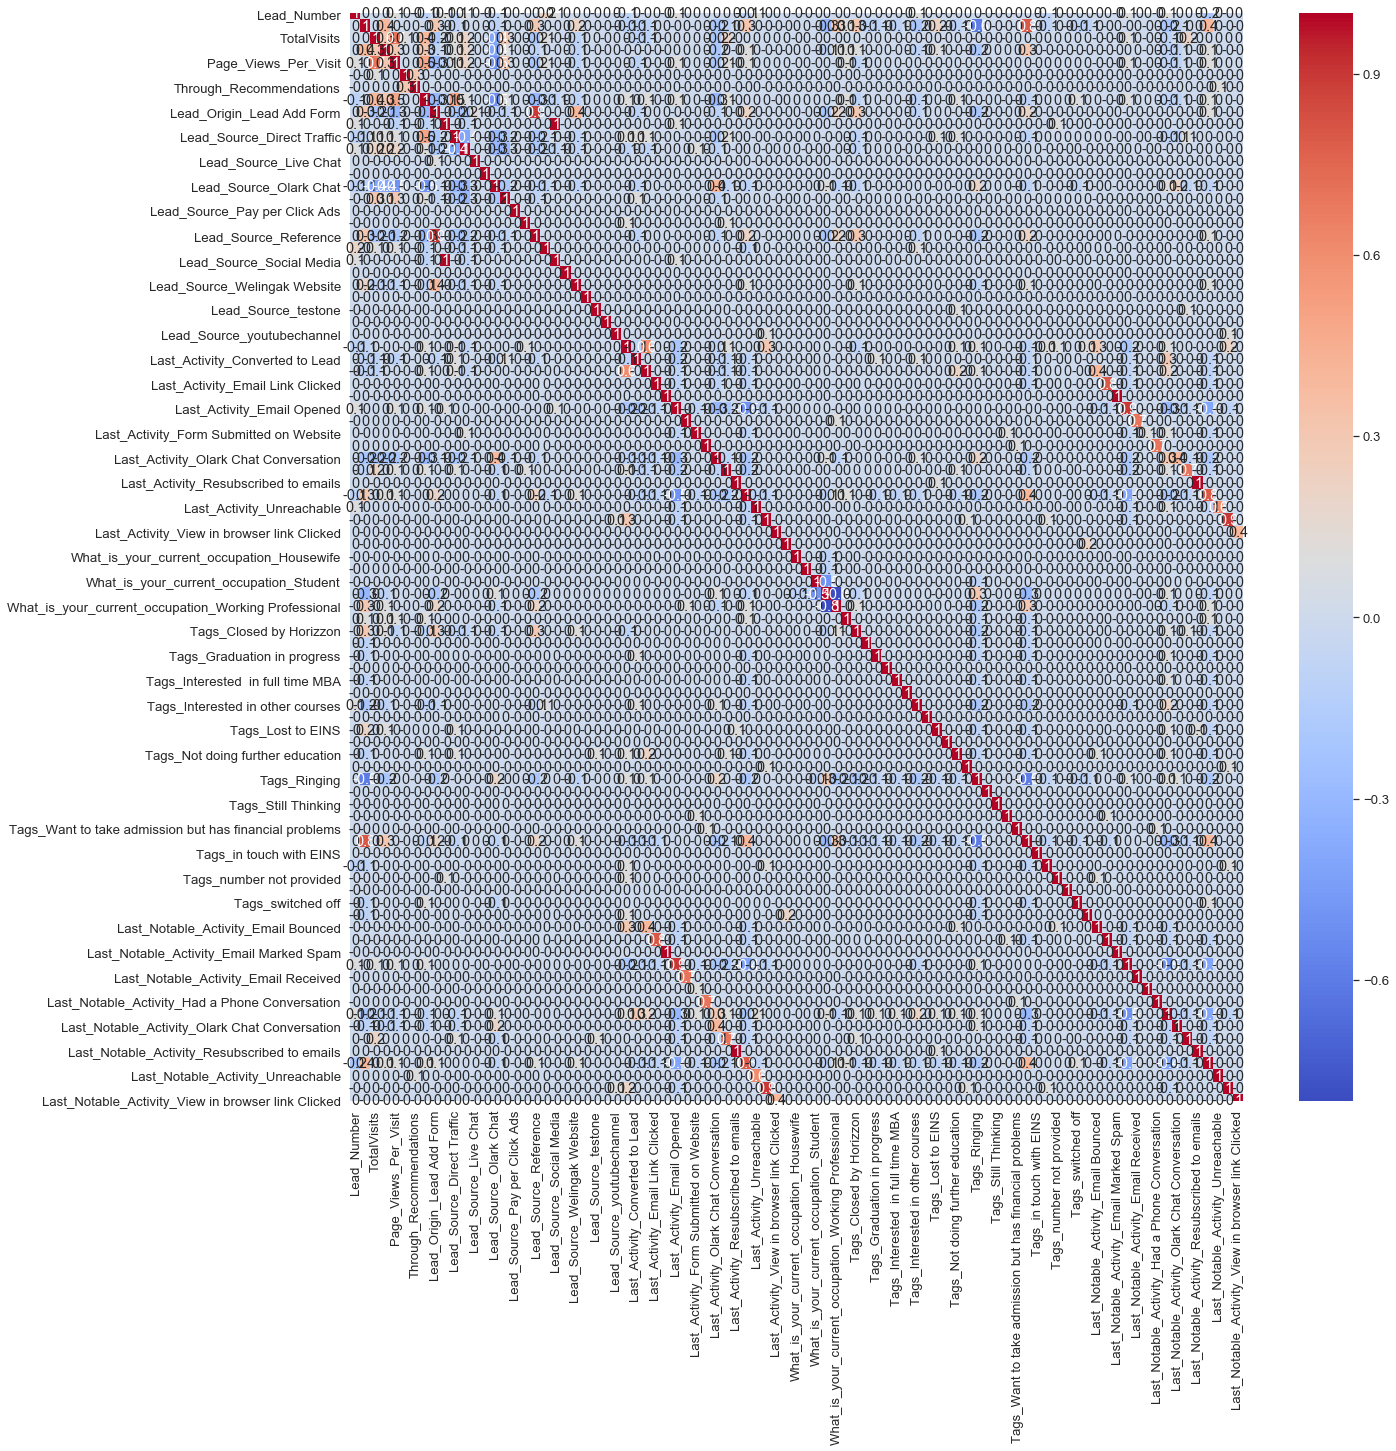

In [298]:
# correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df.corr().round(decimals =1),annot = True, cmap='coolwarm')
plt.show()

## Plotting top 30 highly positively and negative correlations

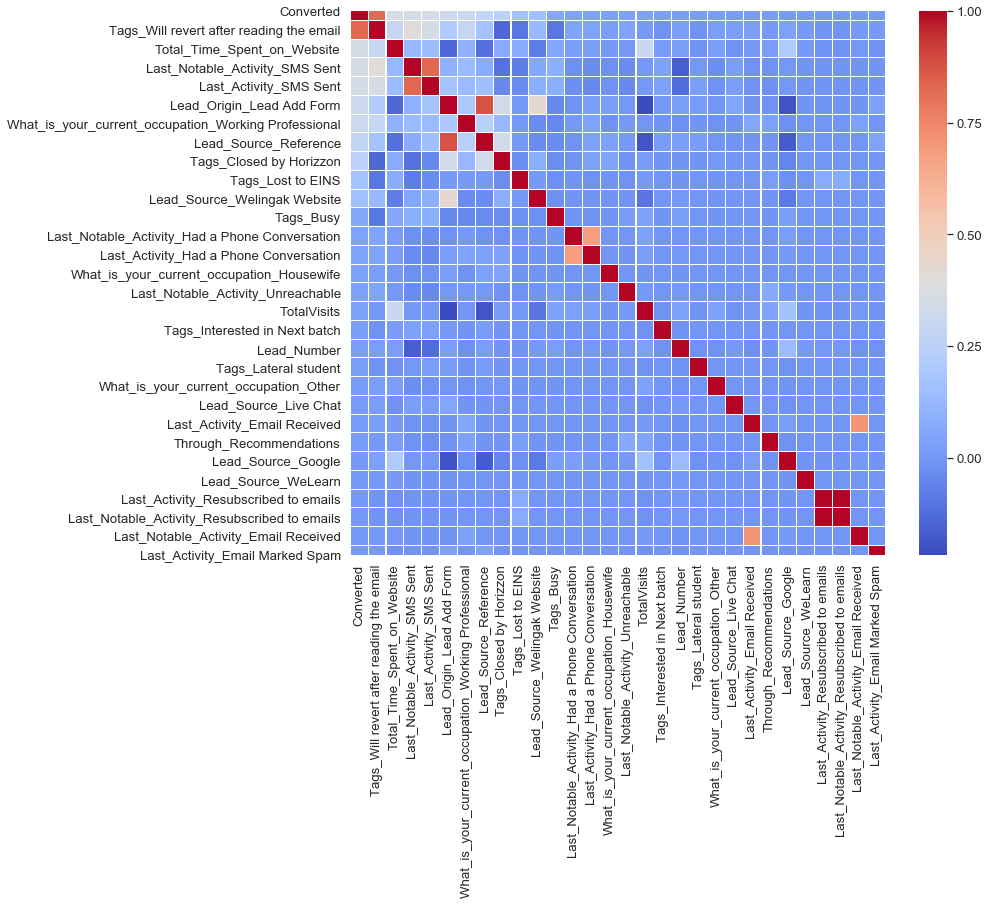

In [299]:
corrmat = df.corr()
k = 30
cols = corrmat.nlargest(k, 'Converted')['Converted'].index 
cm = np.corrcoef(df[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(cm, ax = ax, cmap ="coolwarm", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values)

The top 5 highly positively correlated with Conversion are -
- Tags_Will revert after reading the email
- Total_Time_Spent_on_Website
- Last_Notable_Activity_SMS Sent
- Last_Activity_SMS Sent
- Lead_Origin_Lead Add Form

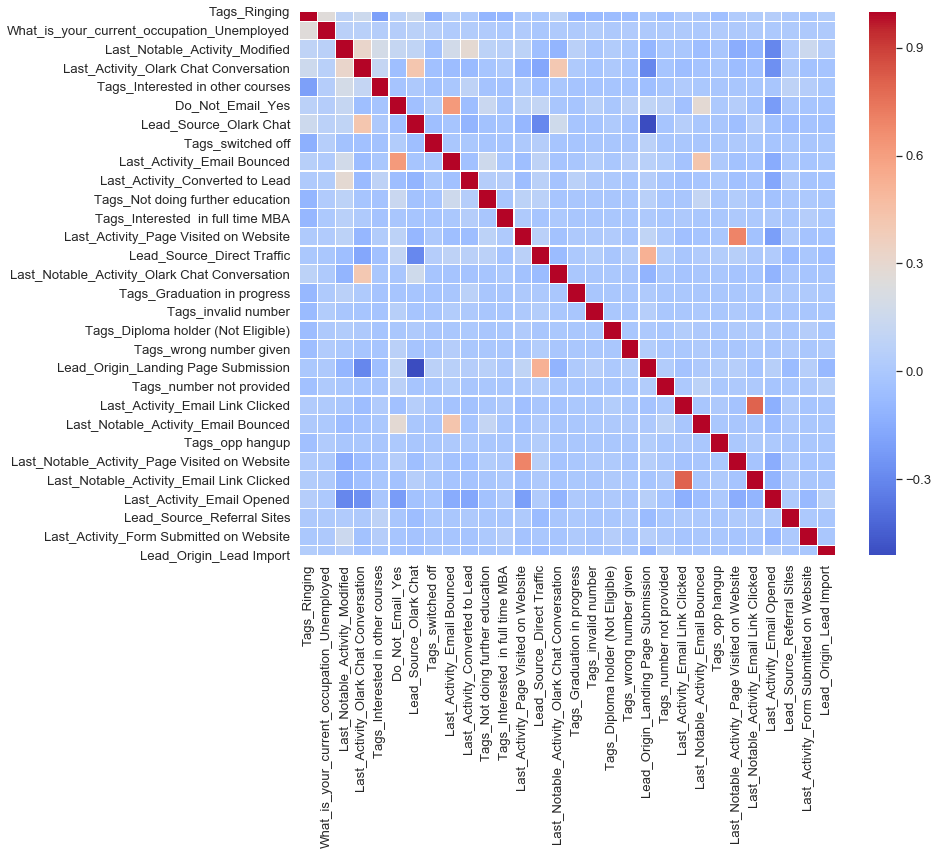

In [300]:
corrmat = df.corr()
k = 30 
cols = corrmat.nsmallest(k, 'Converted')['Converted'].index 
cm = np.corrcoef(df[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(cm, ax = ax, cmap ="coolwarm", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

The top 5 highly negatively correlated with Conversion are -
- Tags_Ringing
- What_is_your_current_occupation_Unemployed
- Last_Notable_Activity_Modified
- Last_Activity_Olark Chat Conversation
- Tags_Interested in other courses

# Model 1 - Logistic Regression using RFE

## Model Building

In [301]:
#VIF computation function
def vif_calc(l_df):
    vif = pd.DataFrame()
    vif['Features'] = l_df.columns
    vif['VIF'] = [variance_inflation_factor(l_df.values, i) for i in range(l_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
    display(vif)

In [302]:
# Running RFE with the output number of the variable equal to 22
log_rfe = LogisticRegression()

rfe = RFE(log_rfe, 22)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [303]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 31),
 ('Total_Time_Spent_on_Website', False, 2),
 ('Page_Views_Per_Visit', False, 33),
 ('Search', False, 58),
 ('Through_Recommendations', False, 48),
 ('Lead_Origin_Landing Page Submission', False, 32),
 ('Lead_Origin_Lead Add Form', False, 14),
 ('Lead_Origin_Lead Import', False, 39),
 ('Lead_Source_Direct Traffic', False, 3),
 ('Lead_Source_Google', False, 4),
 ('Lead_Source_Live Chat', False, 54),
 ('Lead_Source_NC_EDM', False, 55),
 ('Lead_Source_Olark Chat', False, 28),
 ('Lead_Source_Organic Search', False, 5),
 ('Lead_Source_Pay per Click Ads', False, 64),
 ('Lead_Source_Press_Release', False, 49),
 ('Lead_Source_Reference', False, 22),
 ('Lead_Source_Referral Sites', False, 23),
 ('Lead_Source_Social Media', False, 34),
 ('Lead_Source_WeLearn', False, 62),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_blog', False, 52),
 ('Lead_Source_testone', False, 63),
 ('Lead_Source_welearnblog_Home', False, 60),
 ('Lead_Source_youtubechannel', False,

In [304]:
# 22 most useful features
col = X_train.columns[rfe.support_].tolist()
col

['Lead_Source_Welingak Website',
 'Do_Not_Email_Yes',
 'Last_Activity_Had a Phone Conversation',
 'Last_Activity_SMS Sent',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Diploma holder (Not Eligible)',
 'Tags_Interested in Next batch',
 'Tags_Interested in other courses',
 'Tags_Lateral student',
 'Tags_Lost to EINS',
 'Tags_Not doing further education',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_in touch with EINS',
 'Tags_invalid number',
 'Tags_number not provided',
 'Tags_switched off',
 'Tags_wrong number given',
 'Last_Notable_Activity_Had a Phone Conversation',
 'Last_Notable_Activity_Modified',
 'Last_Notable_Activity_Olark Chat Conversation']

In [305]:
#Insignificant features
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Search', 'Through_Recommendations',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Live Chat', 'Lead_Source_NC_EDM',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Pay per Click Ads', 'Lead_Source_Press_Release',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Social Media', 'Lead_Source_WeLearn', 'Lead_Source_blog',
       'Lead_Source_testone', 'Lead_Source_welearnblog_Home',
       'Lead_Source_youtubechannel', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Marked Spam', 'Last_Activity_Email Opened',
       'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_O

In [306]:
#Training the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -537.57
Date:                Mon, 18 Nov 2019   Deviance:                       1075.1
Time:                        19:19:40   Pearson chi2:                 6.91e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0309      0.266    -11.381      0.000      -3.553      -2.509
Lead_Source_Welingak Website                       2.2996      1.947      1.181      0.237      -1.516       6.115
Do_Not_Email_Yes                                  -0.8340      0.411     -2.031      0.042      -1.639      -0.029
Last_Activity_Had a Phone Conversation            -2.8211      0.794     -3.551      0.000      -4.378      -1.264
Last_Activity_SMS Sent                             1.5491      0.212      7.321      0.000       1.134       1.964
Tags_Busy                                          2.7365      0.339      8.077      0.000       2.072       3.400
Tags_Closed by Horizzon                            8.7170      0.781     11.167      0.000       7.187      10.247
Tags_Diploma holder (Not Eligible)               -21.0213   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
Tags_Interested in Next batch                     26.3098   6.49e+04      0.000      1.000   -1.27e+05    1.27e+05
Tags_Interested in other courses                   0.0198      0.430      0.046      0.963      -0.823       0.863
Tags_Lateral student                              27.0294   7.44e+04      0.000      1.000   -1.46e+05    1.46e+05
Tags_Lost to EINS                                  7.6128      0.652     11.669      0.000       6.334       8.891
Tags_Not doing further education                  -0.8677      1.046     -0.830      0.407      -2.917       1.182
Tags_Ringing                                      -1.7809      0.341     -5.228      0.000      -2.449      -1.113
Tags_Will revert after reading the email           6.6972      0.304     22.009      0.000       6.101       7.294
Tags_in touch with EINS                            2.6034      1.010      2.579      0.010       0.625       4.582
Tags_invalid number                               -1.3581      1.062     -1.279      0.201      -3.439       0.723
Tags_number not provided                         -21.8183   2.91e+04     -0.001      0.999    -5.7e+04     5.7e+04
Tags_switched off                                 -1.6381      0.656     -2.496      0.013      -2.924      -0.352
Tags_wrong number given                          -21.9819   2.25e+04     -0.001      0.999   -4.41e+04    4.41e+04
Last_Notable_Activity_Had a Phone Conversation    27.9595   3.82e+04      0.001      0.999   -7.48e+04    7.48e+04
Last_Notable_Activity_Modified                    -1.2908      0.207     -6.239      0.000      -1.696      -0.885
Last_Notable_Activity_Olark Chat Conversation     -1.5464      0.823     -1.878      0.060      -3.160       0.068
=============================================================================================

Features   VIF
0           Last_Activity_Had a Phone Conversation  1.82
1   Last_Notable_Activity_Had a Phone Conversation  1.81
2                          Tags_Closed by Horizzon  1.09
3                 Tags_Not doing further education  1.05
4                                Tags_Lost to EINS  1.05
5                                        Tags_Busy  1.05
6                                Tags_switched off  1.04
7                     Lead_Source_Welingak Website  1.04
8    Last_Notable_Activity_Olark Chat Conversation  1.04
9                              Tags_invalid number  1.01
10                        Tags_number not provided  1.01
11              Tags_Diploma holder (Not Eligible)  1.01
12                         Tags_wrong number given  1.01
13                            Tags_Lateral student  1.00
14                   Tags_Interested in Next batch  1.00
15                         Tags_in touch with EINS  1.00
16                                Do_Not_Email_Yes  0.56
17                Tags_Interested in other courses  0.33
18        Tags_Will revert after reading the email  0.17
19                          Last_Activity_SMS Sent  0.15
20                  Last_Notable_Activity_Modified  0.02
21                                    Tags_Ringing  0.00

### Dropping Tags_Lateral student

In [307]:
col.remove('Tags_Lateral student')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -544.56
Date:                Mon, 18 Nov 2019   Deviance:                       1089.1
Time:                        19:19:44   Pearson chi2:                 7.11e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.8988      0.249    -11.661      0.000      -3.386      -2.412
Lead_Source_Welingak Website                       2.2606      1.919      1.178      0.239      -1.501       6.022
Do_Not_Email_Yes                                  -0.8708      0.407     -2.137      0.033      -1.669      -0.072
Last_Activity_Had a Phone Conversation            -2.8319      0.794     -3.566      0.000      -4.388      -1.276
Last_Activity_SMS Sent                             1.6473      0.211      7.814      0.000       1.234       2.061
Tags_Busy                                          2.5341      0.323      7.834      0.000       1.900       3.168
Tags_Closed by Horizzon                            8.5424      0.774     11.039      0.000       7.026      10.059
Tags_Diploma holder (Not Eligible)               -21.1807   2.05e+04     -0.001      0.999   -4.02e+04    4.02e+04
Tags_Interested in Next batch                     26.0939   6.48e+04      0.000      1.000   -1.27e+05    1.27e+05
Tags_Interested in other courses                  -0.1547      0.419     -0.369      0.712      -0.975       0.666
Tags_Lost to EINS                                  7.4371      0.644     11.547      0.000       6.175       8.699
Tags_Not doing further education                  -1.0378      1.041     -0.997      0.319      -3.079       1.003
Tags_Ringing                                      -1.9753      0.326     -6.054      0.000      -2.615      -1.336
Tags_Will revert after reading the email           6.5289      0.287     22.722      0.000       5.966       7.092
Tags_in touch with EINS                            2.4364      1.007      2.418      0.016       0.462       4.411
Tags_invalid number                               -1.5633      1.058     -1.478      0.140      -3.637       0.510
Tags_number not provided                         -22.0078    2.9e+04     -0.001      0.999   -5.68e+04    5.67e+04
Tags_switched off                                 -1.8495      0.649     -2.850      0.004      -3.121      -0.578
Tags_wrong number given                          -22.1889   2.24e+04     -0.001      0.999    -4.4e+04     4.4e+04
Last_Notable_Activity_Had a Phone Conversation    27.8432   3.82e+04      0.001      0.999   -7.49e+04    7.49e+04
Last_Notable_Activity_Modified                    -1.2429      0.204     -6.093      0.000      -1.643      -0.843
Last_Notable_Activity_Olark Chat Conversation     -1.5260      0.814     -1.875      0.061      -3.121       0.069
==================================================================================================================
"""

Features   VIF
0           Last_Activity_Had a Phone Conversation  1.82
1   Last_Notable_Activity_Had a Phone Conversation  1.81
2                          Tags_Closed by Horizzon  1.09
3                 Tags_Not doing further education  1.05
4                                Tags_Lost to EINS  1.05
5                                        Tags_Busy  1.05
6                                Tags_switched off  1.04
7                     Lead_Source_Welingak Website  1.04
8    Last_Notable_Activity_Olark Chat Conversation  1.04
9                              Tags_invalid number  1.01
10                        Tags_number not provided  1.01
11              Tags_Diploma holder (Not Eligible)  1.01
12                         Tags_wrong number given  1.01
13                   Tags_Interested in Next batch  1.00
14                         Tags_in touch with EINS  1.00
15                                Do_Not_Email_Yes  0.56
16                Tags_Interested in other courses  0.33
17        Tags_Will revert after reading the email  0.17
18                          Last_Activity_SMS Sent  0.15
19                  Last_Notable_Activity_Modified  0.02
20                                    Tags_Ringing  0.00

### Dropping Tags_Interested in Next batch

In [308]:
col.remove('Tags_Interested in Next batch')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -550.85
Date:                Mon, 18 Nov 2019   Deviance:                       1101.7
Time:                        19:19:44   Pearson chi2:                 7.45e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.7522      0.231    -11.912      0.000      -3.205      -2.299
Lead_Source_Welingak Website                       2.2359      1.906      1.173      0.241      -1.500       5.972
Do_Not_Email_Yes                                  -0.7673      0.401     -1.915      0.055      -1.553       0.018
Last_Activity_Had a Phone Conversation            -2.7894      0.795     -3.511      0.000      -4.347      -1.232
Last_Activity_SMS Sent                             1.7515      0.210      8.352      0.000       1.340       2.162
Tags_Busy                                          2.3261      0.309      7.528      0.000       1.720       2.932
Tags_Closed by Horizzon                            8.4139      0.768     10.952      0.000       6.908       9.920
Tags_Diploma holder (Not Eligible)               -21.3258   2.05e+04     -0.001      0.999   -4.01e+04    4.01e+04
Tags_Interested in other courses                  -0.3059      0.409     -0.748      0.454      -1.107       0.496
Tags_Lost to EINS                                  7.3131      0.638     11.463      0.000       6.063       8.564
Tags_Not doing further education                  -1.2170      1.038     -1.173      0.241      -3.251       0.817
Tags_Ringing                                      -2.1823      0.312     -6.992      0.000      -2.794      -1.571
Tags_Will revert after reading the email           6.3743      0.272     23.408      0.000       5.841       6.908
Tags_in touch with EINS                            2.2867      1.013      2.257      0.024       0.301       4.272
Tags_invalid number                               -1.7956      1.054     -1.703      0.088      -3.862       0.270
Tags_number not provided                         -22.2590   2.89e+04     -0.001      0.999   -5.66e+04    5.66e+04
Tags_switched off                                 -2.0881      0.641     -3.255      0.001      -3.345      -0.831
Tags_wrong number given                          -22.4257   2.24e+04     -0.001      0.999   -4.39e+04    4.38e+04
Last_Notable_Activity_Had a Phone Conversation    27.6606   3.83e+04      0.001      0.999   -7.51e+04    7.51e+04
Last_Notable_Activity_Modified                    -1.2818      0.202     -6.336      0.000      -1.678      -0.885
Last_Notable_Activity_Olark Chat Conversation     -1.5368      0.806     -1.908      0.056      -3.116       0.042
==================================================================================================================
"""

Features   VIF
0           Last_Activity_Had a Phone Conversation  1.82
1   Last_Notable_Activity_Had a Phone Conversation  1.81
2                          Tags_Closed by Horizzon  1.09
3                                Tags_Lost to EINS  1.05
4                                        Tags_Busy  1.05
5                 Tags_Not doing further education  1.05
6                     Lead_Source_Welingak Website  1.04
7                                Tags_switched off  1.04
8    Last_Notable_Activity_Olark Chat Conversation  1.04
9                              Tags_invalid number  1.01
10                        Tags_number not provided  1.01
11              Tags_Diploma holder (Not Eligible)  1.01
12                         Tags_wrong number given  1.01
13                         Tags_in touch with EINS  1.00
14                                Do_Not_Email_Yes  0.56
15                Tags_Interested in other courses  0.33
16        Tags_Will revert after reading the email  0.17
17                          Last_Activity_SMS Sent  0.15
18                  Last_Notable_Activity_Modified  0.02
19                                    Tags_Ringing  0.00

### Dropping Tags_number not provided

In [309]:
col.remove('Tags_number not provided')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -552.59
Date:                Mon, 18 Nov 2019   Deviance:                       1105.2
Time:                        19:19:46   Pearson chi2:                 7.38e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.8207      0.232    -12.162      0.000      -3.275      -2.366
Lead_Source_Welingak Website                       2.2456      1.912      1.174      0.240      -1.503       5.994
Do_Not_Email_Yes                                  -0.8292      0.391     -2.121      0.034      -1.596      -0.063
Last_Activity_Had a Phone Conversation            -2.8060      0.794     -3.533      0.000      -4.363      -1.249
Last_Activity_SMS Sent                             1.7199      0.208      8.285      0.000       1.313       2.127
Tags_Busy                                          2.4139      0.307      7.869      0.000       1.813       3.015
Tags_Closed by Horizzon                            8.4742      0.769     11.020      0.000       6.967       9.981
Tags_Diploma holder (Not Eligible)               -21.2588   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
Tags_Interested in other courses                  -0.2374      0.409     -0.580      0.562      -1.040       0.565
Tags_Lost to EINS                                  7.3724      0.639     11.542      0.000       6.121       8.624
Tags_Not doing further education                  -1.1341      1.037     -1.093      0.274      -3.167       0.899
Tags_Ringing                                      -2.0945      0.310     -6.757      0.000      -2.702      -1.487
Tags_Will revert after reading the email           6.4449      0.273     23.634      0.000       5.910       6.979
Tags_in touch with EINS                            2.3544      1.010      2.331      0.020       0.375       4.334
Tags_invalid number                               -1.6989      1.053     -1.614      0.107      -3.763       0.365
Tags_switched off                                 -1.9893      0.639     -3.111      0.002      -3.243      -0.736
Tags_wrong number given                          -22.3249   2.24e+04     -0.001      0.999   -4.39e+04    4.38e+04
Last_Notable_Activity_Had a Phone Conversation    27.7429   3.83e+04      0.001      0.999    -7.5e+04     7.5e+04
Last_Notable_Activity_Modified                    -1.2656      0.203     -6.249      0.000      -1.663      -0.869
Last_Notable_Activity_Olark Chat Conversation     -1.5296      0.810     -1.889      0.059      -3.117       0.058
==================================================================================================================
"""

Features   VIF
0           Last_Activity_Had a Phone Conversation  1.82
1   Last_Notable_Activity_Had a Phone Conversation  1.81
2                          Tags_Closed by Horizzon  1.09
3                 Tags_Not doing further education  1.05
4                                Tags_Lost to EINS  1.05
5                                        Tags_Busy  1.05
6                                Tags_switched off  1.04
7                     Lead_Source_Welingak Website  1.04
8    Last_Notable_Activity_Olark Chat Conversation  1.04
9                              Tags_invalid number  1.01
10              Tags_Diploma holder (Not Eligible)  1.01
11                         Tags_wrong number given  1.01
12                         Tags_in touch with EINS  1.00
13                                Do_Not_Email_Yes  0.56
14                Tags_Interested in other courses  0.33
15        Tags_Will revert after reading the email  0.17
16                          Last_Activity_SMS Sent  0.15
17                  Last_Notable_Activity_Modified  0.02
18                                    Tags_Ringing  0.00

### Dropping - Tags_wrong number given

In [310]:
col.remove('Tags_wrong number given')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -555.62
Date:                Mon, 18 Nov 2019   Deviance:                       1111.2
Time:                        19:19:46   Pearson chi2:                 7.19e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.9377      0.234    -12.569      0.000      -3.396      -2.480
Lead_Source_Welingak Website                       2.2573      1.917      1.178      0.239      -1.500       6.014
Do_Not_Email_Yes                                  -0.8495      0.386     -2.198      0.028      -1.607      -0.092
Last_Activity_Had a Phone Conversation            -2.8244      0.794     -3.558      0.000      -4.380      -1.268
Last_Activity_SMS Sent                             1.6608      0.204      8.138      0.000       1.261       2.061
Tags_Busy                                          2.5651      0.303      8.460      0.000       1.971       3.159
Tags_Closed by Horizzon                            8.5848      0.770     11.150      0.000       7.076      10.094
Tags_Diploma holder (Not Eligible)               -21.1409   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
Tags_Interested in other courses                  -0.1153      0.410     -0.281      0.778      -0.918       0.688
Tags_Lost to EINS                                  7.4801      0.640     11.693      0.000       6.226       8.734
Tags_Not doing further education                  -1.0035      1.037     -0.968      0.333      -3.035       1.028
Tags_Ringing                                      -1.9440      0.307     -6.341      0.000      -2.545      -1.343
Tags_Will revert after reading the email           6.5669      0.273     24.020      0.000       6.031       7.103
Tags_in touch with EINS                            2.4757      1.005      2.463      0.014       0.506       4.446
Tags_invalid number                               -1.5358      1.051     -1.461      0.144      -3.595       0.524
Tags_switched off                                 -1.8228      0.636     -2.864      0.004      -3.070      -0.575
Last_Notable_Activity_Had a Phone Conversation    27.8740   3.82e+04      0.001      0.999   -7.49e+04    7.49e+04
Last_Notable_Activity_Modified                    -1.2501      0.203     -6.166      0.000      -1.648      -0.853
Last_Notable_Activity_Olark Chat Conversation     -1.5206      0.817     -1.862      0.063      -3.121       0.080
==================================================================================================================
"""

Features   VIF
0           Last_Activity_Had a Phone Conversation  1.82
1   Last_Notable_Activity_Had a Phone Conversation  1.81
2                          Tags_Closed by Horizzon  1.09
3                 Tags_Not doing further education  1.05
4                                Tags_Lost to EINS  1.05
5                                        Tags_Busy  1.05
6                                Tags_switched off  1.04
7                     Lead_Source_Welingak Website  1.04
8    Last_Notable_Activity_Olark Chat Conversation  1.04
9                              Tags_invalid number  1.01
10              Tags_Diploma holder (Not Eligible)  1.01
11                         Tags_in touch with EINS  1.00
12                                Do_Not_Email_Yes  0.55
13                Tags_Interested in other courses  0.33
14        Tags_Will revert after reading the email  0.17
15                          Last_Activity_SMS Sent  0.15
16                  Last_Notable_Activity_Modified  0.02
17                                    Tags_Ringing  0.00

### Dropping - Tags_Diploma holder (Not Eligible)

In [311]:
col.remove('Tags_Diploma holder (Not Eligible)')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -556.88
Date:                Mon, 18 Nov 2019   Deviance:                       1113.8
Time:                        19:19:47   Pearson chi2:                 7.25e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.9983      0.233    -12.875      0.000      -3.455      -2.542
Lead_Source_Welingak Website                       2.2556      1.916      1.177      0.239      -1.500       6.011
Do_Not_Email_Yes                                  -0.8412      0.388     -2.170      0.030      -1.601      -0.081
Last_Activity_Had a Phone Conversation            -2.8201      0.794     -3.552      0.000      -4.376      -1.264
Last_Activity_SMS Sent                             1.6698      0.204      8.170      0.000       1.269       2.070
Tags_Busy                                          2.6207      0.303      8.645      0.000       2.027       3.215
Tags_Closed by Horizzon                            8.6475      0.770     11.236      0.000       7.139      10.156
Tags_Interested in other courses                  -0.0546      0.409     -0.133      0.894      -0.857       0.748
Tags_Lost to EINS                                  7.5435      0.639     11.799      0.000       6.290       8.797
Tags_Not doing further education                  -0.9451      1.037     -0.912      0.362      -2.977       1.087
Tags_Ringing                                      -1.8884      0.307     -6.161      0.000      -2.489      -1.288
Tags_Will revert after reading the email           6.6271      0.273     24.295      0.000       6.092       7.162
Tags_in touch with EINS                            2.5364      1.006      2.522      0.012       0.565       4.508
Tags_invalid number                               -1.4824      1.051     -1.411      0.158      -3.542       0.577
Tags_switched off                                 -1.7700      0.637     -2.780      0.005      -3.018      -0.522
Last_Notable_Activity_Had a Phone Conversation    25.9283    1.4e+04      0.002      0.999   -2.75e+04    2.76e+04
Last_Notable_Activity_Modified                    -1.2544      0.203     -6.192      0.000      -1.651      -0.857
Last_Notable_Activity_Olark Chat Conversation     -1.5203      0.817     -1.862      0.063      -3.121       0.080
==================================================================================================================
"""

Features   VIF
0           Last_Activity_Had a Phone Conversation  1.82
1   Last_Notable_Activity_Had a Phone Conversation  1.81
2                          Tags_Closed by Horizzon  1.09
3                 Tags_Not doing further education  1.05
4                                Tags_Lost to EINS  1.05
5                                        Tags_Busy  1.05
6                                Tags_switched off  1.04
7                     Lead_Source_Welingak Website  1.04
8    Last_Notable_Activity_Olark Chat Conversation  1.04
9                              Tags_invalid number  1.01
10                         Tags_in touch with EINS  1.00
11                                Do_Not_Email_Yes  0.55
12                Tags_Interested in other courses  0.33
13        Tags_Will revert after reading the email  0.17
14                          Last_Activity_SMS Sent  0.15
15                  Last_Notable_Activity_Modified  0.02
16                                    Tags_Ringing  0.00

### Dropping - Last_Notable_Activity_Had a Phone Conversation

In [312]:
col.remove('Last_Notable_Activity_Had a Phone Conversation')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -563.50
Date:                Mon, 18 Nov 2019   Deviance:                       1127.0
Time:                        19:19:48   Pearson chi2:                 7.28e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9343      0.228    -12.866      0.000      -3.381      -2.487
Lead_Source_Welingak Website                      2.2946      1.932      1.188      0.235      -1.492       6.081
Do_Not_Email_Yes                                 -0.8405      0.385     -2.183      0.029      -1.595      -0.086
Last_Activity_Had a Phone Conversation           -1.6495      0.691     -2.388      0.017      -3.003      -0.296
Last_Activity_SMS Sent                            1.6630      0.204      8.171      0.000       1.264       2.062
Tags_Busy                                         2.5764      0.301      8.570      0.000       1.987       3.166
Tags_Closed by Horizzon                           8.5159      0.755     11.283      0.000       7.037       9.995
Tags_Interested in other courses                 -0.0855      0.407     -0.210      0.834      -0.883       0.712
Tags_Lost to EINS                                 7.5344      0.638     11.802      0.000       6.283       8.786
Tags_Not doing further education                 -0.9808      1.036     -0.947      0.344      -3.011       1.050
Tags_Ringing                                     -1.9383      0.304     -6.383      0.000      -2.534      -1.343
Tags_Will revert after reading the email          6.5717      0.269     24.412      0.000       6.044       7.099
Tags_in touch with EINS                           2.4976      1.010      2.474      0.013       0.519       4.476
Tags_invalid number                              -1.5387      1.050     -1.465      0.143      -3.597       0.520
Tags_switched off                                -1.8253      0.635     -2.873      0.004      -3.070      -0.580
Last_Notable_Activity_Modified                   -1.3197      0.200     -6.587      0.000      -1.712      -0.927
Last_Notable_Activity_Olark Chat Conversation    -1.5361      0.812     -1.891      0.059      -3.128       0.056
=================================================================================================================
"""

Features   VIF
0                         Tags_Closed by Horizzon  1.09
1                                       Tags_Busy  1.05
2                               Tags_Lost to EINS  1.05
3                Tags_Not doing further education  1.05
4                    Lead_Source_Welingak Website  1.04
5                               Tags_switched off  1.04
6   Last_Notable_Activity_Olark Chat Conversation  1.04
7          Last_Activity_Had a Phone Conversation  1.01
8                             Tags_invalid number  1.01
9                         Tags_in touch with EINS  1.00
10                               Do_Not_Email_Yes  0.55
11               Tags_Interested in other courses  0.33
12       Tags_Will revert after reading the email  0.17
13                         Last_Activity_SMS Sent  0.15
14                 Last_Notable_Activity_Modified  0.02
15                                   Tags_Ringing  0.00

### Dropping - Tags_Interested in other courses

In [313]:
col.remove('Tags_Interested in other courses')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -563.53
Date:                Mon, 18 Nov 2019   Deviance:                       1127.1
Time:                        19:19:48   Pearson chi2:                 7.30e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9579      0.200    -14.781      0.000      -3.350      -2.566
Lead_Source_Welingak Website                      2.2956      1.933      1.188      0.235      -1.493       6.084
Do_Not_Email_Yes                                 -0.8365      0.385     -2.172      0.030      -1.591      -0.082
Last_Activity_Had a Phone Conversation           -1.6477      0.691     -2.385      0.017      -3.002      -0.294
Last_Activity_SMS Sent                            1.6647      0.203      8.181      0.000       1.266       2.063
Tags_Busy                                         2.5999      0.280      9.277      0.000       2.051       3.149
Tags_Closed by Horizzon                           8.5431      0.744     11.482      0.000       7.085      10.002
Tags_Lost to EINS                                 7.5619      0.625     12.090      0.000       6.336       8.788
Tags_Not doing further education                 -0.9564      1.030     -0.929      0.353      -2.975       1.062
Tags_Ringing                                     -1.9151      0.284     -6.742      0.000      -2.472      -1.358
Tags_Will revert after reading the email          6.5969      0.243     27.193      0.000       6.121       7.072
Tags_in touch with EINS                           2.5228      1.003      2.515      0.012       0.556       4.489
Tags_invalid number                              -1.5165      1.045     -1.451      0.147      -3.565       0.532
Tags_switched off                                -1.8031      0.627     -2.876      0.004      -3.032      -0.574
Last_Notable_Activity_Modified                   -1.3246      0.199     -6.658      0.000      -1.715      -0.935
Last_Notable_Activity_Olark Chat Conversation    -1.5363      0.813     -1.890      0.059      -3.130       0.057
=================================================================================================================
"""

Features   VIF
0                         Tags_Closed by Horizzon  1.08
1                                       Tags_Busy  1.05
2                Tags_Not doing further education  1.05
3                    Lead_Source_Welingak Website  1.04
4                               Tags_Lost to EINS  1.04
5                               Tags_switched off  1.04
6   Last_Notable_Activity_Olark Chat Conversation  1.03
7          Last_Activity_Had a Phone Conversation  1.01
8                             Tags_invalid number  1.01
9                         Tags_in touch with EINS  1.00
10                               Do_Not_Email_Yes  0.55
11       Tags_Will revert after reading the email  0.16
12                         Last_Activity_SMS Sent  0.15
13                 Last_Notable_Activity_Modified  0.02
14                                   Tags_Ringing  0.00

### Dropping - Tags_Not doing further education

In [314]:
col.remove('Tags_Not doing further education')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -564.10
Date:                Mon, 18 Nov 2019   Deviance:                       1128.2
Time:                        19:19:48   Pearson chi2:                 7.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0019      0.198    -15.166      0.000      -3.390      -2.614
Lead_Source_Welingak Website                      2.3005      1.939      1.187      0.235      -1.499       6.100
Do_Not_Email_Yes                                 -0.8648      0.380     -2.275      0.023      -1.610      -0.120
Last_Activity_Had a Phone Conversation           -1.6476      0.691     -2.384      0.017      -3.002      -0.293
Last_Activity_SMS Sent                            1.6669      0.203      8.197      0.000       1.268       2.066
Tags_Busy                                         2.6453      0.278      9.500      0.000       2.100       3.191
Tags_Closed by Horizzon                           8.5913      0.743     11.558      0.000       7.134      10.048
Tags_Lost to EINS                                 7.6113      0.624     12.188      0.000       6.387       8.835
Tags_Ringing                                     -1.8705      0.282     -6.623      0.000      -2.424      -1.317
Tags_Will revert after reading the email          6.6442      0.240     27.652      0.000       6.173       7.115
Tags_in touch with EINS                           2.5682      1.003      2.560      0.010       0.602       4.535
Tags_invalid number                              -1.4720      1.045     -1.409      0.159      -3.520       0.576
Tags_switched off                                -1.7586      0.626     -2.808      0.005      -2.986      -0.531
Last_Notable_Activity_Modified                   -1.3295      0.199     -6.688      0.000      -1.719      -0.940
Last_Notable_Activity_Olark Chat Conversation    -1.5326      0.817     -1.876      0.061      -3.134       0.069
=================================================================================================================
"""

Features   VIF
0                         Tags_Closed by Horizzon  1.08
1                                       Tags_Busy  1.05
2                    Lead_Source_Welingak Website  1.04
3                               Tags_Lost to EINS  1.04
4                               Tags_switched off  1.04
5   Last_Notable_Activity_Olark Chat Conversation  1.03
6          Last_Activity_Had a Phone Conversation  1.01
7                             Tags_invalid number  1.01
8                         Tags_in touch with EINS  1.00
9                                Do_Not_Email_Yes  0.54
10       Tags_Will revert after reading the email  0.16
11                         Last_Activity_SMS Sent  0.15
12                 Last_Notable_Activity_Modified  0.02
13                                   Tags_Ringing  0.00

### Dropping - Lead_Source_Welingak Website

In [315]:
col.remove('Lead_Source_Welingak Website')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -565.19
Date:                Mon, 18 Nov 2019   Deviance:                       1130.4
Time:                        19:19:49   Pearson chi2:                 7.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0040      0.198    -15.169      0.000      -3.392      -2.616
Do_Not_Email_Yes                                 -0.8645      0.381     -2.269      0.023      -1.611      -0.118
Last_Activity_Had a Phone Conversation           -1.6738      0.691     -2.422      0.015      -3.029      -0.319
Last_Activity_SMS Sent                            1.6742      0.203      8.246      0.000       1.276       2.072
Tags_Busy                                         2.6427      0.278      9.490      0.000       2.097       3.188
Tags_Closed by Horizzon                           8.6373      0.743     11.623      0.000       7.181      10.094
Tags_Lost to EINS                                 7.6414      0.624     12.240      0.000       6.418       8.865
Tags_Ringing                                     -1.8674      0.282     -6.615      0.000      -2.421      -1.314
Tags_Will revert after reading the email          6.6710      0.240     27.781      0.000       6.200       7.142
Tags_in touch with EINS                           2.5687      1.004      2.559      0.010       0.602       4.536
Tags_invalid number                              -1.4755      1.045     -1.412      0.158      -3.523       0.572
Tags_switched off                                -1.7626      0.626     -2.815      0.005      -2.990      -0.535
Last_Notable_Activity_Modified                   -1.3286      0.199     -6.678      0.000      -1.719      -0.939
Last_Notable_Activity_Olark Chat Conversation    -1.5527      0.820     -1.893      0.058      -3.161       0.055
=================================================================================================================
"""

Features   VIF
0                         Tags_Closed by Horizzon  1.07
1                                       Tags_Busy  1.05
2                               Tags_Lost to EINS  1.04
3                               Tags_switched off  1.04
4   Last_Notable_Activity_Olark Chat Conversation  1.03
5          Last_Activity_Had a Phone Conversation  1.01
6                             Tags_invalid number  1.01
7                         Tags_in touch with EINS  1.00
8                                Do_Not_Email_Yes  0.54
9        Tags_Will revert after reading the email  0.16
10                         Last_Activity_SMS Sent  0.15
11                 Last_Notable_Activity_Modified  0.02
12                                   Tags_Ringing  0.00

### Dropping - Tags_invalid number

In [316]:
col.remove('Tags_invalid number')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -566.71
Date:                Mon, 18 Nov 2019   Deviance:                       1133.4
Time:                        19:19:49   Pearson chi2:                 7.26e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0813      0.197    -15.660      0.000      -3.467      -2.696
Do_Not_Email_Yes                                 -0.8607      0.380     -2.265      0.023      -1.605      -0.116
Last_Activity_Had a Phone Conversation           -1.6869      0.691     -2.443      0.015      -3.040      -0.333
Last_Activity_SMS Sent                            1.6277      0.200      8.151      0.000       1.236       2.019
Tags_Busy                                         2.7423      0.274     10.012      0.000       2.205       3.279
Tags_Closed by Horizzon                           8.6971      0.743     11.702      0.000       7.240      10.154
Tags_Lost to EINS                                 7.6985      0.625     12.327      0.000       6.474       8.923
Tags_Ringing                                     -1.7672      0.278     -6.361      0.000      -2.312      -1.223
Tags_Will revert after reading the email          6.7452      0.239     28.221      0.000       6.277       7.214
Tags_in touch with EINS                           2.6443      0.998      2.649      0.008       0.688       4.601
Tags_switched off                                -1.6488      0.623     -2.646      0.008      -2.870      -0.428
Last_Notable_Activity_Modified                   -1.3024      0.199     -6.541      0.000      -1.693      -0.912
Last_Notable_Activity_Olark Chat Conversation    -1.5401      0.825     -1.868      0.062      -3.156       0.076
=================================================================================================================
"""

Features   VIF
0                         Tags_Closed by Horizzon  1.07
1                                       Tags_Busy  1.05
2                               Tags_Lost to EINS  1.04
3                               Tags_switched off  1.04
4   Last_Notable_Activity_Olark Chat Conversation  1.03
5          Last_Activity_Had a Phone Conversation  1.01
6                         Tags_in touch with EINS  1.00
7                                Do_Not_Email_Yes  0.54
8        Tags_Will revert after reading the email  0.16
9                          Last_Activity_SMS Sent  0.15
10                 Last_Notable_Activity_Modified  0.02
11                                   Tags_Ringing  0.00

### Dropping - Last_Notable_Activity_Olark Chat Conversation

In [317]:
col.remove('Last_Notable_Activity_Olark Chat Conversation')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
display(res.summary())

vif_calc(X_train[col])

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -568.31
Date:                Mon, 18 Nov 2019   Deviance:                       1136.6
Time:                        19:19:49   Pearson chi2:                 7.25e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1206      0.196    -15.925      0.000      -3.505      -2.737
Do_Not_Email_Yes                            -0.8499      0.380     -2.239      0.025      -1.594      -0.106
Last_Activity_Had a Phone Conversation      -1.6651      0.689     -2.415      0.016      -3.016      -0.314
Last_Activity_SMS Sent                       1.6538      0.199      8.300      0.000       1.263       2.044
Tags_Busy                                    2.7576      0.274     10.066      0.000       2.221       3.295
Tags_Closed by Horizzon                      8.6814      0.743     11.684      0.000       7.225      10.138
Tags_Lost to EINS                            7.6858      0.624     12.308      0.000       6.462       8.910
Tags_Ringing                                -1.7670      0.277     -6.368      0.000      -2.311      -1.223
Tags_Will revert after reading the email     6.7434      0.238     28.307      0.000       6.277       7.210
Tags_in touch with EINS                      2.6679      0.998      2.674      0.007       0.713       4.623
Tags_switched off                           -1.6331      0.623     -2.621      0.009      -2.854      -0.412
Last_Notable_Activity_Modified              -1.2720      0.198     -6.424      0.000      -1.660      -0.884
============================================================================================================
"""

Features   VIF
0                    Tags_Closed by Horizzon  1.07
1                                  Tags_Busy  1.05
2                          Tags_Lost to EINS  1.04
3                          Tags_switched off  1.04
4     Last_Activity_Had a Phone Conversation  1.01
5                    Tags_in touch with EINS  1.00
6                           Do_Not_Email_Yes  0.54
7   Tags_Will revert after reading the email  0.16
8                     Last_Activity_SMS Sent  0.15
9             Last_Notable_Activity_Modified  0.02
10                              Tags_Ringing  0.00

## Model 1 Prediction & Evaluation

### On Training data

In [318]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2140    0.986464
7001    0.007483
6850    0.037916
4017    0.996169
7392    0.973988
406     0.973988
3075    0.007483
6209    0.007483
3001    0.608463
1271    0.002109
dtype: float64

In [319]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98646429, 0.0074833 , 0.03791568, 0.99616884, 0.97398769,
       0.97398769, 0.0074833 , 0.0074833 , 0.60846326, 0.00210881])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [320]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          1         0.986464    2140
1          0         0.007483    7001
2          0         0.037916    6850
3          1         0.996169    4017
4          1         0.973988    7392

#### Plotting ROC curve

In [321]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

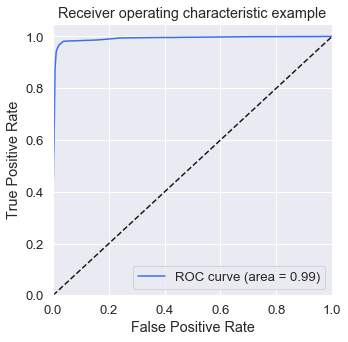

In [322]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Accuracy-Sensitivity-Specificity : Finding Optimal Cutoff Point

In [323]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          1         0.986464    2140    1    1    1    1    1    1    1    1   
1          0         0.007483    7001    1    0    0    0    0    0    0    0   
2          0         0.037916    6850    1    0    0    0    0    0    0    0   
3          1         0.996169    4017    1    1    1    1    1    1    1    1   
4          1         0.973988    7392    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    1    1  
1    0    0  
2    0    0  
3    1    1  
4    1    1

In [324]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.387803  1.000000  0.000000
0.1   0.1  0.971005  0.980089  0.965251
0.2   0.2  0.973211  0.971150  0.974517
0.3   0.3  0.973211  0.971150  0.974517
0.4   0.4  0.973527  0.971150  0.975032
0.5   0.5  0.973999  0.965461  0.979408
0.6   0.6  0.973369  0.961398  0.980952
0.7   0.7  0.973684  0.959366  0.982754
0.8   0.8  0.970848  0.943519  0.988160
0.9   0.9  0.969430  0.938643  0.988932


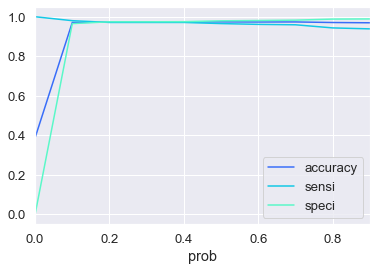

In [325]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As per this plot the Cut-off is at 1

#### Precision - Recall Curve : Finding the Optimal Cut off

In [326]:
# Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced.
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

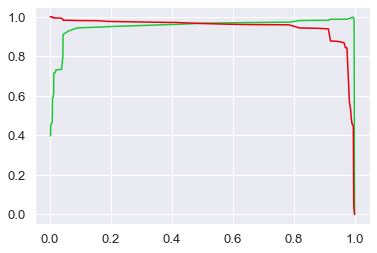

In [327]:
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [328]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          1         0.986464    2140    1    1    1    1    1    1    1    1   
1          0         0.007483    7001    1    0    0    0    0    0    0    0   
2          0         0.037916    6850    1    0    0    0    0    0    0    0   
3          1         0.996169    4017    1    1    1    1    1    1    1    1   
4          1         0.973988    7392    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    1    1                1  
1    0    0                0  
2    0    0                0  
3    1    1                1  
4    1    1                1

(2.0, 0.0)

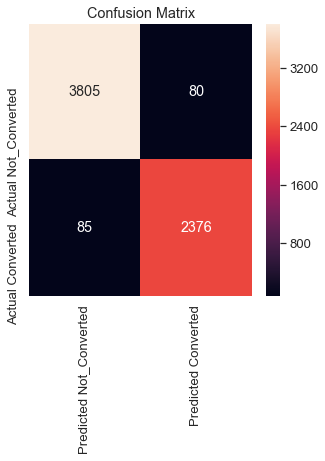

In [329]:
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not_Converted","Actual Converted"],\
                 xticklabels=["Predicted Not_Converted","Predicted Converted"],annot = True,fmt='d')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [330]:
# checking the overall accuracy.
print("Training Model Accuracy : ", round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))
# Let's see the sensitivity of our logistic regression model
print("Training Model Sensitivity : ", round(tp / float(tp+fn),2))
print("Training Model specificity : ", round(tn / float(tn+fn),2))
print("Training Model Precision : ", round(tp / float(tp+fp),2))
print("Training Model Recall : ", round(tp / float(tp+fn),2))
print("Training Model false postive rate : ", round(fp/ float(tn+fp),2))

Training Model Accuracy :  0.97
Training Model Sensitivity :  0.97
Training Model specificity :  0.98
Training Model Precision :  0.97
Training Model Recall :  0.97
Training Model false postive rate :  0.02


In [331]:
y_train_pred_final["Lead_Number"] = Lead_Number_Train
y_train_pred_final["Lead_Score"] = y_train_pred_final['Conversion_Prob']*100
y_train_pred_final["Lead_Score"] = y_train_pred_final['Lead_Score'].round(2)
y_train_pred_final.drop(['LeadID','Conversion_Prob',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],1,inplace=True)
y_train_pred_final.head()

Converted  final_predicted  Lead_Number  Lead_Score
0          1                1       639211       98.65
1          0                0       595906        0.75
2          0                0       597182        3.79
3          1                1       621451       99.62
4          1                1       592772       97.40

## On Test Data

In [332]:
X_test.head()

TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
3009    -0.379483                    -0.161629             -0.165255       0   
657     -0.099883                    -0.124913             -0.165255       0   
4046    -0.938685                    -0.890440             -1.136732       0   
710      0.179718                    -0.721547              0.806221       0   
4346    -0.099883                    -0.734397              0.320483       0   

      Through_Recommendations  Lead_Origin_Landing Page Submission  \
3009                        0                                    1   
657                         0                                    0   
4046                        0                                    0   
710                         0                                    1   
4346                        0                                    1   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
3009                          0                        0   
657                           1                        0   
4046                          0                        0   
710                           0                        0   
4346                          0                        0   

      Lead_Source_Direct Traffic  Lead_Source_Google  Lead_Source_Live Chat  \
3009                           1                   0                      0   
657                            0                   0                      0   
4046                           0                   0                      0   
710                            0                   1                      0   
4346                           1                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
3009                   0                       0                           0   
657                    0                       0                           0   
4046                   0                       1                           0   
710                    0                       0                           0   
4346                   0                       0                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
3009                              0                          0   
657                               0                          0   
4046                              0                          0   
710                               0                          0   
4346                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
3009                      0                           0   
657                       1                           0   
4046                      0                           0   
710                       0                           0   
4346                      0                           0   

      Lead_Source_Social Media  Lead_Source_WeLearn  \
3009                         0                    0   
657                          0                    0   
4046                         0                    0   
710                          0                    0   
4346                         0                    0   

      Lead_Source_Welingak Website  Lead_Source_blog  Lead_Source_testone  \
3009                             0                 0                    0   
657                              0                 0                    0   
4046                             0                 0                    0   
710                              0                 0                    0   
4346                             0                 0                    0   

      Lead_Source_welearnblog_Home  Lead_Source_youtubechannel  \
3009                             0                           0   
657                              0                           0   
4046                             0         

In [333]:
X_test = X_test[col]

In [334]:
X_test_sm = sm.add_constant(X_test)

In [335]:
y_test_pred = res.predict(X_test_sm)

In [336]:
# Converting y_pred to a dataframe which is an array
y_pred_hat = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_hat.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_hat
y_pred_final = pd.concat([y_test_df, y_pred_hat],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  LeadID  Conversion_Prob
0          0    3009         0.007483
1          1     657         0.997382
2          0    4046         0.007483
3          0     710         0.913004
4          0    4346         0.007483

In [337]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

Converted  LeadID  Conversion_Prob  final_predicted
0          0    3009         0.007483                0
1          1     657         0.997382                1
2          0    4046         0.007483                0
3          0     710         0.913004                1
4          0    4346         0.007483                0

(2.0, 0.0)

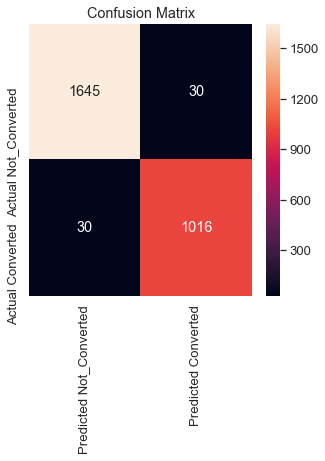

In [338]:
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not_Converted","Actual Converted"],\
                 xticklabels=["Predicted Not_Converted","Predicted Converted"],annot = True,fmt='d')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [339]:
# Let's check the overall accuracy.
print("Test Model Accuracy : ", round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2))
# Let's see the sensitivity of our logistic regression model
print("Test Model Sensitivity : ", round(tp / float(tp+fn),2))
print("Test Model specificity : ", round(tn / float(tn+fn),2))
print("Test Model Precision : ", round(tp / float(tp+fp),2))
print("Test Model false postive rate : ", round(fp/ float(tn+fp),2))

Test Model Accuracy :  0.98
Test Model Sensitivity :  0.97
Test Model specificity :  0.98
Test Model Precision :  0.97
Test Model false postive rate :  0.02


In [340]:
y_pred_final["Lead_Number"] = Lead_Number_Test
y_pred_final["Lead_Score"] = y_pred_final['Conversion_Prob']*100
y_pred_final["Lead_Score"] = y_pred_final['Lead_Score'].round(2)
y_pred_final.drop(['LeadID','Conversion_Prob'],1,inplace=True)
y_pred_final.head()

Converted  final_predicted  Lead_Number  Lead_Score
0          0                0       630949        0.75
1          1                1       653761       99.74
2          0                0       621219        0.75
3          0                1       653109       91.30
4          0                0       618074        0.75

In [341]:
y_train_pred_final.head()

Converted  final_predicted  Lead_Number  Lead_Score
0          1                1       639211       98.65
1          0                0       595906        0.75
2          0                0       597182        3.79
3          1                1       621451       99.62
4          1                1       592772       97.40

## Concatenating the Train and Test dataframes with their results

In [342]:
df_final = pd.concat([y_train_pred_final,y_pred_final])
print(len(df_final))
df_final.head()

9067


Converted  final_predicted  Lead_Number  Lead_Score
0          1                1       639211       98.65
1          0                0       595906        0.75
2          0                0       597182        3.79
3          1                1       621451       99.62
4          1                1       592772       97.40

# Model 2 : Logistic Regression With PCA

## Feature Selection using PCA

In [343]:
# Create an instance of PCA
m1_pca = PCA(random_state=100)

# Find covariance matrix, doing an eigendecomposition of it to obtain the eigenvectors which are Principal Components
m1_pca.fit(X1_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [344]:
# explore the components of PCA
m1_pca.components_

array([[ 5.82063536e-01,  4.41885904e-01,  6.02101488e-01, ...,
         7.78863769e-04,  8.50304531e-04,  0.00000000e+00],
       [ 3.23655283e-01, -7.54619022e-01,  2.86308245e-01, ...,
        -3.19121241e-05,  1.37879170e-03,  0.00000000e+00],
       [ 1.00810398e-01, -2.95185082e-01,  1.28942376e-01, ...,
         1.21838647e-03,  1.36335814e-03,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -9.64375584e-20,  1.98580178e-18, ...,
         1.55366171e-16,  1.73363927e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  2.60208521e-17,  6.71645701e-18, ...,
        -1.08853898e-15,  3.26995375e-15,  0.00000000e+00]])

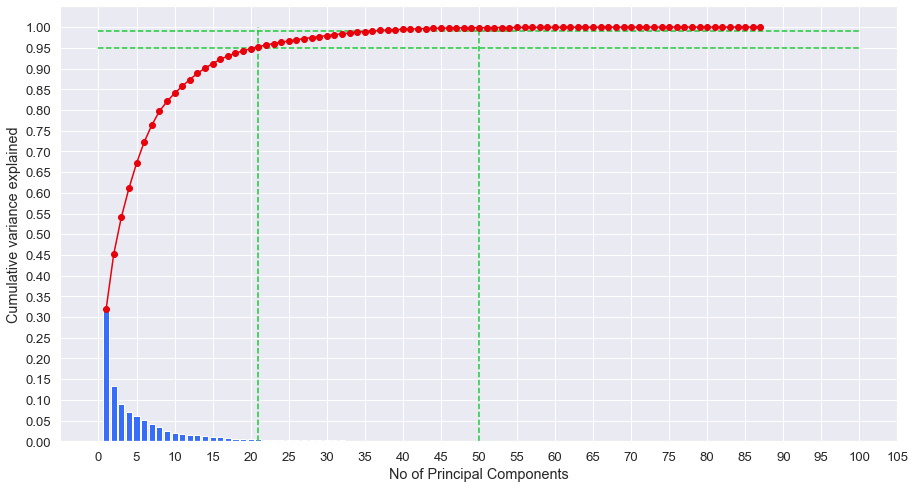

In [345]:
# Create a PC's cumulative sum matrix  and visualize
m1_varcum = np.cumsum(m1_pca.explained_variance_ratio_)

# Visualize the PC's contributing to more than 95% variance
# Plot Scree plots
plt.figure(figsize=[15,8])
plt.bar(range(1,len(m1_pca.explained_variance_ratio_)+1),m1_pca.explained_variance_ratio_)
plt.plot(range(1,len(m1_varcum)+1),m1_varcum,c="r",marker='o')
plt.xlabel("No of Principal Components")
plt.ylabel("Cumulative variance explained")
plt.yticks(np.arange(0,10.5,0.5)/10)
plt.xticks(np.arange(0,110,5))
plt.hlines(y=0.99,xmin=0,xmax=100,colors="g",linestyles="--")
plt.vlines(x=50,ymin=0,ymax=1,colors="g",linestyles="--")
plt.hlines(y=0.95,xmin=0,xmax=100,colors="g",linestyles="--")
plt.vlines(x=21,ymin=0,ymax=1,colors="g",linestyles="--")
plt.show()

### Create a instance with IPCA on Train data

In [346]:
# Create an instance of IPCA
m1_ipca = PCA(0.95)

# Fit and transform on the training data
m1_trn = m1_ipca.fit_transform(X1_train)

In [347]:
# Inspect the shape of M1 train
m1_trn.shape

(6346, 21)

In [348]:
# Create and Check correlation of PC's
m1_corrm = np.corrcoef(m1_trn.transpose())

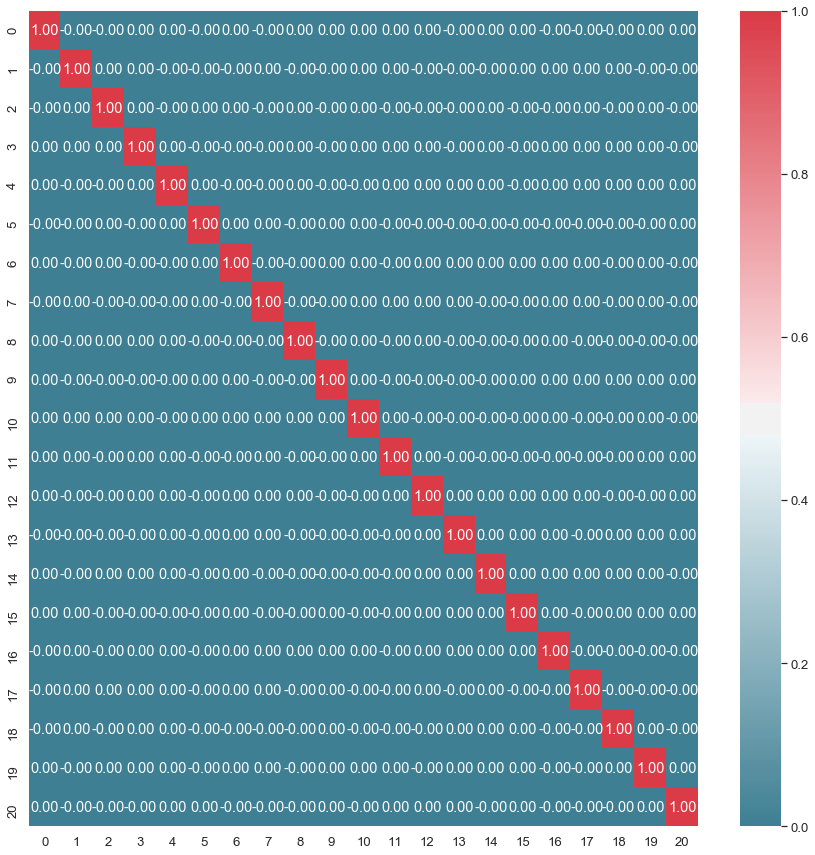

In [349]:
# Check the correlation with 15 PC's
plt.figure(figsize=(15,15))
colormap =  colormap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(np.around(m1_corrm,2), cmap=colormap, annot=True, fmt=".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Transform IPCA on Test data

In [350]:
# Transform the test data
m1_test = m1_ipca.transform(X1_test)
display(m1_test.shape)

(2721, 21)

## Apply - Logistic Regression


## Logistic Model on Train Data

In [351]:
# Create an instance Logistic Regression
m1_lr_pca = LogisticRegression()

# Fit the model
m1_lr = m1_lr_pca.fit(m1_trn,y1_train)

In [352]:
y1_trn_pred = m1_lr.predict_proba(m1_trn)

"{:2.2}".format(metrics.roc_auc_score(y1_train, y1_trn_pred[:,1]))

'0.99'

### Plot the ROC Curve

In [353]:
## Function to plot ROC curve
# This function takes y_actual and probability of labels, computes fpr and tpr to plot ROC

def plt_roc(actual,prob):
    fpr,tpr, thresholds = metrics.roc_curve(actual,prob,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,prob)
    plt.figure(1,figsize=(6,6))
    plt.plot(fpr,tpr,color="red",label="ROC Curve (AUC = %0.2f)"%auc_score)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

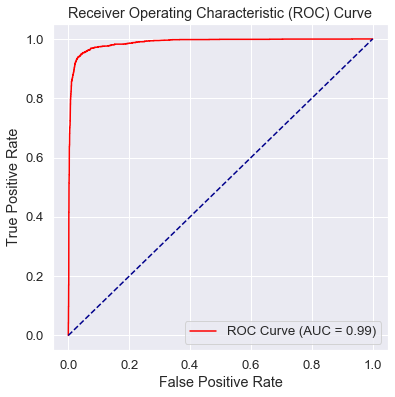

In [354]:
# Plot the ROC Curve
plt_roc(y1_train, y1_trn_pred[:,1])

In [355]:
# Create a DF with Actual, Predicated probabilities
y1_trn_df = pd.DataFrame({"Conversion":y1_train.values,"Pred_Conv_Probs":y1_trn_pred[:,1]})

In [356]:
# Predict the model with arbitary value of 0.5
cu_off_1 = 0.5

# Populate the predicted values with cut_off value
y1_trn_df["Pred_Conversion"] = y1_trn_df.Pred_Conv_Probs.apply(lambda x: 1 if x > cu_off_1 else 0)

In [357]:
# Inspect the df
y1_trn_df

Conversion  Pred_Conv_Probs  Pred_Conversion
0              1         0.941011                1
1              0         0.005793                0
2              0         0.016626                0
3              1         0.641899                1
4              1         0.922656                1
...          ...              ...              ...
6341           1         0.957084                1
6342           1         0.999515                1
6343           1         0.939109                1
6344           1         0.749191                1
6345           1         0.941983                1

[6346 rows x 3 columns]

### Metrics of Logistic Regression Model

In [358]:
# derive Accuary, Sensitivity, Specificity, FPR, Precision, NPV metrics
def logr_metrics(actual,predict):
    # Confusion Matrix
    l_cm = metrics.confusion_matrix(actual,predict)
    
    # Extract TN,FP,FN,TP from confusion matrix
    tnv,fpv,fnv,tpv = l_cm.ravel()
    
    # Calculate Accuracy, Sensitivity(TPR / Recall), Specificity, FPR, Precision (PPV), NPV
    l_acc = (tnv+tpv) /(tnv+tpv+fnv+fpv)
    l_sen = (tpv) /(tpv+fnv)
    l_spec = (tnv) /(tnv+fpv)
    l_fpr = (fpv) /(tnv+fpv)
    l_prec = (tpv) /(tpv+fpv)
    l_npv = (tnv) /(tnv+fnv)
    l_f1_scr = 2*((l_prec*l_sen)/(l_prec+l_sen))
    return(l_cm,l_acc,l_sen,l_spec,l_fpr,l_prec,l_npv,l_f1_scr)

In [359]:
# Let's see the metrics of our logistic regression model
cm,acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(y1_trn_df.Conversion,y1_trn_df.Pred_Conversion)
print("Train Model Accuracy : ", acc)
print("Train Model Sensitivity : ", sen)
print("Train Model specificity : ", spec)
print("Train Model Precision : ", prec)
print("Train Model False Positive Rate : ", fpr)
print("Train Model NPV : ", npv)
print("Train Model F1 Score : ", f1_scr)

Train Model Accuracy :  0.9561928774030886
Train Model Sensitivity :  0.9349857781389679
Train Model specificity :  0.9696267696267696
Train Model Precision :  0.9512195121951219
Train Model False Positive Rate :  0.030373230373230375
Train Model NPV :  0.9592564298446652
Train Model F1 Score :  0.9430327868852459


### Derive the Cutoff

In [360]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    y1_trn_df[k] = y1_trn_df.Pred_Conv_Probs.map(lambda x: 1 if x > k else 0)
    con_mat,ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(y1_trn_df.Conversion,y1_trn_df[k])
    cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(y1_trn_df.head())
display(cut_df)

Conversion  Pred_Conv_Probs  Pred_Conversion  0.0  0.1  0.2  0.3  0.4  0.5  \
0           1         0.941011                1    1    1    1    1    1    1   
1           0         0.005793                0    1    0    0    0    0    0   
2           0         0.016626                0    1    0    0    0    0    0   
3           1         0.641899                1    1    1    1    1    1    1   
4           1         0.922656                1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    1    1    1    1  
1    0    0    0    0  
2    0    0    0    0  
3    1    0    0    0  
4    1    1    1    1

Prob  Accuracy  Sensitivity  Specificity       FPR  Prcesion       NPV  \
0.0   0.0  0.387803     1.000000     0.000000  1.000000  0.387803       NaN   
0.1   0.1  0.900095     0.980902     0.848906  0.151094  0.804399  0.985949   
0.2   0.2  0.937914     0.969525     0.917889  0.082111  0.882070  0.979401   
0.3   0.3  0.948156     0.957741     0.942085  0.057915  0.912858  0.972370   
0.4   0.4  0.954302     0.946770     0.959073  0.040927  0.936119  0.966036   
0.5   0.5  0.956193     0.934986     0.969627  0.030373  0.951220  0.959256   
0.6   0.6  0.954302     0.918326     0.977091  0.022909  0.962112  0.949712   
0.7   0.7  0.947999     0.895165     0.981467  0.018533  0.968352  0.936625   
0.8   0.8  0.941223     0.870784     0.985843  0.014157  0.974977  0.923337   
0.9   0.9  0.922944     0.815116     0.991248  0.008752  0.983333  0.894333   

       F1_Scr  
0.0  0.558874  
0.1  0.883925  
0.2  0.923732  
0.3  0.934761  
0.4  0.941414  
0.5  0.943033  
0.6  0.939709  
0.7  0.930321  
0.8  0.919940  
0.9  0.891357

#### Accuracy-Sensitivity-Specificity : Finding Optimal Cutoff Point

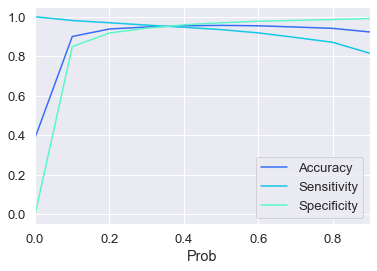

In [361]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_df.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

The cut-off here is at 3.5

#### Plot Precision - Recall Curve : Finding Optimal Cutoff Point

In [362]:
# Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced.
p, r, thresholds = metrics.precision_recall_curve(y1_trn_df.Conversion, y1_trn_df.Pred_Conv_Probs)

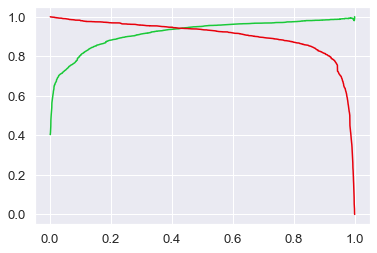

In [363]:
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The Cut-off is at 0.42

In [364]:
y1_trn_df["final_pred"] = y1_trn_df.Pred_Conv_Probs.map(lambda x: 1 if x > 0.42 else 0)
y1_trn_df.head()

Conversion  Pred_Conv_Probs  Pred_Conversion  0.0  0.1  0.2  0.3  0.4  0.5  \
0           1         0.941011                1    1    1    1    1    1    1   
1           0         0.005793                0    1    0    0    0    0    0   
2           0         0.016626                0    1    0    0    0    0    0   
3           1         0.641899                1    1    1    1    1    1    1   
4           1         0.922656                1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_pred  
0    1    1    1    1           1  
1    0    0    0    0           0  
2    0    0    0    0           0  
3    1    0    0    0           1  
4    1    1    1    1           1

### Evaluation Metrics of LR Model - Train Set

(2.0, 0.0)

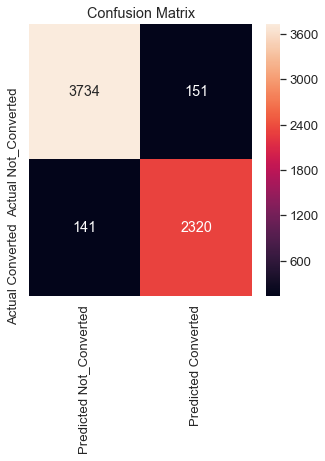

In [365]:
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y1_trn_df.Conversion, y1_trn_df.final_pred).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not_Converted","Actual Converted"],\
                 xticklabels=["Predicted Not_Converted","Predicted Converted"],annot = True,fmt='d')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [366]:
# Calculate metrics for final cutoff
cm,acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(y1_trn_df.Conversion,y1_trn_df.final_pred)
print("Train Model Accuracy : ", acc)
print("Train Model Sensitivity : ", sen)
print("Train Model specificity : ", spec)
print("Train Model Precision : ", prec)
print("Train Model False Positive Rate : ", fpr)
print("Train Model NPV : ", npv)
print("Train Model F1 Score : ", f1_scr)

Train Model Accuracy :  0.9539867633154743
Train Model Sensitivity :  0.9427062169849655
Train Model specificity :  0.9611325611325612
Train Model Precision :  0.9388911371914205
Train Model False Positive Rate :  0.03886743886743887
Train Model NPV :  0.9636129032258065
Train Model F1 Score :  0.940794809407948


## Making Predictions on the test set

In [367]:
# Derive the probability predictions based on the model which ahs been created
y1_test_pred = m1_lr.predict_proba(m1_test)

# AUC score
"{:2.2}".format(metrics.roc_auc_score(y1_test, y1_test_pred[:,1]))

'0.99'

In [368]:
# Create a df with with actual and predicted probabilities
y1_test_df = pd.DataFrame({"Conversion":y1_test.values,"Pred_Conv_Probs":y1_test_pred[:,1]})

In [369]:
# Populate the predicted values with cut_off value
y1_test_df["Pred_Conversion"] = y1_test_df.Pred_Conv_Probs.apply(lambda x: 1 if x > 0.42 else 0)

In [370]:
# Inspect the DF
y1_test_df

Conversion  Pred_Conv_Probs  Pred_Conversion
0              0         0.003766                0
1              1         0.975536                1
2              0         0.010776                0
3              0         0.942924                1
4              0         0.002118                0
...          ...              ...              ...
2716           1         0.991512                1
2717           0         0.005793                0
2718           1         0.993158                1
2719           1         0.994096                1
2720           1         0.988930                1

[2721 rows x 3 columns]

### Evaluation Metrics of LR Model - Test Set

(2.0, 0.0)

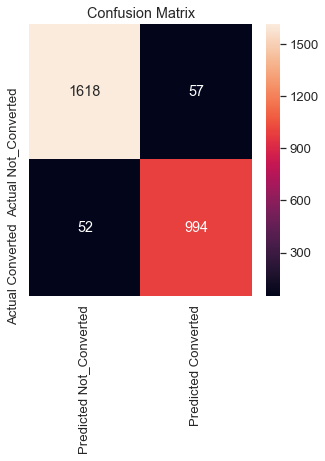

In [371]:
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y1_test_df.Conversion, y1_test_df.Pred_Conversion).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not_Converted","Actual Converted"],\
                 xticklabels=["Predicted Not_Converted","Predicted Converted"],annot = True,fmt='d')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [372]:
cm,acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(y1_test_df.Conversion,y1_test_df.Pred_Conversion)
print("Test Model Accuracy : ", acc)
print("Test Model Sensitivity : ", sen)
print("Test Model specificity : ", spec)
print("Test Model Precision : ", prec)
print("Test Model False Positive Rate : ", fpr)
print("Test Model NPV : ", npv)
print("Test Model F1 Score : ", f1_scr)

Test Model Accuracy :  0.9599411980889379
Test Model Sensitivity :  0.9502868068833652
Test Model specificity :  0.9659701492537314
Test Model Precision :  0.9457659372026641
Test Model False Positive Rate :  0.03402985074626866
Test Model NPV :  0.9688622754491018
Test Model F1 Score :  0.9480209823557463


# Final model

## Comparing the results

<table>
  <tr>
    <th>Logistic Regression Metrics</th>
    <th>LR Model I with RFE</th>
    <th>LR Model II with PCA</th>
  </tr>
  <tr>
    <td>Train Accuracy</td>
    <td>0.97</td>
    <td>0.95</td>
  </tr>
  <tr>
    <td>Train Sensitivity (Recall)</td>
    <td>0.97</td>
    <td>0.94</td>
  </tr>
  <tr>
    <td>Train Specificity</td>
    <td>0.98</td>
    <td>0.96</td>
  </tr>
  <tr>
    <td>Train Precision</td>
    <td>0.97</td>
    <td>0.93</td>
  </tr>
  <tr>
    <td>Train False Positive Rate</td>
    <td>0.02</td>
    <td>0.03</td>
  </tr>
    <tr>
    <td>Test Accuracy</td>
    <td>0.97</td>
    <td>0.95</td>
  </tr>
  <tr>
    <td>Test Sensitivity (Recall)</td>
    <td>0.97</td>
    <td>0.95</td>
  </tr>
  <tr>
    <td>Test Specificity</td>
    <td>0.98</td>
    <td>0.96</td>
  </tr>
  <tr>
    <td>Test Precision</td>
    <td>0.97</td>
    <td>0.94</td>
  </tr>
  <tr>
    <td>Test False Positive Rate</td>
    <td>0.017</td>
    <td>0.034</td>
  </tr>
  
</table>

__Inferences__ 
* Precision is 0.97 and  Lead Conversion rate is around 97% both on train and test set with Model 1. 
* Precision is 0.93 and  Lead Conversion rate is around 93% both on train and test set with Model 2. 
* All the given metrics are better with Model 1 and hence we recommend LR Model 1 using RFE for final analysis.
* Based on Model 1, we have derived our lead scores.

In [373]:
# Evaluation metrics of Model 1
print(color.BOLD+"Test Model Accuracy : ", round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2))
print(color.BOLD+"Test Model Sensitivity : ", round(tp / float(tp+fn),2))
print(color.BOLD+"Test Model specificity : ", round(tn / float(tn+fn),2))
print(color.BOLD+"Test Model Precision : ", round(tp / float(tp+fp),2))
print(color.BOLD+"Test Model false postive rate : ", round(fp/ float(tn+fp),2))

Test Model Accuracy :  0.98
Test Model Sensitivity :  0.95
Test Model specificity :  0.97
Test Model Precision :  0.95
Test Model false postive rate :  0.03


Since we got better results with Model 1, that is, the Model built with Logistic Regression with RFE, we would finalize that as our final model.

## Combining the final data with output and Lead Score

In [374]:
df_final.drop(["Converted"],1,inplace=True)
df_final.head(2)

final_predicted  Lead_Number  Lead_Score
0                1       639211       98.65
1                0       595906        0.75

In [375]:
Lead_Score_df = pd.merge(df_,df_final,how='inner',on='Lead_Number')
print(len(Lead_Score_df))
Lead_Score_df.head()

9067


Lead_Number              Lead_Origin     Lead_Source Do_Not_Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.0   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last_Activity What_is_your_current_occupation  Search  \
0  Page Visited on Website                      Unemployed       0   
1             Email Opened                      Unemployed       0   
2             Email Opened                         Student       0   
3              Unreachable                      Unemployed       0   
4        Converted to Lead                      Unemployed       0   

   Through_Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

  Last_Notable_Activity  final_predicted  Lead_Score  
0              Modified                0        1.22  
1          Email Opened                0        0.75  
2          Email Opened                1       97.40  
3              Modified                0        0.21  
4              Modified                1       91.30

In [376]:
Lead_Score_df.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Last_Activity',
       'What_is_your_current_occupation', 'Search', 'Through_Recommendations',
       'Tags', 'Last_Notable_Activity', 'final_predicted', 'Lead_Score'],
      dtype='object')

In [377]:
Lead_Score_table = Lead_Score_df.drop(['Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Last_Activity',
       'What_is_your_current_occupation', 'Search', 'Through_Recommendations',
       'Tags', 'Last_Notable_Activity'],1)

## Output - Leads with Lead Score

In [378]:
Lead_Score_table.head()

Lead_Number  Converted  final_predicted  Lead_Score
0       660737          0                0        1.22
1       660728          0                0        0.75
2       660727          1                1       97.40
3       660719          0                0        0.21
4       660681          1                1       91.30

'Lead_Score_table' is our output datafram which assigns a Lead Score to each lead identified with it's Lead_Number